### Description: 
For our Final Project, Trainity provided us with a dataset having different TV Airing Brands, their product, and their category. The dataset includes the network through which Ads are airing,  types of networks like Cable/ Broadcast, and the show name also on which Ads got aired. The dataset includes the data of Dayparts, Time zone, and the time & date at which Ads got aired. It also includes other data like Pod Position (the lesser the valuable), the duration for which Ads aired on screen, Equivalent sales &, and the total amount spent on the Ads aired. 

### Objective: 
- a.	What is Pod Position? Does the Pod position number affect the amount spent on Ads for a specific period by a company? 
- b.	What is the share of various brands in TV airings and how has it changed from Q1 to Q4 in 2021?
- c.	Conduct a competitive analysis for the brands and define the advertisement strategy of different brands and how it differs across the brands. 
- d.	Mahindra and Mahindra want to run a digital ad campaign to complement its existing TV ads in Q1 of 2022. Based on the data from 2021, suggest a media plan to the CMO of Mahindra and Mahindra. Which audience should they target? 


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Adjust Jupyter view
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
# Importing ads airing report
raw_data = pd.read_excel("XYZ_Ads_Airings_Data.xlsx",'XYZ_Ads_Airings_Data')

In [5]:
raw_data.head()

Id                 Brand               Product  Network Network Type     Show        Date         Time  Pod Position       Dayparts  Duration  EQ Units  Spend ($)  Broadcast Year Broadcast Month  Broadcast Week  Day Of Week  Hour Of Day         TimeZone
0  1000001            Honda Cars            Honda Jazz  N-10079        cable  S-16736  01/10/2021  10:19:08 PM             1     PRIME TIME        30       1.0        178            2021             JAN               2            7           22  Northeast India
1  1000002         Maruti Suzuki  Maruti Suzuki Baleno  N-10096        cable  S-17450  01/16/2021   7:28:13 PM             3        WEEKEND        30       1.0        514            2021             JAN               3            6           19  Northeast India
2  1000003         Maruti Suzuki    Maruti Suzuki Ciaz  N-10044        cable  S-12299  01/05/2021   1:09:26 PM             2        DAYTIME        30       1.0       2313            2021             JAN               2            2           13  Northeast India
3  1000004         Maruti Suzuki    Maruti Suzuki Ciaz  N-10060        cable  S-14354  01/06/2021   8:55:49 AM             1  EARLY MORNING        30       1.0        308            2021             JAN               2            3            8  Northeast India
4  1000005  Hyundai Motors India           Hyundai I20  N-10123        cable  S-15146  01/02/2021  11:07:43 PM             2    LATE FRINGE        30       1.0       1885            2021             JAN               1            6           23  Northeast India

In [6]:
raw_data.loc[raw_data['Broadcast Year']==2021,['Broadcast Month','Broadcast Year','Date']]

Broadcast Month  Broadcast Year        Date
0                  JAN            2021  01/10/2021
1                  JAN            2021  01/16/2021
2                  JAN            2021  01/05/2021
3                  JAN            2021  01/06/2021
4                  JAN            2021  01/02/2021
...                ...             ...         ...
731772             DEC            2021  12/24/2021
731774             DEC            2021  12/20/2021
731777             DEC            2021  12/26/2021
731780             DEC            2021  12/26/2021
731783             DEC            2021  12/23/2021

[723141 rows x 3 columns]

In [7]:
raw_data.loc[raw_data['Broadcast Year']==2022,['Broadcast Month','Broadcast Year','Date']]

Broadcast Month  Broadcast Year        Date
709177             JAN            2022  12/31/2021
709178             JAN            2022  12/31/2021
709179             JAN            2022  12/31/2021
709180             JAN            2022  12/31/2021
709181             JAN            2022  12/31/2021
...                ...             ...         ...
731776             JAN            2022  12/30/2021
731778             JAN            2022  12/29/2021
731779             JAN            2022  12/27/2021
731781             JAN            2022  12/29/2021
731782             JAN            2022  12/31/2021

[8643 rows x 3 columns]

In [8]:
data=raw_data.copy()

In [9]:
data.shape

(731784, 19)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731784 entries, 0 to 731783
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               731784 non-null  int64  
 1   Brand            731784 non-null  object 
 2   Product          731784 non-null  object 
 3   Network          731784 non-null  object 
 4   Network Type     731784 non-null  object 
 5   Show             731784 non-null  object 
 6   Date             731784 non-null  object 
 7   Time             731784 non-null  object 
 8   Pod Position     731784 non-null  int64  
 9   Dayparts         731784 non-null  object 
 10  Duration         731784 non-null  int64  
 11  EQ Units         731784 non-null  float64
 12  Spend ($)        731784 non-null  int64  
 13  Broadcast Year   731784 non-null  int64  
 14  Broadcast Month  731784 non-null  object 
 15  Broadcast Week   731784 non-null  int64  
 16  Day Of Week      731784 non-null  int6

In [11]:
data.describe()

Id   Pod Position       Duration       EQ Units     Spend ($)  Broadcast Year  Broadcast Week    Day Of Week    Hour Of Day
count  7.317840e+05  731784.000000  731784.000000  731784.000000  7.317840e+05   731784.000000   731784.000000  731784.000000  731784.000000
mean   1.365892e+06       4.225938      26.766443       0.892311  1.902833e+03     2021.011811       24.406377       4.029390      12.664387
std    2.112480e+05       3.175515       8.725895       0.290627  8.537470e+03        0.108034       14.757142       2.006631       6.927000
min    1.000001e+06       1.000000       5.000000       0.170000  0.000000e+00     2021.000000        1.000000       1.000000       0.000000
25%    1.182947e+06       2.000000      30.000000       1.000000  1.270000e+02     2021.000000       11.000000       2.000000       8.000000
50%    1.365892e+06       3.000000      30.000000       1.000000  5.050000e+02     2021.000000       24.000000       4.000000      13.000000
75%    1.548838e+06       6.000000      30.000000       1.000000  1.516000e+03     2021.000000       36.000000       6.000000      19.000000
max    1.731784e+06      31.000000     120.000000       4.000000  5.500000e+06     2022.000000       52.000000       7.000000      23.000000

### Checking numeric columns and categorical columns

In [12]:
data_type=data.dtypes

In [13]:
# Numeric columns
data_num = list(data_type[data_type !='object'].index)
data_num

['Id',
 'Pod Position',
 'Duration',
 'EQ Units',
 'Spend ($)',
 'Broadcast Year',
 'Broadcast Week',
 'Day Of Week',
 'Hour Of Day']

In [14]:
len(data_num)

9

In [15]:
# Categoric columns
data_catg = list(data_type[data_type =='object'].index)
data_catg

['Brand',
 'Product',
 'Network',
 'Network Type',
 'Show',
 'Date',
 'Time',
 'Dayparts',
 'Broadcast Month',
 'TimeZone']

In [16]:
len(data_catg)

10

In [17]:
data.shape

(731784, 19)

# Data Cleaning

 ## 1. Check : Columns data

In [18]:
data.loc[data['Broadcast Year']==2021,['Broadcast Month','Broadcast Year','Date']]

Broadcast Month  Broadcast Year        Date
0                  JAN            2021  01/10/2021
1                  JAN            2021  01/16/2021
2                  JAN            2021  01/05/2021
3                  JAN            2021  01/06/2021
4                  JAN            2021  01/02/2021
...                ...             ...         ...
731772             DEC            2021  12/24/2021
731774             DEC            2021  12/20/2021
731777             DEC            2021  12/26/2021
731780             DEC            2021  12/26/2021
731783             DEC            2021  12/23/2021

[723141 rows x 3 columns]

In [19]:
data.loc[data['Broadcast Year']==2022,['Broadcast Month','Broadcast Year','Date']]

Broadcast Month  Broadcast Year        Date
709177             JAN            2022  12/31/2021
709178             JAN            2022  12/31/2021
709179             JAN            2022  12/31/2021
709180             JAN            2022  12/31/2021
709181             JAN            2022  12/31/2021
...                ...             ...         ...
731776             JAN            2022  12/30/2021
731778             JAN            2022  12/29/2021
731779             JAN            2022  12/27/2021
731781             JAN            2022  12/29/2021
731782             JAN            2022  12/31/2021

[8643 rows x 3 columns]

- ###### When 'Broadcast Year' is 2022, we can see that all 'Broadcast Month' are lablled as 'JAN, where as Date's year is 2021.
- ###### So, here I am dropping these two columns

In [20]:
x=["Broadcast Month","Broadcast Year"]
data.drop(x,axis=1,inplace=True)

In [21]:
data

Id                 Brand               Product  Network Network Type     Show        Date         Time  Pod Position       Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week  Day Of Week  Hour Of Day         TimeZone
0       1000001            Honda Cars            Honda Jazz  N-10079        cable  S-16736  01/10/2021  10:19:08 PM             1     PRIME TIME        30       1.0        178               2            7           22  Northeast India
1       1000002         Maruti Suzuki  Maruti Suzuki Baleno  N-10096        cable  S-17450  01/16/2021   7:28:13 PM             3        WEEKEND        30       1.0        514               3            6           19  Northeast India
2       1000003         Maruti Suzuki    Maruti Suzuki Ciaz  N-10044        cable  S-12299  01/05/2021   1:09:26 PM             2        DAYTIME        30       1.0       2313               2            2           13  Northeast India
3       1000004         Maruti Suzuki    Maruti Suzuki Ciaz  N-10060        cable  S-14354  01/06/2021   8:55:49 AM             1  EARLY MORNING        30       1.0        308               2            3            8  Northeast India
4       1000005  Hyundai Motors India           Hyundai I20  N-10123        cable  S-15146  01/02/2021  11:07:43 PM             2    LATE FRINGE        30       1.0       1885               1            6           23  Northeast India
...         ...                   ...                   ...      ...          ...      ...         ...          ...           ...            ...       ...       ...        ...             ...          ...          ...              ...
731779  1731780            Honda Cars           Honda Civiz  N-10016        cable  S-21075  12/27/2021   7:36:26 PM             4   PRIME ACCESS        15       0.5         66               1            1           19  Northeast India
731780  1731781  Hyundai Motors India           Hyundai I20  N-10092        cable  S-18143  12/26/2021   5:03:33 PM            14        WEEKEND        30       1.0        751              52            7           17  Northeast India
731781  1731782         Maruti Suzuki  Maruti Suzuki Baleno  N-10041        cable  S-19396  12/29/2021  11:25:10 AM             2        DAYTIME        30       1.0        594               1            3           11  Northeast India
731782  1731783         Maruti Suzuki  Maruti Suzuki Baleno  N-10113        cable  S-19407  12/31/2021  11:54:13 AM             1        DAYTIME        30       1.0         40               1            5           11  Northeast India
731783  1731784         Maruti Suzuki  Maruti Suzuki Baleno  N-10050        cable  S-19198  12/23/2021   6:21:07 AM             1  EARLY MORNING        30       1.0        129              52            4            6  Northeast India

[731784 rows x 17 columns]

 ## 2. Check : Columns labelling  

In [22]:
data_type=data.dtypes
data_num = list(data_type[data_type=='int64'].index)
data_float = list(data_type[data_type=='float64'].index)
for i in data_float:
    data_num.append(i)
data_catg = list(data_type[data_type=='object'].index)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731784 entries, 0 to 731783
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              731784 non-null  int64  
 1   Brand           731784 non-null  object 
 2   Product         731784 non-null  object 
 3   Network         731784 non-null  object 
 4   Network Type    731784 non-null  object 
 5   Show            731784 non-null  object 
 6   Date            731784 non-null  object 
 7   Time            731784 non-null  object 
 8   Pod Position    731784 non-null  int64  
 9   Dayparts        731784 non-null  object 
 10  Duration        731784 non-null  int64  
 11  EQ Units        731784 non-null  float64
 12  Spend ($)       731784 non-null  int64  
 13  Broadcast Week  731784 non-null  int64  
 14  Day Of Week     731784 non-null  int64  
 15  Hour Of Day     731784 non-null  int64  
 16  TimeZone        731784 non-null  object 
dtypes: float64

#### Here Date and time both are in object form, I need to covert it to proper datetime format.
- ##### I shall 1st merge both the columns then I shall convert them to datetime format.

###### ` Creating a new column, named "Date_Time"`

In [24]:
data['Date_Time'] = data['Date']+ " " +data['Time']

In [25]:
data['Date_Time'].head()

0    01/10/2021 10:19:08 PM
1     01/16/2021 7:28:13 PM
2     01/05/2021 1:09:26 PM
3     01/06/2021 8:55:49 AM
4    01/02/2021 11:07:43 PM
Name: Date_Time, dtype: object

###### ` Converting the column into proper datetime format`

In [26]:
data['Date_Time'] = pd.to_datetime(data['Date_Time'])

In [27]:
data['Date_Time'].head()

0   2021-01-10 22:19:08
1   2021-01-16 19:28:13
2   2021-01-05 13:09:26
3   2021-01-06 08:55:49
4   2021-01-02 23:07:43
Name: Date_Time, dtype: datetime64[ns]

In [28]:
data['Date_Time'].dt.time.head()

0    22:19:08
1    19:28:13
2    13:09:26
3    08:55:49
4    23:07:43
Name: Date_Time, dtype: object

In [29]:
data['Date_Time'].dt.date.head()

0    2021-01-10
1    2021-01-16
2    2021-01-05
3    2021-01-06
4    2021-01-02
Name: Date_Time, dtype: object

In [30]:
data['Date_Time'].dt.day.head()

0    10
1    16
2     5
3     6
4     2
Name: Date_Time, dtype: int64

In [31]:
data['Date_Time'].dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: Date_Time, dtype: int64

In [32]:
data['Date_Time'].dt.date[1]-data['Date_Time'].dt.date[0]

datetime.timedelta(days=6)

In [33]:
data['Date_Time'].dt.hour.head()

0    22
1    19
2    13
3     8
4    23
Name: Date_Time, dtype: int64

### `Remove: both the "Date" and "Time"  columns.`

In [34]:
x=["Date" , "Time"]
data.drop(x,axis=1,inplace=True)

### `Add: "Broadcast Month"  columns.`

In [35]:
data['Broadcast Month'] = data['Date_Time'].dt.month

In [36]:
data['Broadcast Month'].head()

0    1
1    1
2    1
3    1
4    1
Name: Broadcast Month, dtype: int64

##### Now, replacing the month number with month name.

In [37]:
data['Broadcast Month']=data['Broadcast Month'].replace(1,'Jan').replace(2,'Feb').replace(3,'Mar').replace(4,'Apr').replace(5,'May').replace(6,'Jun').replace(7,'Jul').replace(8,'Aug').replace(9,'Sep').replace(10,'Oct').replace(11,'Nov').replace(12,'Dec')

In [38]:
data['Broadcast Month'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: Broadcast Month, dtype: object

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731784 entries, 0 to 731783
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Id               731784 non-null  int64         
 1   Brand            731784 non-null  object        
 2   Product          731784 non-null  object        
 3   Network          731784 non-null  object        
 4   Network Type     731784 non-null  object        
 5   Show             731784 non-null  object        
 6   Pod Position     731784 non-null  int64         
 7   Dayparts         731784 non-null  object        
 8   Duration         731784 non-null  int64         
 9   EQ Units         731784 non-null  float64       
 10  Spend ($)        731784 non-null  int64         
 11  Broadcast Week   731784 non-null  int64         
 12  Day Of Week      731784 non-null  int64         
 13  Hour Of Day      731784 non-null  int64         
 14  TimeZone         731

## 3. Check: Outliers

In [40]:
data_type = data.dtypes
data_num = list(data_type[data_type=='int64'].index)
data_float = list(data_type[data_type=='float64'].index)
for i in data_float:
    data_num.append(i)
data_catg = list(data_type[data_type=='object'].index)

In [41]:
def outliers(df):
    outliers=[]
    
    data_type = df.dtypes
    df_num = list(data_type[data_type=='int64'].index)
    df_float = list(data_type[data_type=='float64'].index)
    for i in df_float:
        df_num.append(i) # Defining the numeric variable
    
    for i in df_num:
        Q1 = df[i].quantile(0.20) # Quartile 1 at 20th percentile
        Q3 = df[i].quantile(0.80) # Quartile 3 at 80th percentile
        IQR = Q3 - Q1         # Interquartile range
        mn = min(df[i])
        mx = max(df[i])
        ll = Q1-(1.5*IQR)
        ul = Q3+(1.5*IQR)
        me =df[i].mean()
        md = df[i].median()
        if mn<ll or mx>ul:
            outliers.append([i,np.format_float_positional(mn),np.format_float_positional(ll),np.format_float_positional(ul),np.format_float_positional(mx),np.format_float_positional(me),md,"YES"])
        else:
            outliers.append([i,np.format_float_positional(mn),np.format_float_positional(ll),np.format_float_positional(ul),np.format_float_positional(mx),np.format_float_positional(me),md,"NO"])

  
    outliers = pd.DataFrame(outliers, columns=['Column name','Min','Lower limit','Upper Limit','Max','Mean','Median','Outliers'])
    return outliers.sort_values(by='Outliers', ascending=False)

    
    

In [42]:
outliers(data)

Column name       Min        Lower limit         Upper Limit       Max                Mean     Median Outliers
1    Pod Position        1.                -8.                 16.       31.   4.225938255004209        3.0      YES
2        Duration        5.               -7.5                52.5      120.  26.766443376734117       30.0      YES
3       Spend ($)        0.            -2764.5              4847.5  5500000.  1902.8327511943414      505.0      YES
7        EQ Units      0.17              -0.25                1.75        4.  0.8923107365016018        1.0      YES
0              Id  1000001.  487752.9000000004  2244032.0999999996  1731784.           1365892.5  1365892.5       NO
4  Broadcast Week        1.               -36.                 84.       52.   24.40637674505045       24.0       NO
5     Day Of Week        1.                -4.                 12.        7.    4.02938981994687        4.0       NO
6     Hour Of Day        0.               -15.                 41.       23.  12.664387305543713       13.0       NO

##### - Visualization of outliers

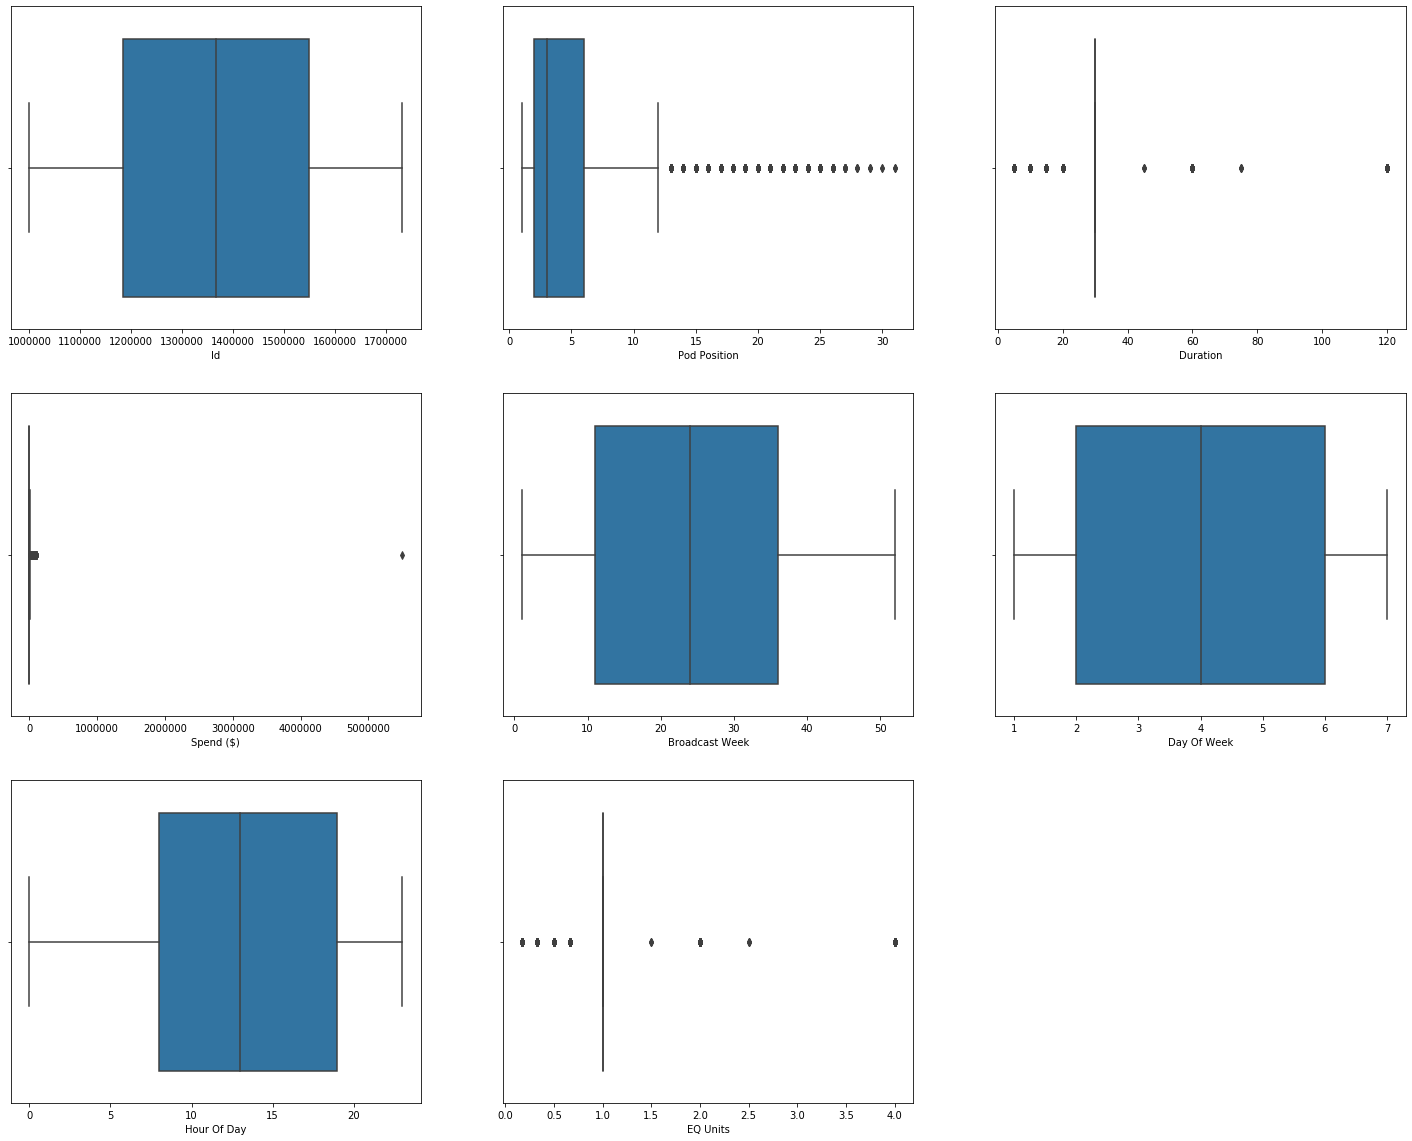

In [43]:
plt.figure(figsize = (25,70))
for i in enumerate(data_num): 
    ax = plt.subplot(10, 3, i[0]+1)
    sns.boxplot(data[i[1]])

#### In the above visualization, it is observabale that 'Pod Position', 'Duration', and 'Spend' columns contains outliers.

# 4. Check: Null values

In [44]:
data.isnull().sum()

Id                 0
Brand              0
Product            0
Network            0
Network Type       0
Show               0
Pod Position       0
Dayparts           0
Duration           0
EQ Units           0
Spend ($)          0
Broadcast Week     0
Day Of Week        0
Hour Of Day        0
TimeZone           0
Date_Time          0
Broadcast Month    0
dtype: int64

#### Fortunately there are no missing values in the dataset

## 5. Replacing the numbers with objects

In [45]:
data.head()

Id                 Brand               Product  Network Network Type     Show  Pod Position       Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week  Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month
0  1000001            Honda Cars            Honda Jazz  N-10079        cable  S-16736             1     PRIME TIME        30       1.0        178               2            7           22  Northeast India 2021-01-10 22:19:08             Jan
1  1000002         Maruti Suzuki  Maruti Suzuki Baleno  N-10096        cable  S-17450             3        WEEKEND        30       1.0        514               3            6           19  Northeast India 2021-01-16 19:28:13             Jan
2  1000003         Maruti Suzuki    Maruti Suzuki Ciaz  N-10044        cable  S-12299             2        DAYTIME        30       1.0       2313               2            2           13  Northeast India 2021-01-05 13:09:26             Jan
3  1000004         Maruti Suzuki    Maruti Suzuki Ciaz  N-10060        cable  S-14354             1  EARLY MORNING        30       1.0        308               2            3            8  Northeast India 2021-01-06 08:55:49             Jan
4  1000005  Hyundai Motors India           Hyundai I20  N-10123        cable  S-15146             2    LATE FRINGE        30       1.0       1885               1            6           23  Northeast India 2021-01-02 23:07:43             Jan

##### Here 'Day Of Week' columns contain 7 unique numbers, they are 1 to 7.Here 1 denotes Monday, 2 denotes Tuesday, and so on..
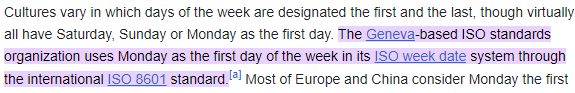
##### Thus I am replacing all the numbers with proper days.

In [46]:
data['Day Of Week'].head()

0    7
1    6
2    2
3    3
4    6
Name: Day Of Week, dtype: int64

In [47]:
min(data['Day Of Week'])

1

In [48]:
max(data['Day Of Week'])

7

In [49]:
data['Day Of Week']=data['Day Of Week'].replace(1,'Mon').replace(2,'Tues').replace(3,'Wed').replace(4,'Thurs').replace(5,'Fri').replace(6,'Sat').replace(7,'Sun')

In [50]:
data['Day Of Week'].head()

0     Sun
1     Sat
2    Tues
3     Wed
4     Sat
Name: Day Of Week, dtype: object

In [51]:
data.head()

Id                 Brand               Product  Network Network Type     Show  Pod Position       Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month
0  1000001            Honda Cars            Honda Jazz  N-10079        cable  S-16736             1     PRIME TIME        30       1.0        178               2         Sun           22  Northeast India 2021-01-10 22:19:08             Jan
1  1000002         Maruti Suzuki  Maruti Suzuki Baleno  N-10096        cable  S-17450             3        WEEKEND        30       1.0        514               3         Sat           19  Northeast India 2021-01-16 19:28:13             Jan
2  1000003         Maruti Suzuki    Maruti Suzuki Ciaz  N-10044        cable  S-12299             2        DAYTIME        30       1.0       2313               2        Tues           13  Northeast India 2021-01-05 13:09:26             Jan
3  1000004         Maruti Suzuki    Maruti Suzuki Ciaz  N-10060        cable  S-14354             1  EARLY MORNING        30       1.0        308               2         Wed            8  Northeast India 2021-01-06 08:55:49             Jan
4  1000005  Hyundai Motors India           Hyundai I20  N-10123        cable  S-15146             2    LATE FRINGE        30       1.0       1885               1         Sat           23  Northeast India 2021-01-02 23:07:43             Jan

## 6. Adding two more columns to get the time of the day (e.g: Morning, Afternoon, Evening and Night) and Quarters of the year (e.g: Q1,Q2,Q3,Q4)

##### `Time of the day`
- Eary-Morning  5 am to 9 am
- Morning       9 am to 12 pm
- Afternoon     12 pm to 5 pm
- Evening       5 pm to 9 pm
- Night         9 pm to 12 am
- Mid-Night     12 am to 5 am

In [52]:
print(min(data['Date_Time'].dt.hour),max(data['Date_Time'].dt.hour))

0 23


In [53]:
bins = [-1,4,9,11,16,20,24]
slot = ['Mid-night','Early-morning ','Morning','Afternoon','Evening','Night']

data['Day_Time']=pd.cut(data['Date_Time'].dt.hour,bins,labels=slot)

In [54]:
# Check
data.loc[data['Date_Time'].dt.hour==10,['Date_Time','Day_Time']].head()

Date_Time Day_Time
12  2021-01-13 10:55:51  Morning
32  2021-01-07 10:18:16  Morning
84  2021-01-09 10:17:36  Morning
97  2021-01-06 10:13:15  Morning
100 2021-01-03 10:17:05  Morning

##### `Quarters of the year`
- Q1: 1 January – 31 March 
- Q2: 1 April – 30 June  
- Q3: 1 July – 30 September  
- Q4: 1 October – 31 December 

In [55]:
print(min(data['Date_Time'].dt.month),max(data['Date_Time'].dt.month))

1 12


In [56]:
bins = [0,3,6,9,12]
slot = ['Q1','Q2','Q3','Q4']

data['Quarters']=pd.cut(data['Date_Time'].dt.month,bins,labels=slot)

In [57]:
# Check
data.loc[data['Date_Time'].dt.month==7,['Date_Time','Quarters']].head()

Date_Time Quarters
394101 2021-07-02 21:48:04       Q3
394102 2021-07-03 16:44:31       Q3
394103 2021-07-09 13:26:13       Q3
394104 2021-07-05 16:28:24       Q3
394105 2021-07-11 01:53:58       Q3

# EDA

In [58]:
data.head()

Id                 Brand               Product  Network Network Type     Show  Pod Position       Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month        Day_Time Quarters
0  1000001            Honda Cars            Honda Jazz  N-10079        cable  S-16736             1     PRIME TIME        30       1.0        178               2         Sun           22  Northeast India 2021-01-10 22:19:08             Jan           Night       Q1
1  1000002         Maruti Suzuki  Maruti Suzuki Baleno  N-10096        cable  S-17450             3        WEEKEND        30       1.0        514               3         Sat           19  Northeast India 2021-01-16 19:28:13             Jan         Evening       Q1
2  1000003         Maruti Suzuki    Maruti Suzuki Ciaz  N-10044        cable  S-12299             2        DAYTIME        30       1.0       2313               2        Tues           13  Northeast India 2021-01-05 13:09:26             Jan       Afternoon       Q1
3  1000004         Maruti Suzuki    Maruti Suzuki Ciaz  N-10060        cable  S-14354             1  EARLY MORNING        30       1.0        308               2         Wed            8  Northeast India 2021-01-06 08:55:49             Jan  Early-morning        Q1
4  1000005  Hyundai Motors India           Hyundai I20  N-10123        cable  S-15146             2    LATE FRINGE        30       1.0       1885               1         Sat           23  Northeast India 2021-01-02 23:07:43             Jan           Night       Q1

In [59]:
data.shape

(731784, 19)

In [60]:
data.columns

Index(['Id', 'Brand', 'Product', 'Network', 'Network Type', 'Show', 'Pod Position', 'Dayparts', 'Duration', 'EQ Units', 'Spend ($)', 'Broadcast Week', 'Day Of Week', 'Hour Of Day', 'TimeZone', 'Date_Time', 'Broadcast Month', 'Day_Time', 'Quarters'], dtype='object')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731784 entries, 0 to 731783
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Id               731784 non-null  int64         
 1   Brand            731784 non-null  object        
 2   Product          731784 non-null  object        
 3   Network          731784 non-null  object        
 4   Network Type     731784 non-null  object        
 5   Show             731784 non-null  object        
 6   Pod Position     731784 non-null  int64         
 7   Dayparts         731784 non-null  object        
 8   Duration         731784 non-null  int64         
 9   EQ Units         731784 non-null  float64       
 10  Spend ($)        731784 non-null  int64         
 11  Broadcast Week   731784 non-null  int64         
 12  Day Of Week      731784 non-null  object        
 13  Hour Of Day      731784 non-null  int64         
 14  TimeZone         731

In [62]:
def dtypes(df):
    
    cols=[]
    data_type=df.dtypes

    data_num = list(data_type[data_type=='int64'].index)
    data_float = list(data_type[data_type=='float64'].index)
    for i in data_float:
        data_num.append(i)

    data_catg = list(data_type[data_type=='object'].index)
    category =  list(data_type[data_type=='category'].index)
    for i in category:
        data_catg.append(i)
        
    cols.append(data_num)
    cols.append(data_catg)
    return(cols)

In [63]:
# numeric cols
dtypes(data)[0]

['Id',
 'Pod Position',
 'Duration',
 'Spend ($)',
 'Broadcast Week',
 'Hour Of Day',
 'EQ Units']

In [64]:
len(dtypes(data)[0])

7

In [65]:
# categoric cols
dtypes(data)[1]

['Brand',
 'Product',
 'Network',
 'Network Type',
 'Show',
 'Dayparts',
 'Day Of Week',
 'TimeZone',
 'Broadcast Month',
 'Day_Time',
 'Quarters']

In [66]:
len(dtypes(data)[1])

11

In [67]:
x=['Pod Position',
 'Duration',
 'Spend ($)',
 'Broadcast Week',
 'Hour Of Day',
 'EQ Units']

In [68]:
data[x].describe()

Pod Position       Duration     Spend ($)  Broadcast Week    Hour Of Day       EQ Units
count  731784.000000  731784.000000  7.317840e+05   731784.000000  731784.000000  731784.000000
mean        4.225938      26.766443  1.902833e+03       24.406377      12.664387       0.892311
std         3.175515       8.725895  8.537470e+03       14.757142       6.927000       0.290627
min         1.000000       5.000000  0.000000e+00        1.000000       0.000000       0.170000
25%         2.000000      30.000000  1.270000e+02       11.000000       8.000000       1.000000
50%         3.000000      30.000000  5.050000e+02       24.000000      13.000000       1.000000
75%         6.000000      30.000000  1.516000e+03       36.000000      19.000000       1.000000
max        31.000000     120.000000  5.500000e+06       52.000000      23.000000       4.000000

In [69]:
data[dtypes(data)[1]].describe()

Brand               Product  Network Network Type     Show Dayparts Day Of Week         TimeZone Broadcast Month   Day_Time Quarters
count          731784                731784   731784       731784   731784   731784      731784           731784          731784     731784   731784
unique              6                    20      138            2    12659        9           7                4              12          6        4
top     Maruti Suzuki  Maruti Suzuki Baleno  N-10123        cable  S-19396  DAYTIME         Sat  Northeast India             Jan  Afternoon       Q1
freq           280274                161393    15176       670071     9666   159017      107752           707920           76199     162621   212968

## Q1. What is Pod Position? Does the Pod position number affect the amount spent on Ads for a specific period of time by a company? (Explain in Details with examples from the dataset provided)

## `Pod Position:`
Pod position refers to a certain advertisement's location within a particular commercial pod.

An ad pod is a collection of advertisements that are timed to play consecutively within a single ad break or placement, much like commercial breaks on conventional linear TV. Ad pods provide advertisers more control over ad positioning and give publishers the chance to maximize income from each ad break.


In [70]:
data['Spend ($)'].head(150)

0        178
1        514
2       2313
3        308
4       1885
5       2683
6       1545
7        575
8       1383
9         49
10        55
11      1126
12        20
13       327
14      3954
15      2435
16       702
17       111
18     40422
19       745
20        32
21      2027
22        33
23       417
24       116
25       151
26       158
27       625
28        78
29        43
30       780
31      1776
32        76
33        43
34        54
35        38
36       757
37      5548
38        85
39      1362
40        69
41     62096
42       659
43       785
44      4581
45       362
46     17487
47        47
48      2153
49       150
50       120
51       104
52      1590
53       993
54      2783
55        70
56        10
57      1535
58       206
59       752
60      6831
61       288
62     23282
63       347
64      4293
65       315
66       245
67       755
68       154
69        26
70        74
71        26
72     12209
73      1647
74      1957
75      1592
76       106

In [71]:
max(data['Spend ($)'])

5500000

In [72]:
min(data['Spend ($)'])

0

In [73]:
data.loc[data['Spend ($)']==0,:]

Id                  Brand               Product  Network Network Type     Show  Pod Position       Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month        Day_Time Quarters
1040    1001041          Maruti Suzuki    Maruti Suzuki Ciaz  N-10028    broadcast  S-16527             2  EARLY MORNING        30       1.0          0               2         Sun            8    Central India 2021-01-10 08:37:27             Jan  Early-morning        Q1
1777    1001778          Maruti Suzuki    Maruti Suzuki Ciaz  N-10028    broadcast  S-16527             2  EARLY MORNING        30       1.0          0               1         Sun            8    Central India 2021-01-03 08:35:45             Jan  Early-morning        Q1
4880    1004881  Mahindra and Mahindra     Mahindra New Thar  N-10090        cable  S-10956             3     PRIME TIME        30       1.0          0               3         Wed           22   Southern India 2021-01-13 22:38:50             Jan           Night       Q1
11602   1011603  Mahindra and Mahindra     Mahindra New Thar  N-10107        cable  S-11257             5     PRIME TIME        30       1.0          0               2         Mon           22  Northeast India 2021-01-04 22:49:20             Jan           Night       Q1
17382   1017383          Maruti Suzuki  Maruti Suzuki WagonR  N-10049        cable  S-21060             3  EARLY MORNING        30       1.0          0               3         Wed            8   Southern India 2021-01-13 08:49:49             Jan  Early-morning        Q1
...         ...                    ...                   ...      ...          ...      ...           ...            ...       ...       ...        ...             ...         ...          ...              ...                 ...             ...             ...      ...
730947  1730948          Maruti Suzuki  Maruti Suzuki Baleno  N-10138        cable  S-20669             3   EARLY FRINGE        30       1.0          0              52         Mon           17  Northeast India 2021-12-20 17:46:35             Dec         Evening       Q4
731093  1731094          Maruti Suzuki  Maruti Suzuki Baleno  N-10138        cable  S-15547             2        WEEKEND        30       1.0          0              52         Sat           19  Northeast India 2021-12-25 19:52:45             Dec         Evening       Q4
731132  1731133  Mahindra and Mahindra     Mahindra New Thar  N-10138        cable  S-22574             3   EARLY FRINGE        30       1.0          0              52         Fri           16  Northeast India 2021-12-24 16:36:57             Dec       Afternoon       Q4
731267  1731268                 Toyota          Toyota Etios  N-10090        cable  S-18497             4   EVENING NEWS        15       0.5          0               1         Mon           18   Southern India 2021-12-27 18:59:17             Dec         Evening       Q4
731330  1731331  Mahindra and Mahindra     Mahindra New Thar  N-10138        cable  S-11912             3     PRIME TIME        30       1.0          0               1         Mon           21  Northeast India 2021-12-27 21:54:56             Dec           Night       Q4

[2075 rows x 19 columns]

In [74]:
data.loc[data['Spend ($)']==5500000,:]

Id                 Brand      Product  Network Network Type     Show  Pod Position    Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month Day_Time Quarters
93821  1093822  Hyundai Motors India  Hyundai I20  N-10020    broadcast  S-19607             4  PRIME TIME        30       1.0    5500000               6         Sun           19  Northeast India 2021-02-07 19:18:52             Feb  Evening       Q1

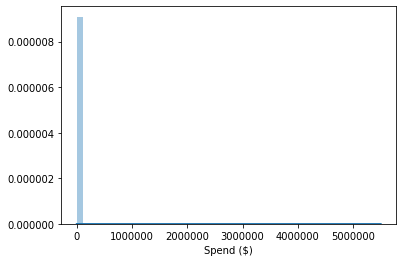

In [75]:
sns.distplot(data['Spend ($)'])

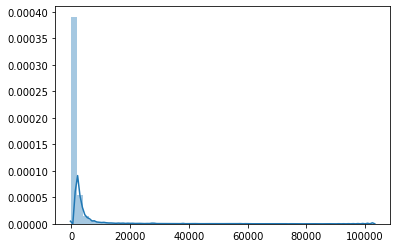

In [76]:
sns.distplot(data.loc[data['Spend ($)']<5500000,['Spend ($)']])

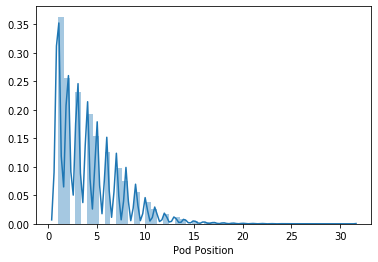

In [77]:
sns.distplot(data['Pod Position'])

### Pod Position v/s Spend

In [78]:
data['Pod Position'].corr(data['Spend ($)'])

-0.005715704123710858

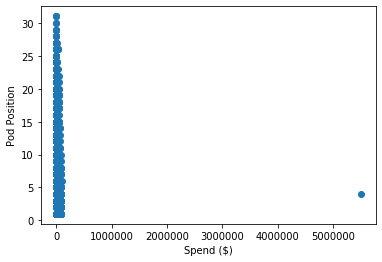

In [79]:
plt.scatter(data['Spend ($)'],data['Pod Position'])
plt.xlabel("Spend ($)")
plt.ylabel("Pod Position")
plt.show()

- #### For heigher spend pod position is lower, so there is an negative correlation.

#### Spend not equal `5500000`

In [80]:
spend_pod = data.loc[(data['Spend ($)']!=5500000)  ,['Brand','Product','Spend ($)','Pod Position']]

In [81]:
spend_pod['Pod Position'].corr(spend_pod['Spend ($)'])

-0.008588397568439706

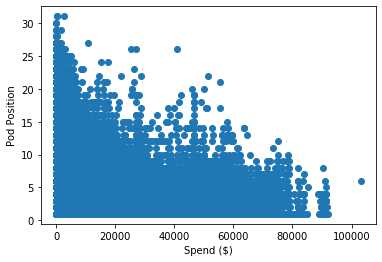

In [82]:
plt.scatter(spend_pod['Spend ($)'],spend_pod['Pod Position'])
plt.xlabel("Spend ($)")
plt.ylabel("Pod Position")
plt.show()

#### Spend `0`

In [83]:
spend_pod = data.loc[(data['Spend ($)']==0)  ,['Brand','Product','Spend ($)','Pod Position']]

In [84]:
spend_pod.describe()

Spend ($)  Pod Position
count     2075.0   2075.000000
mean         0.0      3.094940
std          0.0      2.415825
min          0.0      1.000000
25%          0.0      1.000000
50%          0.0      2.000000
75%          0.0      4.000000
max          0.0     17.000000

In [85]:
spend_pod.loc[spend_pod['Pod Position']==min(spend_pod['Pod Position']),:]

Brand               Product  Spend ($)  Pod Position
152716             Honda Cars           Honda Civiz          0             1
161031  Mahindra and Mahindra     Mahindra New Thar          0             1
164085  Mahindra and Mahindra     Mahindra New Thar          0             1
177461             Honda Cars            Honda Jazz          0             1
209672                 Toyota          Toyota Etios          0             1
...                       ...                   ...        ...           ...
729620  Mahindra and Mahindra     Mahindra New Thar          0             1
729692  Mahindra and Mahindra     Mahindra New Thar          0             1
730042  Mahindra and Mahindra     Mahindra New Thar          0             1
730415          Maruti Suzuki  Maruti Suzuki Baleno          0             1
730431          Maruti Suzuki  Maruti Suzuki Baleno          0             1

[546 rows x 4 columns]

#### Spend `5500000`

In [86]:
spend_pod = data.loc[(data['Spend ($)']==5500000)  ,['Brand','Product','Spend ($)','Pod Position']]

In [87]:
spend_pod

Brand      Product  Spend ($)  Pod Position
93821  Hyundai Motors India  Hyundai I20    5500000             4

#### Spend not equal `5500000` & not equal `5500000`

In [88]:
spend_pod = data.loc[(data['Spend ($)']!=5500000)  ,['Brand','Product','Spend ($)','Pod Position']]
spend_pod = spend_pod.loc[(spend_pod['Spend ($)']!=0)  ,['Brand','Product','Spend ($)','Pod Position']]

In [89]:
spend_pod.describe()

Spend ($)   Pod Position
count  729708.000000  729708.000000
mean     1900.708999       4.229155
std      5626.645115       3.176846
min         1.000000       1.000000
25%       129.000000       2.000000
50%       508.000000       3.000000
75%      1521.000000       6.000000
max    103048.000000      31.000000

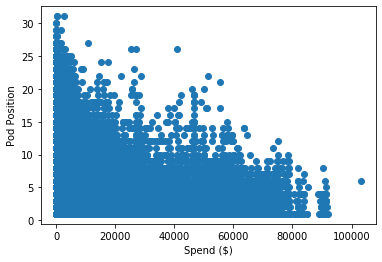

In [90]:
plt.scatter(spend_pod['Spend ($)'],spend_pod['Pod Position'])
plt.xlabel("Spend ($)")
plt.ylabel("Pod Position")
plt.show()

In [91]:
spend_pod['Pod Position'].corr(spend_pod['Spend ($)'])

-0.008940374881226622

In [92]:
pod=data.groupby("Pod Position").sum()
pod.sort_values(by='Spend ($)', ascending=False)

Id  Duration   EQ Units  Spend ($)  Broadcast Week  Hour Of Day
Pod Position                                                                           
1             219791426071   4400650  146700.94  324025029         3988739      1952381
3             138105734515   2718835   90638.03  196432582         2457927      1279669
2             152990651803   3040565  101358.69  187654622         2713447      1398589
4             115124270536   2249070   74977.98  178545699         2051333      1078711
5              92113750920   1786135   59545.62  132148569         1640883       865813
6              74922982851   1446720   48230.29  105981319         1328945       707755
7              58800935594   1131085   37707.73   77255099         1046037       557359
8              45536311410    872285   29080.24   58205928          812534       436211
9              33136810433    632965   21102.00   41909147          589604       318295
10             22819056546    435290   14511.79   28706471          408149       221586
11             15213046201    287125    9572.11   19755483          272931       147597
12             10058468818    190485    6350.26   14044029          179149        97686
13              6754989988    126810    4227.49    9189860          120919        66405
14              4585469572     86635    2888.20    6666590           81371        45587
15              3077886917     58665    1955.66    4075787           55572        30377
16              1983366018     38265    1275.61    2542312           34415        19646
17              1407150909     26590     886.47    1696001           24394        14110
18               988838055     18880     629.42    1229739           16987         9726
19               685616369     13135     437.89     939675           11659         6641
20               476192053      8820     294.06     524109            8475         4412
21               319261799      6055     201.84     321843            5573         3162
22               254562398      4885     162.86     249062            4249         2442
23               144282676      2770      92.34     117743            2538         1331
26                37864012       740      24.67     108641             676          375
24               103008574      1875      62.52      77874            1746          777
25                65703183      1210      40.34      37872            1193          573
27                20870946       335      11.17      15633             349          199
31                 4096202        90       3.00       3008              73           35
29                 5983873       120       4.00       2031             142           71
28                 7093157       120       4.00        757             149           58
30                 2594821        45       1.50         48              38           17

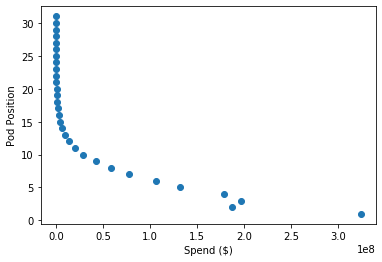

In [93]:
plt.scatter(pod['Spend ($)'],pod.index)
plt.xlabel("Spend ($)")
plt.ylabel("Pod Position")
plt.show()

- #### For heigher spend pod position is lower, so there is a negative correlation.

### Pod Position v/s Spend v/s Time period

##### In the above table columns 'Dayparts', 'Quarters','Broadcast Month','Broadcast Week','Day Of Week','Day_Time','Hour Of Day' denotes time period.

In [94]:
pst = data[['Brand','Product','Spend ($)','Pod Position','Dayparts', 'Quarters','Broadcast Month','Broadcast Week','Day Of Week','Day_Time','Hour Of Day','Date_Time']]

### Check: Pod Position v/s Spend v/s Quarters

In [95]:
qt = pst['Quarters'].unique()
qt

['Q1', 'Q2', 'Q3', 'Q4']
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

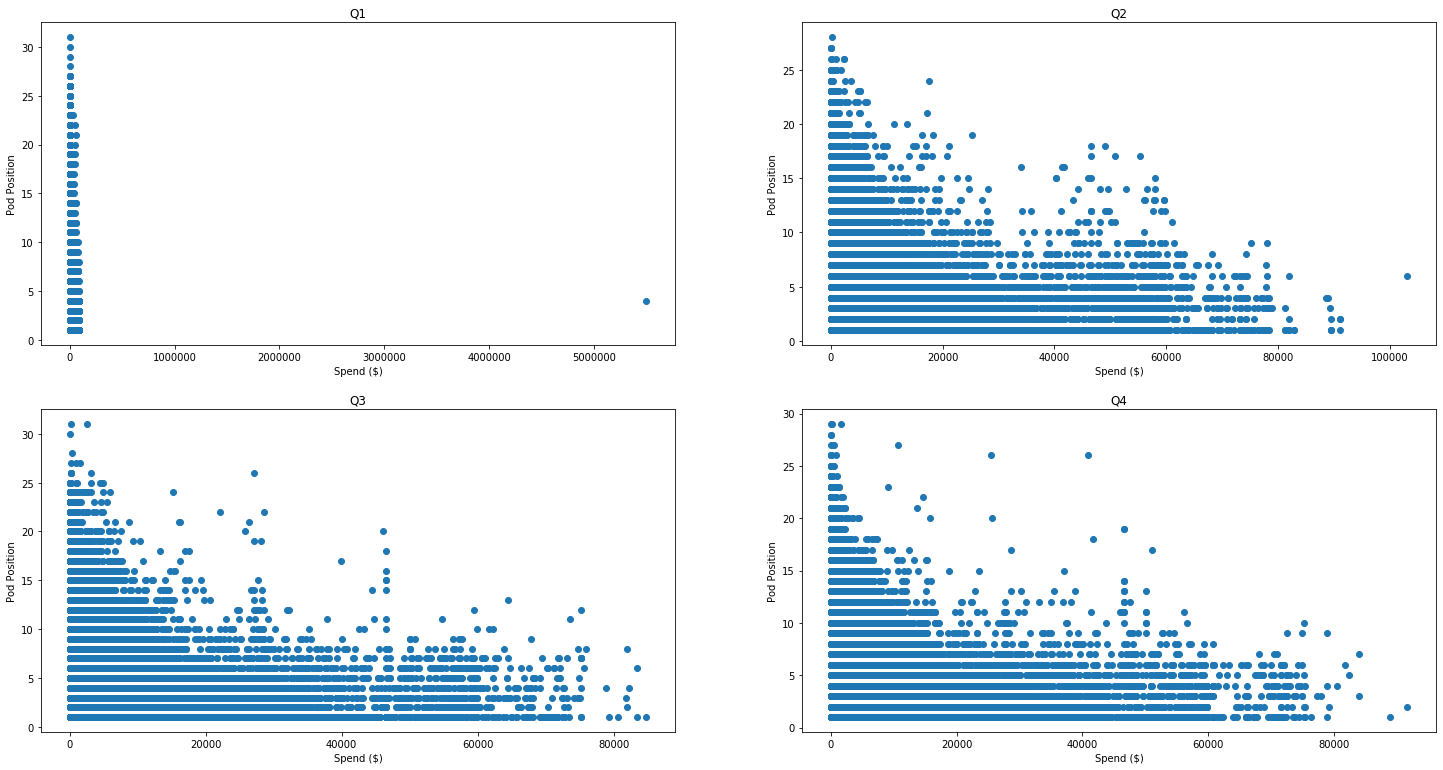

In [96]:
qt = pst['Quarters'].unique()
plt.figure(figsize = (25,70))
for i in enumerate(qt):
    spend_pod = pst.loc[(pst['Quarters']==i[1])  ,['Spend ($)','Pod Position']]
    ax = plt.subplot(10, 2, i[0]+1)
    plt.scatter(spend_pod['Spend ($)'],spend_pod['Pod Position'])
    plt.title(i[1])
    plt.xlabel("Spend ($)")
    plt.ylabel("Pod Position")

In [97]:
for i in enumerate(qt):
    spend_pod = pst.loc[(pst['Quarters']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

Q1 -0.002346744092481439
Q2 -0.0017880317310178682
Q3 -0.009426604522098238
Q4 -0.0182379614984312


###### Note: Dropping row, where Spend = `5500000`

In [98]:
pst = pst.loc[pst['Spend ($)']!=5500000,:]

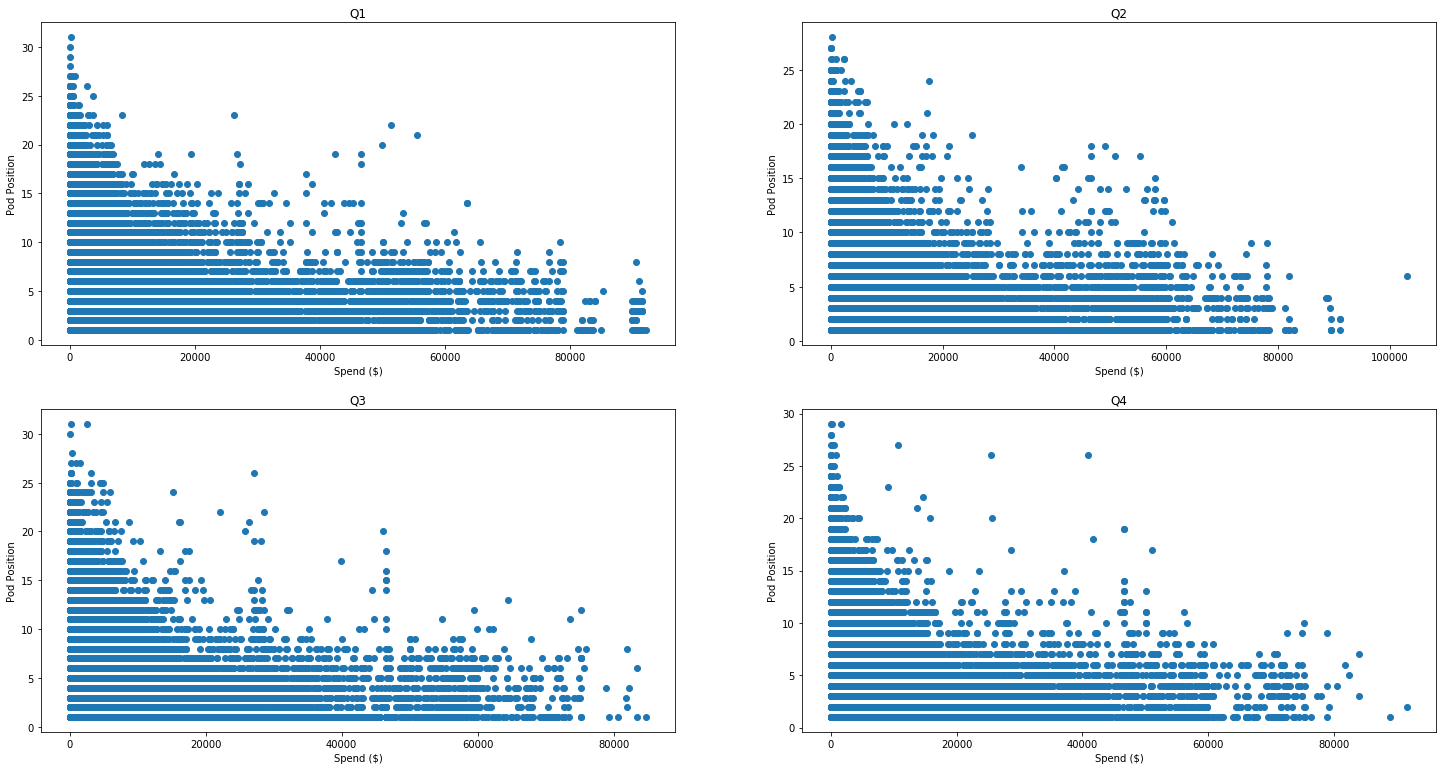

In [99]:
qt = pst['Quarters'].unique()
plt.figure(figsize = (25,70))
for i in enumerate(qt):
    spend_pod = pst.loc[(pst['Quarters']==i[1])  ,['Spend ($)','Pod Position']]
    ax = plt.subplot(10, 2, i[0]+1)
    plt.scatter(spend_pod['Spend ($)'],spend_pod['Pod Position'])
    plt.title(i[1])
    plt.xlabel("Spend ($)")
    plt.ylabel("Pod Position")

In [100]:
for i in enumerate(qt):
    spend_pod = pst.loc[(pst['Quarters']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

Q1 -0.004888534404786081
Q2 -0.0017880317310178682
Q3 -0.009426604522098238
Q4 -0.0182379614984312


#### `Among the quarters during Q4, Spend and Pod position have higher correlation.  Now I shall check for Q4 months, i.e. 1 October to 31 December`

In [101]:
#pst.head()

In [102]:
pst['Broadcast Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

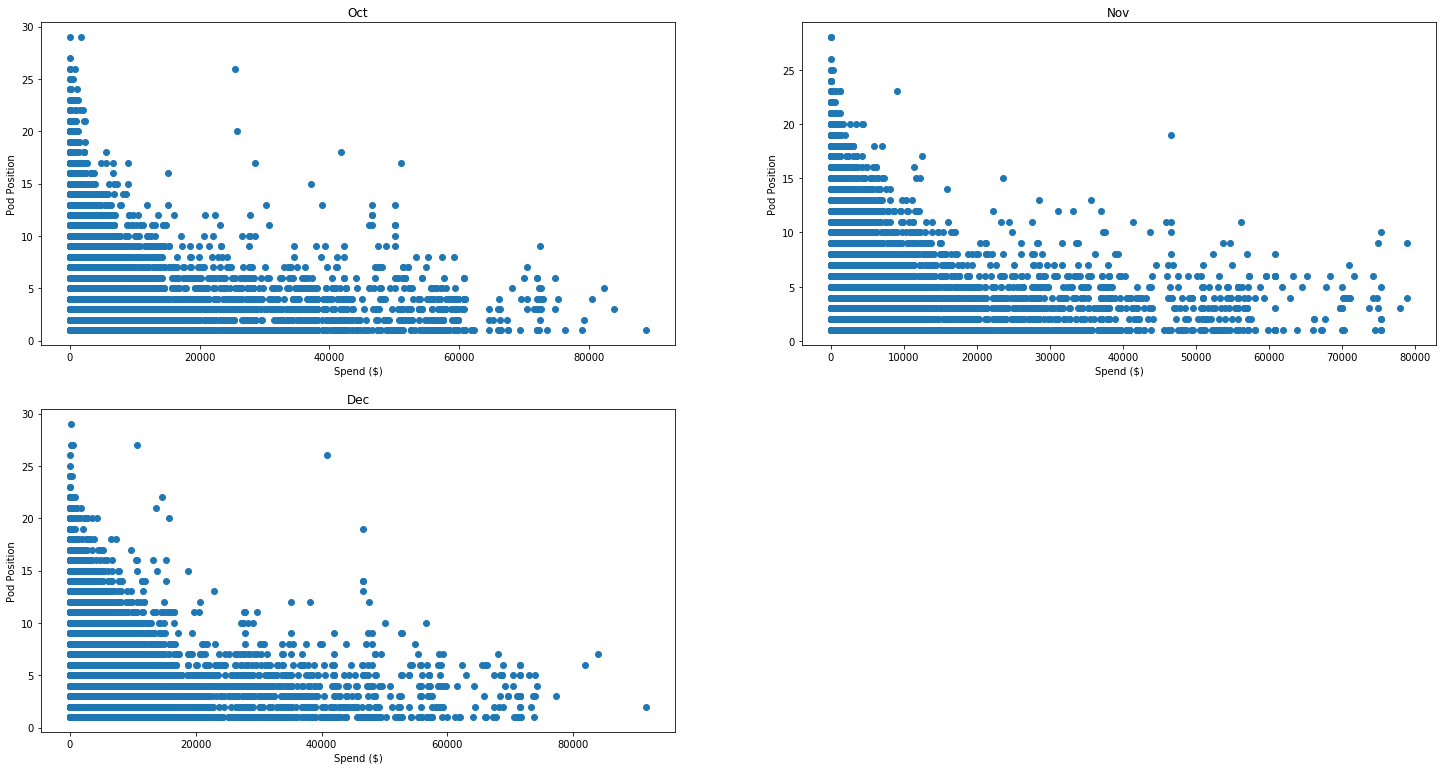

In [103]:
mn = ['Oct', 'Nov', 'Dec']
plt.figure(figsize = (25,70))
for i in enumerate(mn):
    spend_pod = pst.loc[(pst['Broadcast Month']==i[1])  ,['Spend ($)','Pod Position']]
    ax = plt.subplot(10, 2, i[0]+1)
    plt.scatter(spend_pod['Spend ($)'],spend_pod['Pod Position'])
    plt.title(i[1])
    plt.xlabel("Spend ($)")
    plt.ylabel("Pod Position")

In [104]:
for i in enumerate(mn):
    spend_pod = pst.loc[(pst['Broadcast Month']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

Oct -0.03638207222404898
Nov -0.011971139404785017
Dec -0.004427221025674376


#### `Among the month during October month, Spend and Pod position have higher correlation.  Now I shall check for week and then days, i.e. Sunday, Monday, and others and then day parts..`

In [105]:
pst2= pst.loc[(pst['Broadcast Month']=='Oct')  ,:]

In [106]:
#pst2

#### `Weeks`

In [107]:
week = pst2['Broadcast Week'].unique()

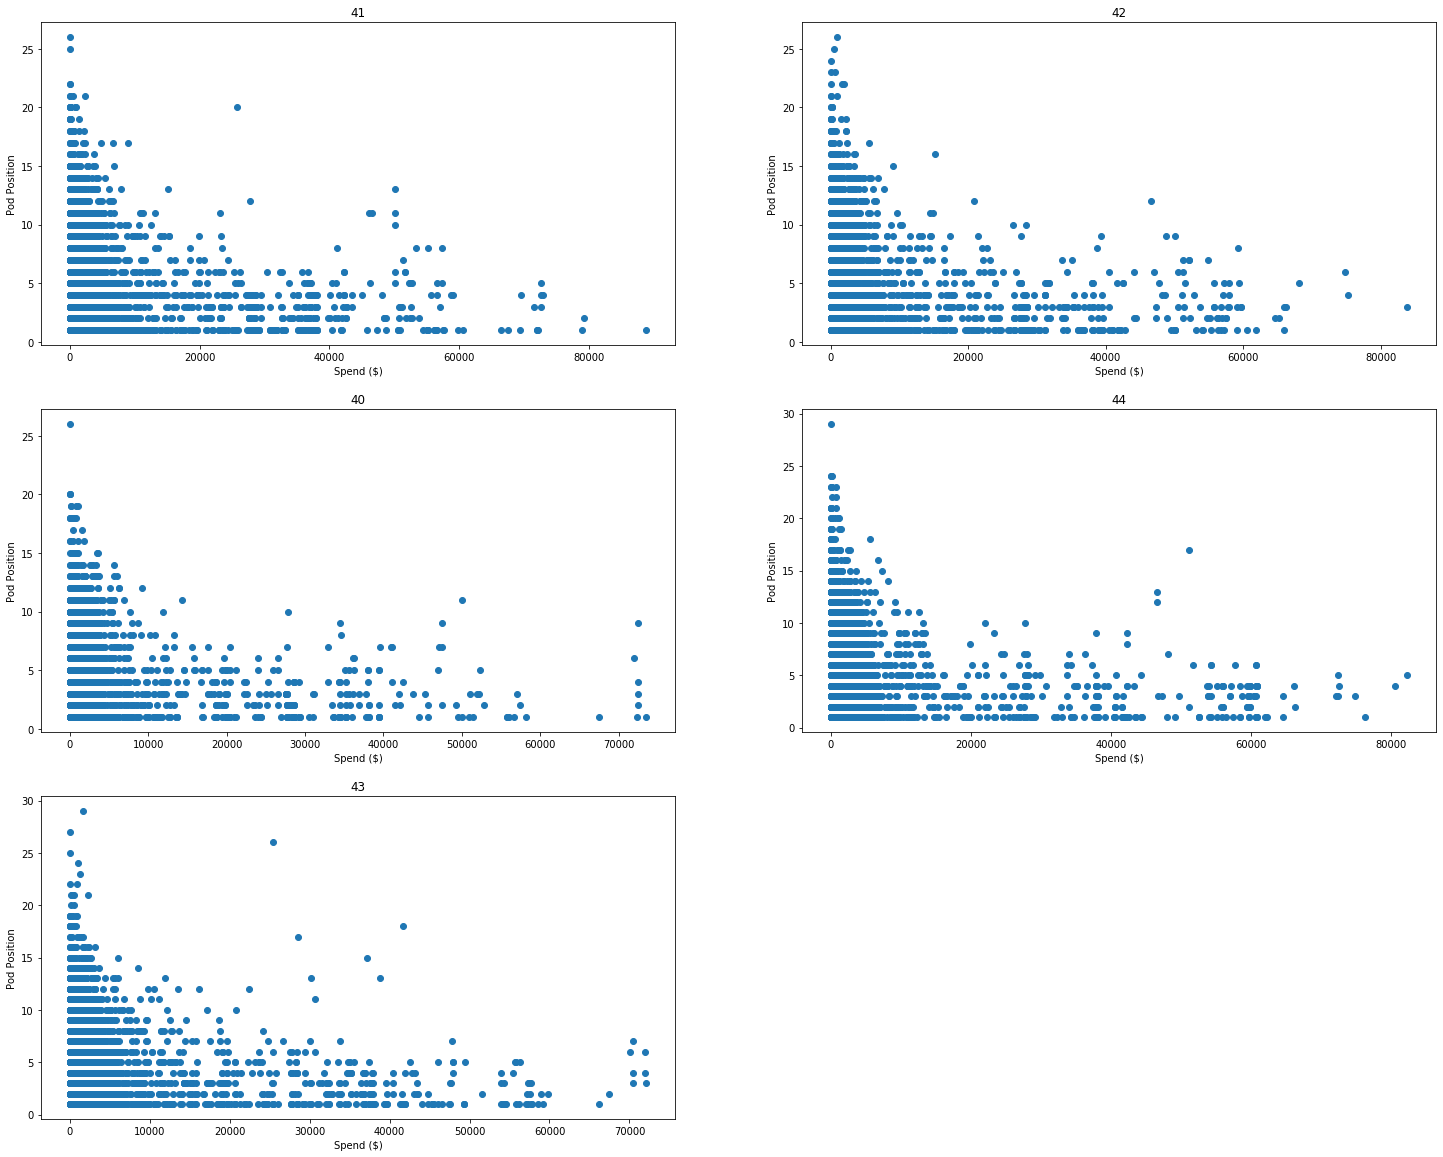

In [108]:
plt.figure(figsize = (25,70))
for i in enumerate(week):
    spend_pod = pst2.loc[(pst2['Broadcast Week']==i[1])  ,['Spend ($)','Pod Position']]
    ax = plt.subplot(10, 2, i[0]+1)
    plt.scatter(spend_pod['Spend ($)'],spend_pod['Pod Position'])
    plt.title(i[1])
    plt.xlabel("Spend ($)")
    plt.ylabel("Pod Position")

In [109]:
for i in enumerate(week):
    spend_pod = pst2.loc[(pst2['Broadcast Week']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

41 -0.03559771487259455
42 -0.031742642568943644
40 -0.0537867128025693
44 -0.033329049437539976
43 -0.03197243801453066


##### Except the 40th week, remaining in all weeks Spend and Pod position have same correlations

#### `Days`

In [110]:
#data.head()

In [111]:
# pst2= pst.loc[(pst['Broadcast Month']=='OCT')  ,['Brand','Product','Spend ($)','Pod Position','Dayparts', 'Quarters','Broadcast Month','Broadcast Week','Day Of Week','Day_Time','Hour Of Day','Date_Time']]

In [112]:
#check
#pst2

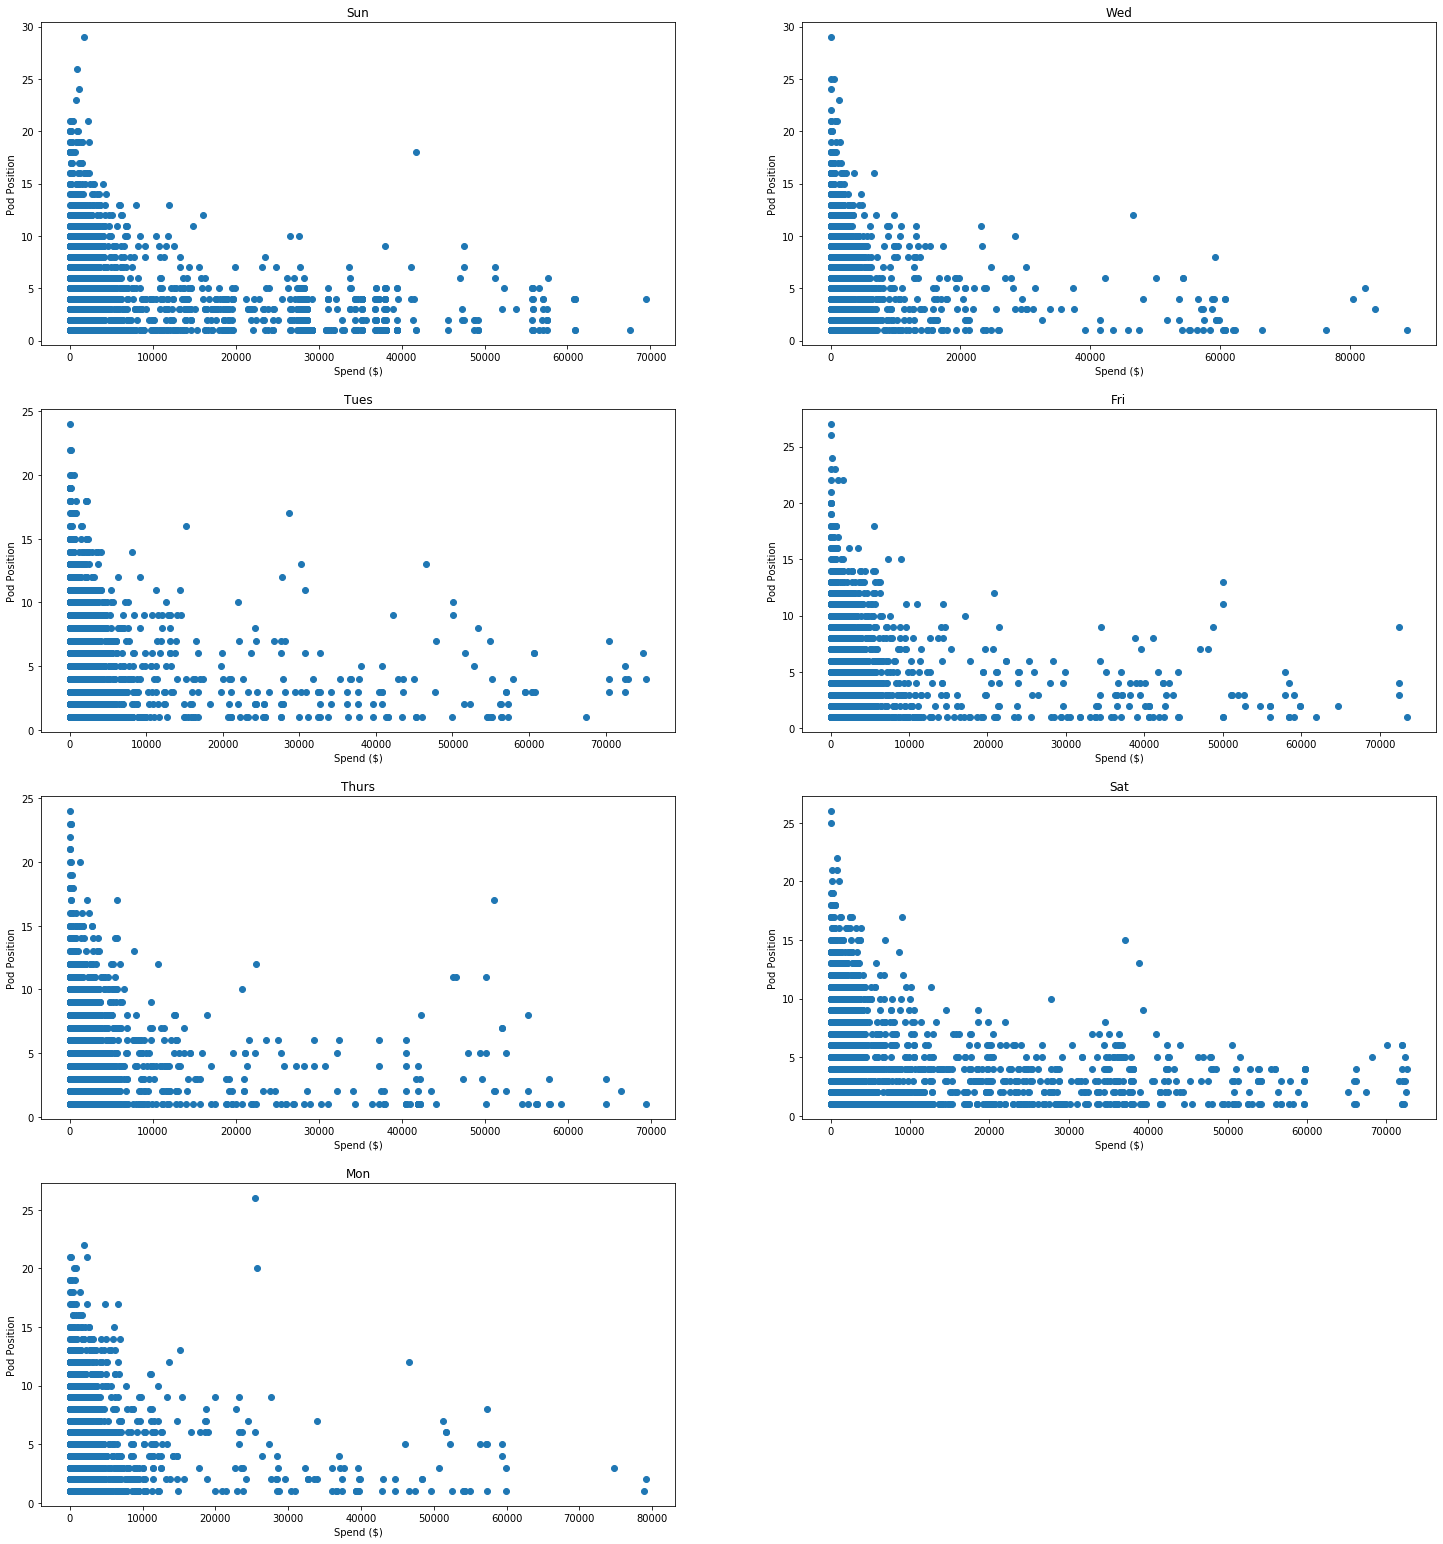

In [113]:
day = pst2['Day Of Week'].unique()
plt.figure(figsize = (25,70))
for i in enumerate(day):
    spend_pod = pst2.loc[(pst2['Day Of Week']==i[1])  ,['Spend ($)','Pod Position']]
    ax = plt.subplot(10, 2, i[0]+1)
    plt.scatter(spend_pod['Spend ($)'],spend_pod['Pod Position'])
    plt.title(i[1])
    plt.xlabel("Spend ($)")
    plt.ylabel("Pod Position")

In [114]:
for i in enumerate(day):
    spend_pod = pst2.loc[(pst2['Day Of Week']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

Sun -0.08212355911032239
Wed -0.017530075387944485
Tues -0.007175162882044321
Fri -0.0048148945294465345
Thurs -0.025835514643875943
Sat -0.0633484307677525
Mon 0.0020705501355392044


#### `Among the days during Saturday and Sunday, Spend and Pod position have higher correlation.  Now I shall check for day part`

In [115]:
dayp = pst2['Dayparts'].unique()

In [116]:
dayp

array(['OVERNIGHT', 'DAYTIME', 'EARLY MORNING', 'LATE FRINGE',
       'EARLY FRINGE', 'PRIME TIME', 'WEEKEND', 'EVENING NEWS',
       'PRIME ACCESS'], dtype=object)

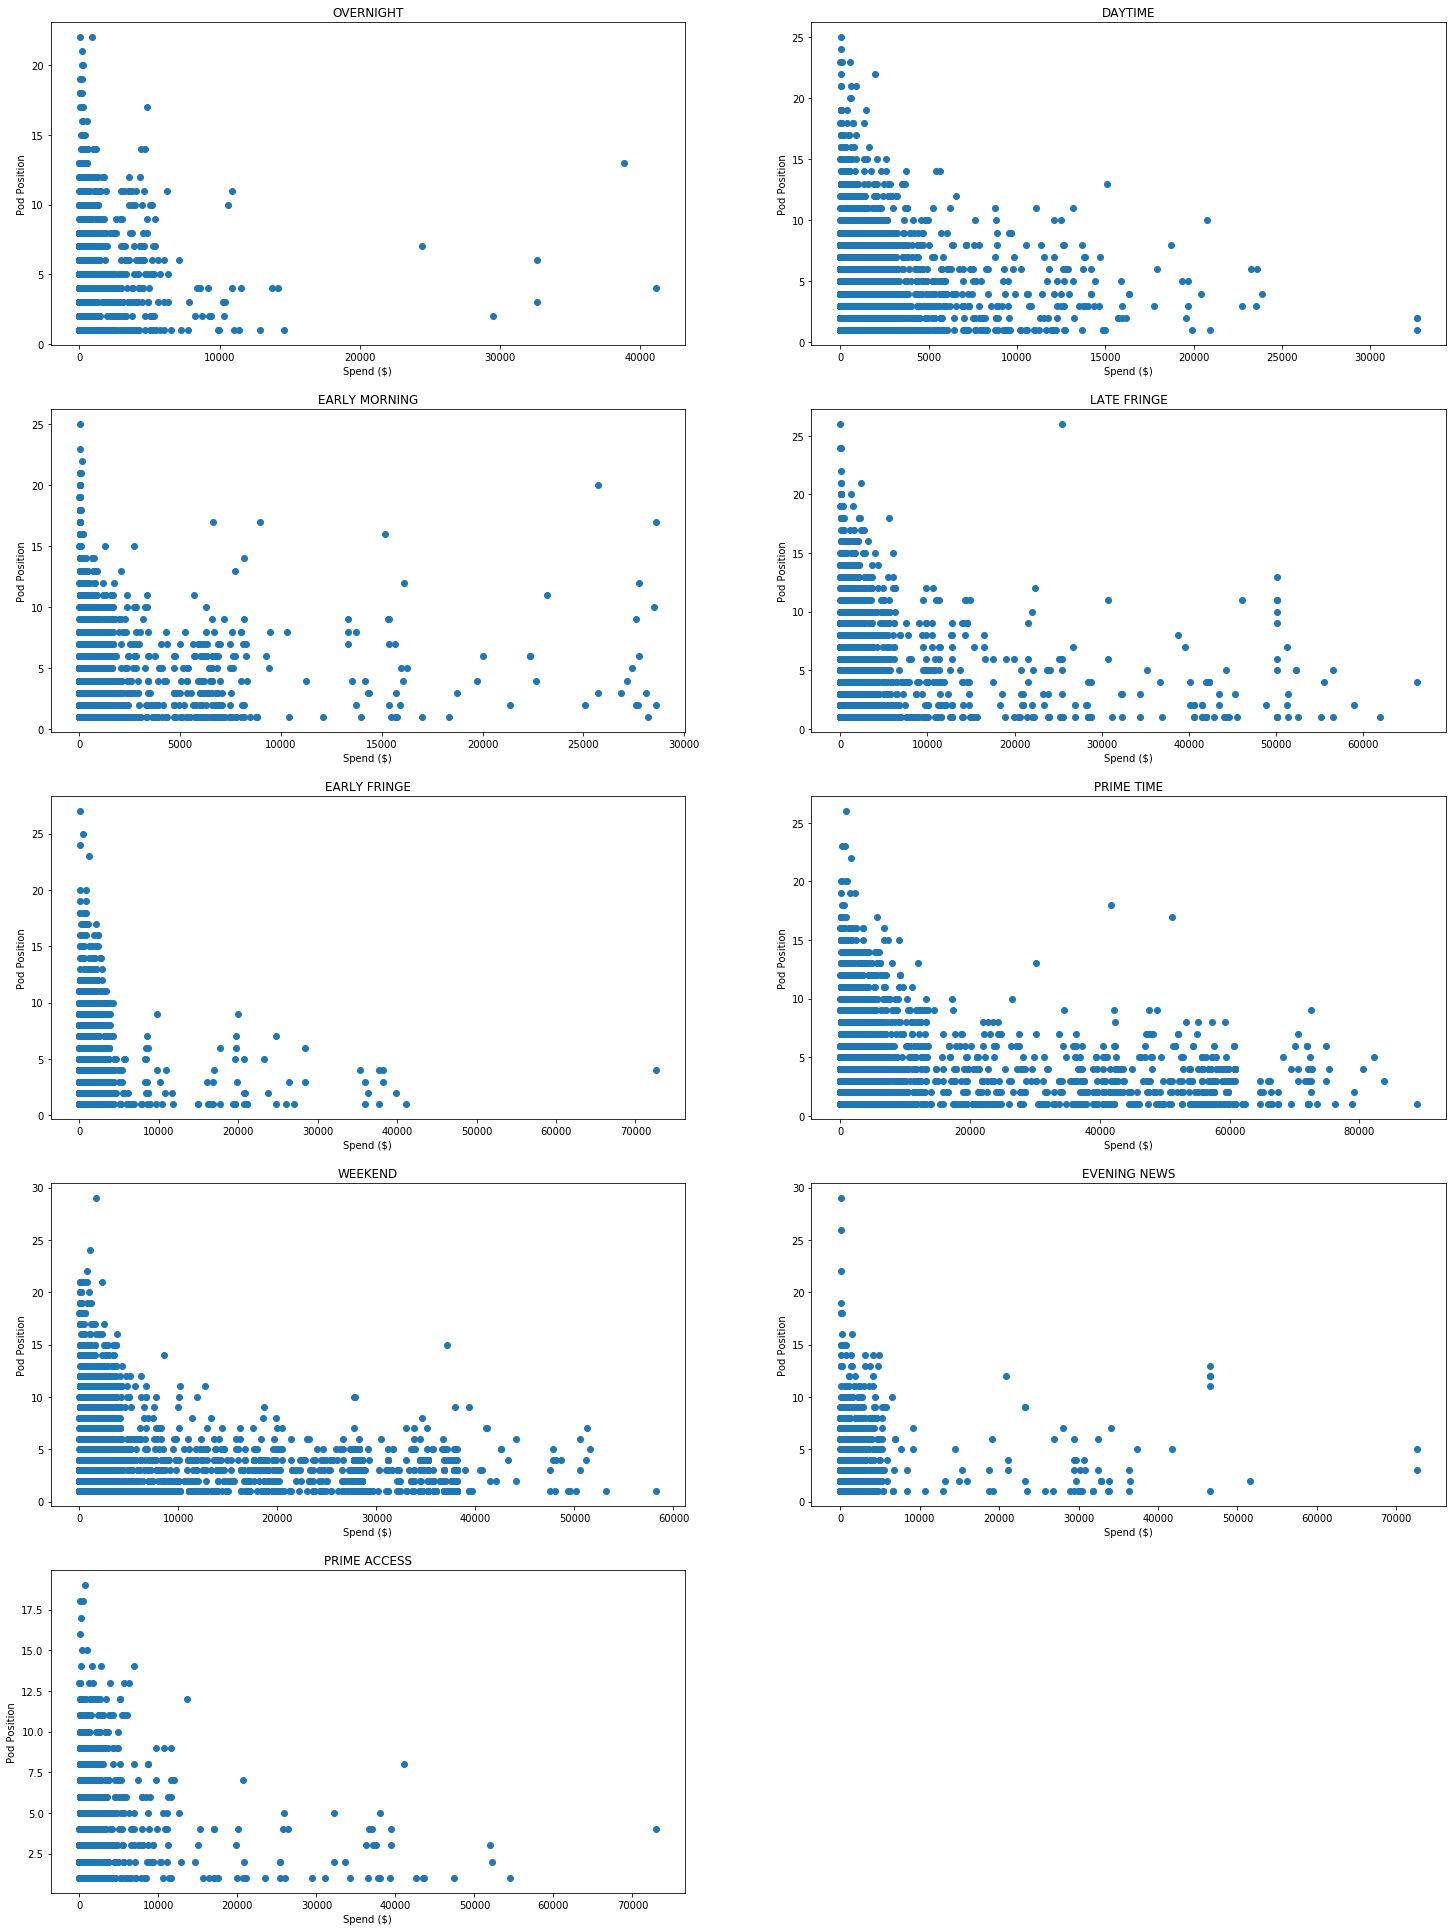

In [117]:
dayp = pst2['Dayparts'].unique()
plt.figure(figsize = (25,70))
for i in enumerate(dayp):
    spend_pod = pst2.loc[(pst2['Dayparts']==i[1])  ,['Spend ($)','Pod Position']]
    ax = plt.subplot(10, 2, i[0]+1)
    plt.scatter(spend_pod['Spend ($)'],spend_pod['Pod Position'])
    plt.title(i[1])
    plt.xlabel("Spend ($)")
    plt.ylabel("Pod Position")

In [118]:
for i in enumerate(dayp):
    spend_pod = pst2.loc[(pst2['Dayparts']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

OVERNIGHT 0.06003276642805156
DAYTIME 0.019098211444715837
EARLY MORNING 0.0778757164973569
LATE FRINGE 0.016887884380227532
EARLY FRINGE -0.02732347468497008
PRIME TIME -0.08678568014652345
WEEKEND -0.10923239140923695
EVENING NEWS 0.017123301246917955
PRIME ACCESS -0.06915141640952989


#### `Here also we can see that, during the weekend, Spend and Pod position have higher correlation.  Now I shall check for day time`

In [119]:
pst3 = pst2.loc[(pst2['Dayparts']=='WEEKEND')  ,:]

In [120]:
#check
#pst3

In [121]:
dayt = pst3['Day_Time'].unique()

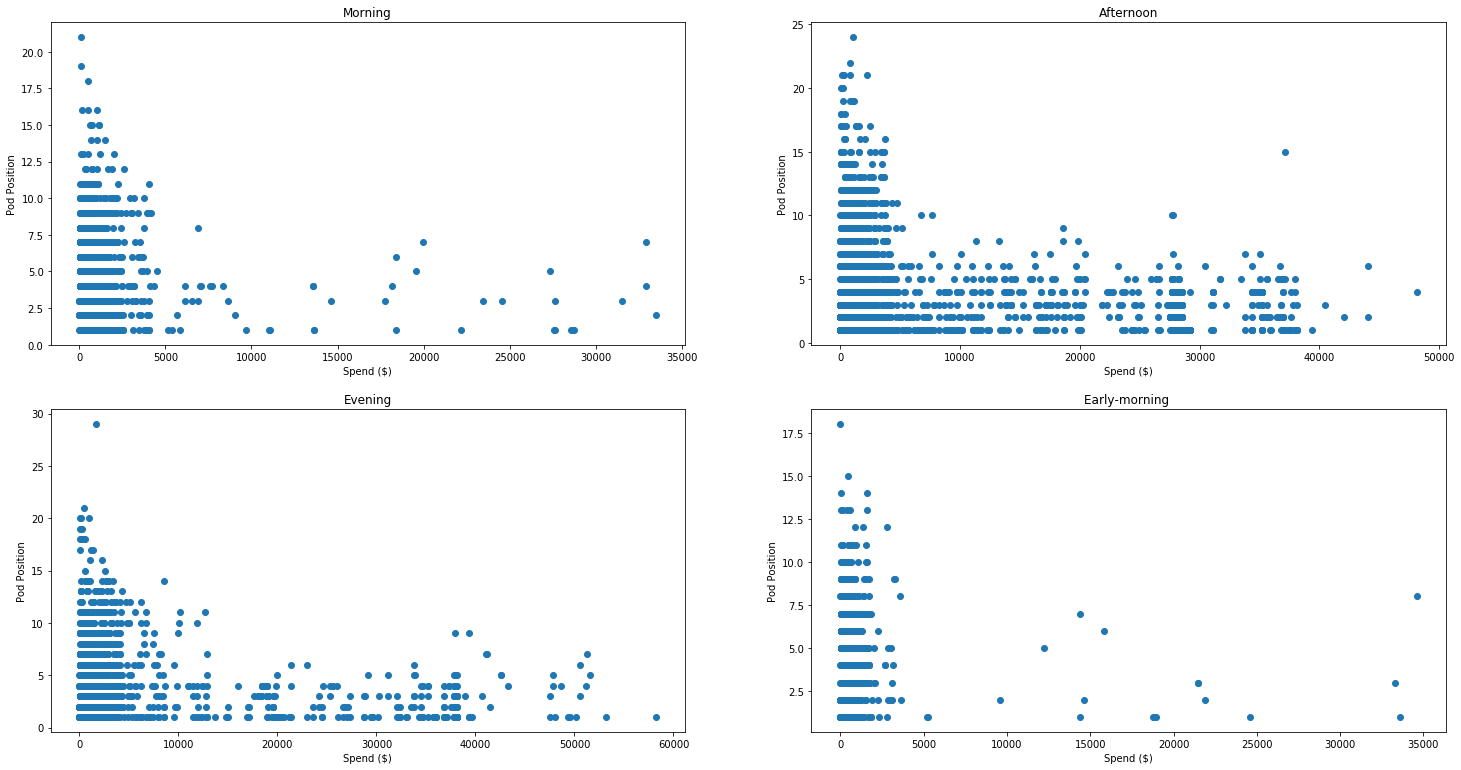

In [122]:
plt.figure(figsize = (25,70))
for i in enumerate(dayt):
    spend_pod = pst3.loc[(pst3['Day_Time']==i[1])  ,['Spend ($)','Pod Position']]
    ax = plt.subplot(10, 2, i[0]+1)
    plt.scatter(spend_pod['Spend ($)'],spend_pod['Pod Position'])
    plt.title(i[1])
    plt.xlabel("Spend ($)")
    plt.ylabel("Pod Position")

In [123]:
for i in enumerate(dayt):
    spend_pod = pst3.loc[(pst3['Day_Time']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

Morning -0.017967176906109102
Afternoon -0.1280398543083124
Evening -0.12761166319531705
Early-morning  -0.020918483096198925


In [124]:
dayt

['Morning', 'Afternoon', 'Evening', 'Early-morning ']
Categories (6, object): ['Mid-night' < 'Early-morning ' < 'Morning' < 'Afternoon' < 'Evening' < 'Night']

#### `Final`

In [125]:
pst4 = pst3.loc[(pst3['Day_Time']=='Afternoon') | (pst3['Day_Time']=='Evening'),:]
#pst4 = pst4.loc[(pst4['Broadcast Week']==41) | (pst4['Broadcast Week']==42) | (pst4['Broadcast Week']==43) | (pst4['Broadcast Week']==44) ,:]

In [126]:
#pst4

In [127]:
daytt = pst4['Day_Time'].unique()

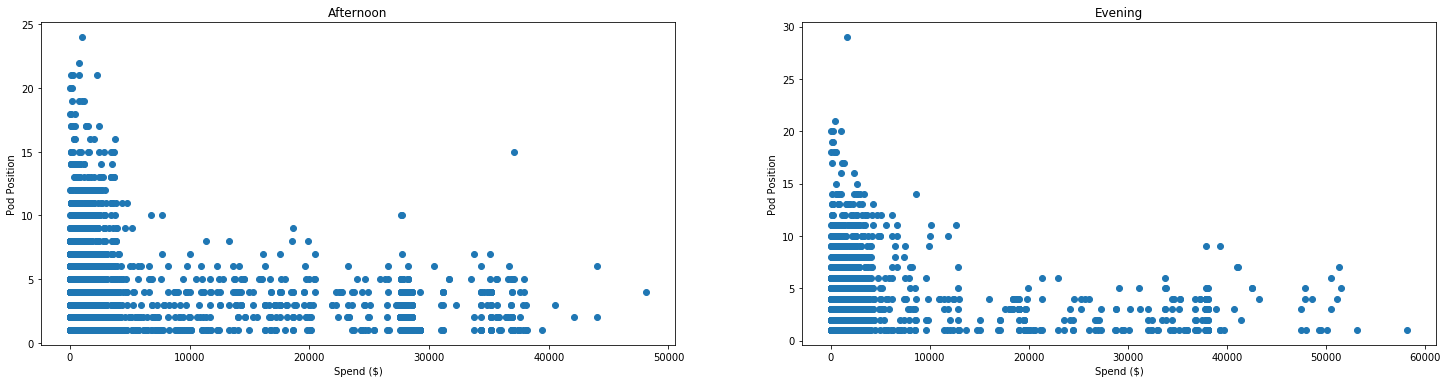

In [128]:
plt.figure(figsize = (25,70))
for i in enumerate(daytt):
    spend_pod = pst4.loc[(pst4['Day_Time']==i[1])  ,['Spend ($)','Pod Position']]
    ax = plt.subplot(10, 2, i[0]+1)
    plt.scatter(spend_pod['Spend ($)'],spend_pod['Pod Position'])
    plt.title(i[1])
    plt.xlabel("Spend ($)")
    plt.ylabel("Pod Position")

In [129]:
for i in enumerate(daytt):
    spend_pod = pst4.loc[(pst4['Day_Time']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

Afternoon -0.1280398543083124
Evening -0.12761166319531705


##### `Q4 -> Oct -> Weekend -> 12pm-9pm`   

##### `Time of the day`
- Morning       5 am to 12 pm
- Afternoon     12 pm to 5 pm
- Evening       5 pm to 9 pm
- Night         9 pm to 12 am
- Mid-Night     12 am to 5 am

# Q2. What is the share of various brands in TV airings and how has it changed from Q1 to Q4 in 2021?

In [130]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [131]:
def brnd_chng_count(col):
    df = data.copy()
    q1 = df.loc[df['Quarters']=='Q1',:]
    q2 = df.loc[df['Quarters']=='Q2',:]
    q3 = df.loc[df['Quarters']=='Q3',:]
    q4 = df.loc[df['Quarters']=='Q4',:]
    
    spend_q1_count = q1.pivot_table(values =col,index=['Brand'],aggfunc='count')
    spend_q1_count.rename(columns = {'Spend ($)':'Q1-Total'}, inplace = True)
    
    spend_q2_count = q2.pivot_table(values =col,index=['Brand'],aggfunc='count')
    spend_q2_count.rename(columns = {'Spend ($)':'Q2-Total'}, inplace = True)
    
    spend_q3_count = q3.pivot_table(values =col,index=['Brand'],aggfunc='count')
    spend_q3_count.rename(columns = {'Spend ($)':'Q3-Total'}, inplace = True)
    
    spend_q4_count = q4.pivot_table(values =col,index=['Brand'],aggfunc='count')
    spend_q4_count.rename(columns = {'Spend ($)':'Q4-Total'}, inplace = True) 
    
    x=pd.concat([spend_q1_count, spend_q2_count,spend_q3_count, spend_q4_count], axis=1)
    return x

In [132]:
def brnd_chng_sum(col):
    df = data.copy()
    q1 = df.loc[df['Quarters']=='Q1',:]
    q2 = df.loc[df['Quarters']=='Q2',:]
    q3 = df.loc[df['Quarters']=='Q3',:]
    q4 = df.loc[df['Quarters']=='Q4',:]
    
    spend_q1_sum = q1.pivot_table(values =col,index=['Brand'],aggfunc='sum')
    spend_q1_sum.rename(columns = {'Spend ($)':'Q1-Total'}, inplace = True)
    
    spend_q2_sum = q2.pivot_table(values =col,index=['Brand'],aggfunc='sum')
    spend_q2_sum.rename(columns = {'Spend ($)':'Q2-Total'}, inplace = True)
    
    spend_q3_sum = q3.pivot_table(values =col,index=['Brand'],aggfunc='sum')
    spend_q3_sum.rename(columns = {'Spend ($)':'Q3-Total'}, inplace = True)
    
    spend_q4_sum = q4.pivot_table(values =col,index=['Brand'],aggfunc='sum')
    spend_q4_sum.rename(columns = {'Spend ($)':'Q4-Total'}, inplace = True) 
    
    x=pd.concat([spend_q1_sum, spend_q2_sum,spend_q3_sum, spend_q4_sum], axis=1)
    return x

In [133]:
def brnd_chng_avg(col):
    df = data.copy()
    q1 = df.loc[df['Quarters']=='Q1',:]
    q2 = df.loc[df['Quarters']=='Q2',:]
    q3 = df.loc[df['Quarters']=='Q3',:]
    q4 = df.loc[df['Quarters']=='Q4',:]
    
    spend_q1_avg = q1.pivot_table(values =col,index=['Brand'],aggfunc='mean')
    spend_q1_avg.rename(columns = {'Spend ($)':'Q1-Total'}, inplace = True)
    
    spend_q2_avg = q2.pivot_table(values =col,index=['Brand'],aggfunc='mean')
    spend_q2_avg.rename(columns = {'Spend ($)':'Q2-Total'}, inplace = True)
    
    spend_q3_avg = q3.pivot_table(values =col,index=['Brand'],aggfunc='mean')
    spend_q3_avg.rename(columns = {'Spend ($)':'Q3-Total'}, inplace = True)
    
    spend_q4_avg = q4.pivot_table(values =col,index=['Brand'],aggfunc='mean')
    spend_q4_avg.rename(columns = {'Spend ($)':'Q4-Total'}, inplace = True) 
    
    x=pd.concat([spend_q1_avg, spend_q2_avg,spend_q3_avg, spend_q4_avg], axis=1)

    x['Q1-Total'] = x['Q1-Total'].round(2)
    x['Q2-Total'] = x['Q2-Total'].round(2)
    x['Q3-Total'] = x['Q3-Total'].round(2)
    x['Q4-Total'] = x['Q4-Total'].round(2)
    return x

In [134]:
s=brnd_chng_sum('Spend ($)')
c=brnd_chng_count('Spend ($)')
a=brnd_chng_avg('Spend ($)')

In [135]:
s['Q1-Q2'] = round(100*(s['Q2-Total']-s['Q1-Total'])/s['Q1-Total'],2)
s['Q2-Q3'] = round(100*(s['Q3-Total']-s['Q2-Total'])/s['Q2-Total'],2)
s['Q3-Q4'] = round(100*(s['Q4-Total']-s['Q3-Total'])/s['Q3-Total'],2)
s['Q1-Q4'] = round(100*(s['Q4-Total']-s['Q1-Total'])/s['Q1-Total'],2)
sx=s[['Q1-Q2','Q2-Q3','Q3-Q4','Q1-Q4']]

c['Q1-Q2'] = round(100*(c['Q2-Total']-c['Q1-Total'])/c['Q1-Total'],2)
c['Q2-Q3'] = round(100*(c['Q3-Total']-c['Q2-Total'])/c['Q2-Total'],2)
c['Q3-Q4'] = round(100*(c['Q4-Total']-c['Q3-Total'])/c['Q3-Total'],2)
c['Q1-Q4'] = round(100*(c['Q4-Total']-c['Q1-Total'])/c['Q1-Total'],2)
cx=c[['Q1-Q2','Q2-Q3','Q3-Q4','Q1-Q4']]

a['Q1-Q2'] = round(100*(a['Q2-Total']-a['Q1-Total'])/a['Q1-Total'],2)
a['Q2-Q3'] = round(100*(a['Q3-Total']-a['Q2-Total'])/a['Q2-Total'],2)
a['Q3-Q4'] = round(100*(a['Q4-Total']-a['Q3-Total'])/a['Q3-Total'],2)
a['Q1-Q4'] = round(100*(a['Q4-Total']-a['Q1-Total'])/a['Q1-Total'],2)
ax=a[['Q1-Q2','Q2-Q3','Q3-Q4','Q1-Q4']]


In [136]:
st=s[['Q1-Total','Q2-Total','Q3-Total','Q4-Total']]
ct=c[['Q1-Total','Q2-Total','Q3-Total','Q4-Total']]
at=a[['Q1-Total','Q2-Total','Q3-Total','Q4-Total']]

In [137]:
# Quarter wise
stp=st.copy()
tot=[]
for i in range(len(stp)):
    tot.append(stp.iloc[i].sum())
    
for i in range(len(stp)):
    stp.iloc[i]=round(100*(stp.iloc[i]/tot[i]),2)

In [138]:
# Quarter wise
ctp=ct.copy()
cnt=[]
for i in range(len(ctp)):
    cnt.append(ctp.iloc[i].sum())
    
for i in range(len(ctp)):
    ctp.iloc[i]=round(100*(ctp.iloc[i]/cnt[i]),2)

In [139]:
# Brand wise
spt=st.copy()
for i in spt.columns:
    spt[i]=round((100*spt[i])/spt[i].sum(),2)
    
cpt=ct.copy()
for i in cpt.columns:
    cpt[i]=round((100*cpt[i])/cpt[i].sum(),2)

In [140]:
def plot(df,y_lab):
    x=['Q1','Q2','Q3','Q4']
    plt.figure(figsize=(20,90))
    for i in enumerate(df.index):
        ax = plt.subplot(20,3, i[0]+1)
        y=df.iloc[i[0]].values
        plt.xlabel(i[1])
        plt.ylabel(y_lab) 
        plt.bar(x,y)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    height,
                    ha="center")

In [141]:
def chng(df,y_lab):
    x=['Q1-Q2','Q2-Q3','Q3-Q4','Q1-Q4']
    plt.figure(figsize=(24,90))
    for i in enumerate(df.index):
        ax = plt.subplot(20,2, i[0]+1)
        y=df.iloc[i[0]].values
        plt.xlabel(i[1])
        plt.ylabel(y_lab) 
        plt.bar(x,y)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height),
                    ha="center")

In [142]:
def piec(df,heading):
    lab = df.index
    cols = df.columns
    plt.figure(figsize=(15,80))
    for i in enumerate(cols):
        val = df[i[1]].values
        ax = plt.subplot(15,2, i[0]+1)
        plt.pie(val, labels = lab,autopct='%1.2f%%')
        plt.title(i[0]+1)
    print('\033[1m' +heading)
    plt.show()

## Brand wise `Share`

##### `Count`

In [143]:
display_side_by_side(ct,cpt,titles=['Total Adv','% Total Adv'])

Total Adv 
 
 
 
 Q1-Total 
 Q2-Total 
 Q3-Total 
 Q4-Total 
 
 
 Brand 
 
 
 
 
 
 
 
 
 Honda Cars 
 25929 
 19388 
 23020 
 16928 
 
 
 Hyundai Motors India 
 22396 
 18623 
 16484 
 13793 
 
 
 Mahindra and Mahindra 
 43371 
 46244 
 39537 
 18738 
 
 
 Maruti Suzuki 
 82381 
 71695 
 66196 
 60002 
 
 
 Tata Motors 
 20679 
 14967 
 14912 
 30483 
 
 
 Toyota 
 18212 
 22083 
 19678 
 6045 
 
 
 % Total Adv 
 
 
 
 Q1-Total 
 Q2-Total 
 Q3-Total 
 Q4-Total 
 
 
 Brand 
 
 
 
 
 
 
 
 
 Honda Cars 
 12.18 
 10.05 
 12.80 
 11.60 
 
 
 Hyundai Motors India 
 10.52 
 9.65 
 9.17 
 9.45 
 
 
 Mahindra and Mahindra 
 20.37 
 23.96 
 21.99 
 12.84 
 
 
 Maruti Suzuki 
 38.68 
 37.15 
 36.81 
 41.10 
 
 
 Tata Motors 
 9.71 
 7.75 
 8.29 
 20.88 
 
 
 Toyota 
 8.55 
 11.44 
 10.94 
 4.14

In [144]:
(19388-25929)/25929

-0.2522658027691002

In [145]:
ct

Q1-Total  Q2-Total  Q3-Total  Q4-Total
Brand                                                        
Honda Cars                25929     19388     23020     16928
Hyundai Motors India      22396     18623     16484     13793
Mahindra and Mahindra     43371     46244     39537     18738
Maruti Suzuki             82381     71695     66196     60002
Tata Motors               20679     14967     14912     30483
Toyota                    18212     22083     19678      6045

In [146]:
ctp

Q1-Total  Q2-Total  Q3-Total  Q4-Total
Brand                                                        
Honda Cars                30.41     22.74     27.00     19.85
Hyundai Motors India      31.41     26.12     23.12     19.35
Mahindra and Mahindra     29.33     31.27     26.73     12.67
Maruti Suzuki             29.39     25.58     23.62     21.41
Tata Motors               25.52     18.47     18.40     37.61
Toyota                    27.59     33.45     29.81      9.16

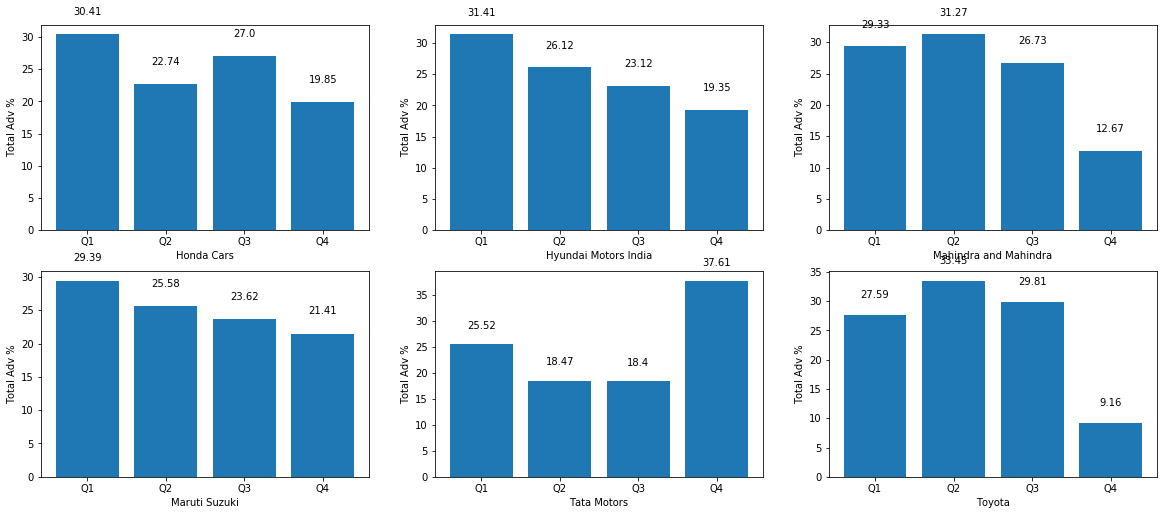

In [147]:
plot(ctp,'Total Adv %')

In [148]:
#count
cx

Q1-Q2  Q2-Q3   Q3-Q4  Q1-Q4
Brand                                             
Honda Cars            -25.23  18.73  -26.46 -34.71
Hyundai Motors India  -16.85 -11.49  -16.32 -38.41
Mahindra and Mahindra   6.62 -14.50  -52.61 -56.80
Maruti Suzuki         -12.97  -7.67   -9.36 -27.17
Tata Motors           -27.62  -0.37  104.42  47.41
Toyota                 21.26 -10.89  -69.28 -66.81

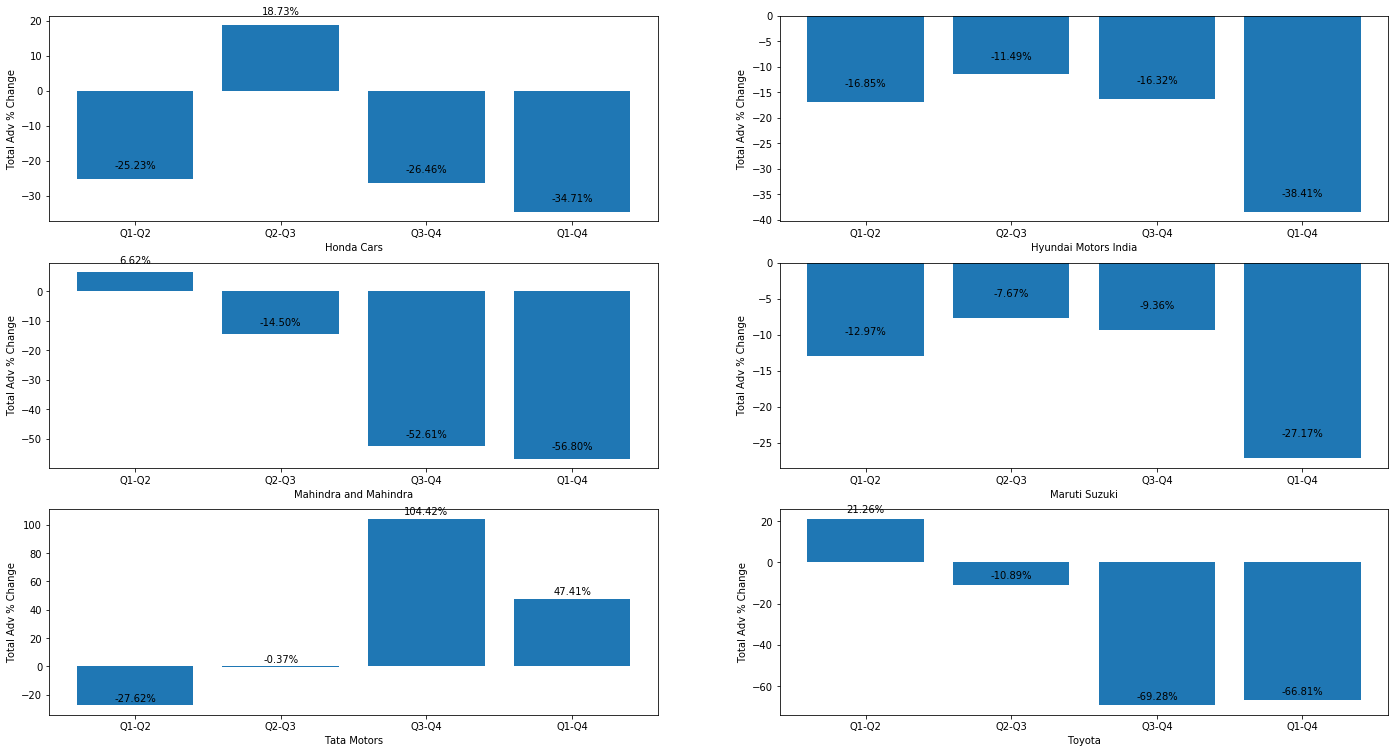

In [149]:
chng(cx,'Total Adv % Change')

##### `Spend`

In [150]:
display_side_by_side(st,spt,titles=['Total Spend ($)','% Total Spend ($)'])

Total Spend ($) 
 
 
 
 Q1-Total 
 Q2-Total 
 Q3-Total 
 Q4-Total 
 
 
 Brand 
 
 
 
 
 
 
 
 
 Honda Cars 
 16963778 
 9549604 
 12073060 
 9671898 
 
 
 Hyundai Motors India 
 62470842 
 40830200 
 38727107 
 38780607 
 
 
 Mahindra and Mahindra 
 129215380 
 99500908 
 95196781 
 73392586 
 
 
 Maruti Suzuki 
 183019481 
 129229242 
 124833119 
 121564630 
 
 
 Tata Motors 
 25796631 
 16408174 
 15831865 
 36753557 
 
 
 Toyota 
 40351398 
 29509857 
 28424768 
 14367089 
 
 
 % Total Spend ($) 
 
 
 
 Q1-Total 
 Q2-Total 
 Q3-Total 
 Q4-Total 
 
 
 Brand 
 
 
 
 
 
 
 
 
 Honda Cars 
 3.71 
 2.94 
 3.83 
 3.28 
 
 
 Hyundai Motors India 
 13.65 
 12.56 
 12.29 
 13.17 
 
 
 Mahindra and Mahindra 
 28.22 
 30.61 
 30.21 
 24.92 
 
 
 Maruti Suzuki 
 39.98 
 39.76 
 39.62 
 41.27 
 
 
 Tata Motors 
 5.63 
 5.05 
 5.02 
 12.48 
 
 
 Toyota 
 8.81 
 9.08 
 9.02 
 4.88

In [151]:
(9549604-16963778)/16963778

-0.4370591268053614

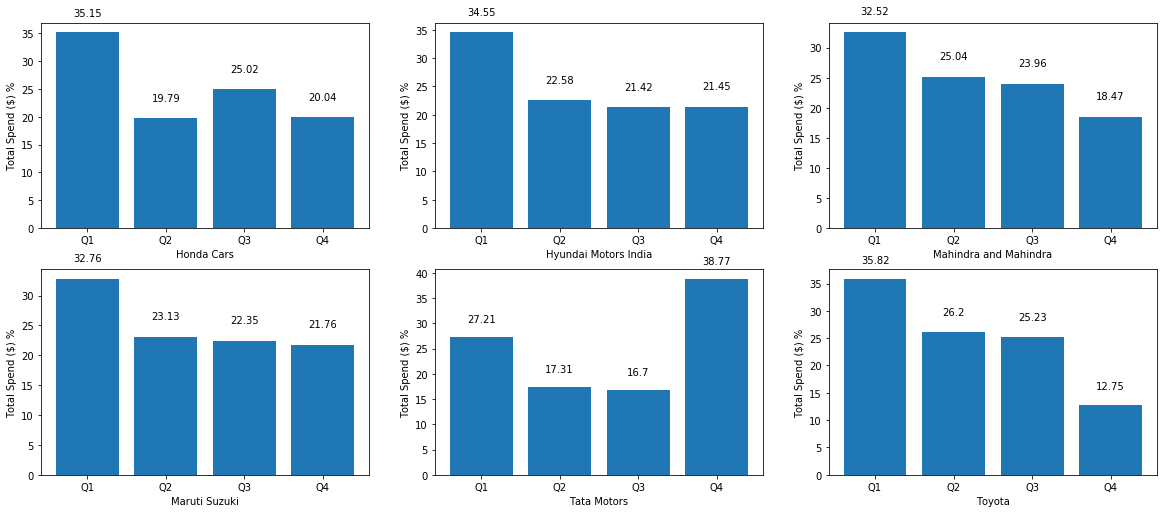

In [152]:
plot(stp,'Total Spend ($) %')

In [153]:
# sum
sx

Q1-Q2  Q2-Q3   Q3-Q4  Q1-Q4
Brand                                             
Honda Cars            -43.71  26.42  -19.89 -42.99
Hyundai Motors India  -34.64  -5.15    0.14 -37.92
Mahindra and Mahindra -23.00  -4.33  -22.90 -43.20
Maruti Suzuki         -29.39  -3.40   -2.62 -33.58
Tata Motors           -36.39  -3.51  132.15  42.47
Toyota                -26.87  -3.68  -49.46 -64.40

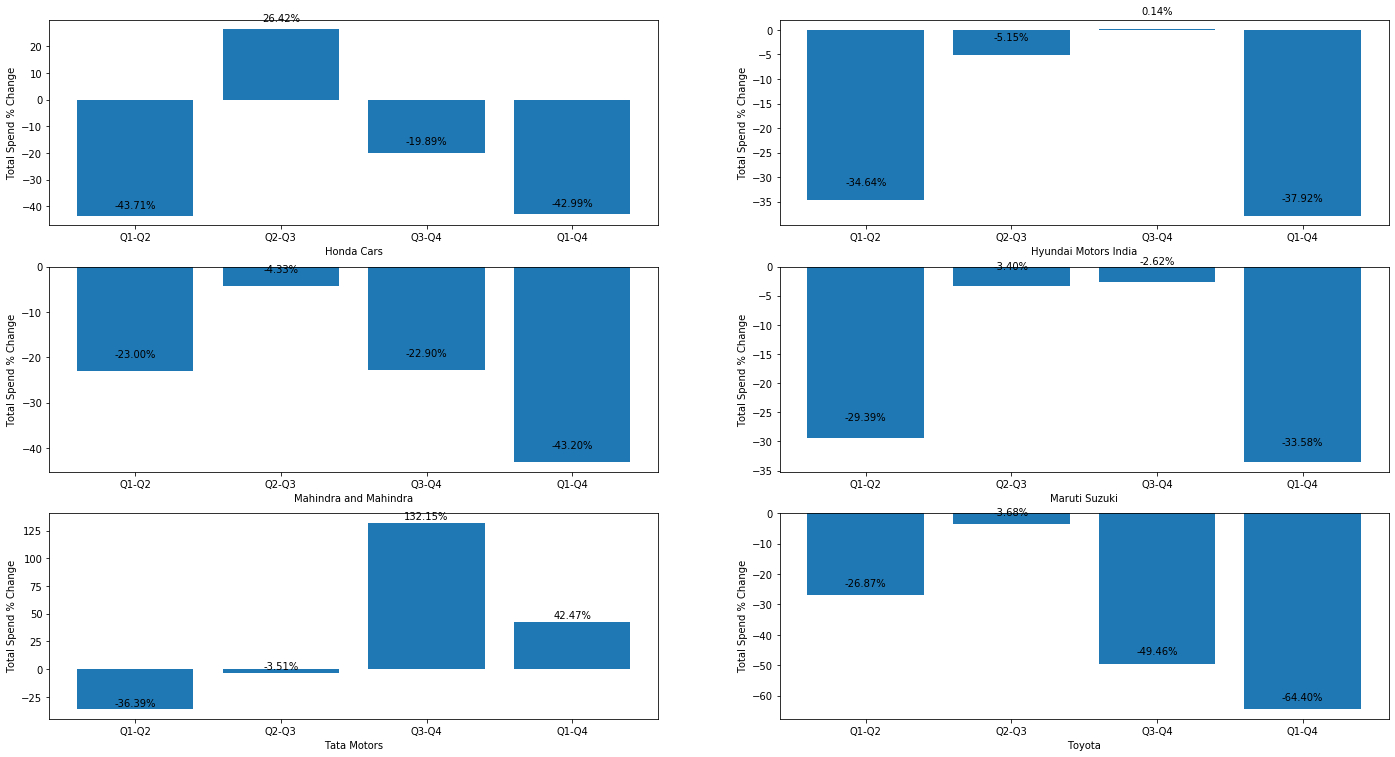

In [154]:
chng(sx,'Total Spend % Change')

In [155]:
display_side_by_side(s,c,a,titles=['Total Spend','Total Advertisements','Average Spend'])

Total Spend 
 
 
 
 Q1-Total 
 Q2-Total 
 Q3-Total 
 Q4-Total 
 Q1-Q2 
 Q2-Q3 
 Q3-Q4 
 Q1-Q4 
 
 
 Brand 
 
 
 
 
 
 
 
 
 
 
 
 
 Honda Cars 
 16963778 
 9549604 
 12073060 
 9671898 
 -43.71 
 26.42 
 -19.89 
 -42.99 
 
 
 Hyundai Motors India 
 62470842 
 40830200 
 38727107 
 38780607 
 -34.64 
 -5.15 
 0.14 
 -37.92 
 
 
 Mahindra and Mahindra 
 129215380 
 99500908 
 95196781 
 73392586 
 -23.00 
 -4.33 
 -22.90 
 -43.20 
 
 
 Maruti Suzuki 
 183019481 
 129229242 
 124833119 
 121564630 
 -29.39 
 -3.40 
 -2.62 
 -33.58 
 
 
 Tata Motors 
 25796631 
 16408174 
 15831865 
 36753557 
 -36.39 
 -3.51 
 132.15 
 42.47 
 
 
 Toyota 
 40351398 
 29509857 
 28424768 
 14367089 
 -26.87 
 -3.68 
 -49.46 
 -64.40 
 
 
 Total Advertisements 
 
 
 
 Q1-Total 
 Q2-Total 
 Q3-Total 
 Q4-Total 
 Q1-Q2 
 Q2-Q3 
 Q3-Q4 
 Q1-Q4 
 
 
 Brand 
 
 
 
 
 
 
 
 
 
 
 
 
 Honda Cars 
 25929 
 19388 
 23020 
 16928 
 -25.23 
 18.73 
 -26.46 
 -34.71 
 
 
 Hyundai Motors India 
 22396 
 18623 
 16484 
 13793 
 -16.85 
 -11.49 
 -16.32 
 -38.41 
 
 
 Mahindra and Mahindra 
 43371 
 46244 
 39537 
 18738 
 6.62 
 -14.50 
 -52.61 
 -56.80 
 
 
 Maruti Suzuki 
 82381 
 71695 
 66196 
 60002 
 -12.97 
 -7.67 
 -9.36 
 -27.17 
 
 
 Tata Motors 
 20679 
 14967 
 14912 
 30483 
 -27.62 
 -0.37 
 104.42 
 47.41 
 
 
 Toyota 
 18212 
 22083 
 19678 
 6045 
 21.26 
 -10.89 
 -69.28 
 -66.81 
 
 
 Average Spend 
 
 
 
 Q1-Total 
 Q2-Total 
 Q3-Total 
 Q4-Total 
 Q1-Q2 
 Q2-Q3 
 Q3-Q4 
 Q1-Q4 
 
 
 Brand 
 
 
 
 
 
 
 
 
 
 
 
 
 Honda Cars 
 654.24 
 492.55 
 524.46 
 571.36 
 -24.71 
 6.48 
 8.94 
 -12.67 
 
 
 Hyundai Motors India 
 2789.37 
 2192.46 
 2349.38 
 2811.62 
 -21.40 
 7.16 
 19.67 
 0.80 
 
 
 Mahindra and Mahindra 
 2979.30 
 2151.65 
 2407.79 
 3916.78 
 -27.78 
 11.90 
 62.67 
 31.47 
 
 
 Maruti Suzuki 
 2221.62 
 1802.49 
 1885.81 
 2026.01 
 -18.87 
 4.62 
 7.43 
 -8.80 
 
 
 Tata Motors 
 1247.48 
 1096.29 
 1061.69 
 1205.71 
 -12.12 
 -3.16 
 13.57 
 -3.35 
 
 
 Toyota 
 2215.65 
 1336.32 
 1444.49 
 2376.69 
 -39.69 
 8.09 
 64.53 
 7.27

In [156]:
#count
cx

Q1-Q2  Q2-Q3   Q3-Q4  Q1-Q4
Brand                                             
Honda Cars            -25.23  18.73  -26.46 -34.71
Hyundai Motors India  -16.85 -11.49  -16.32 -38.41
Mahindra and Mahindra   6.62 -14.50  -52.61 -56.80
Maruti Suzuki         -12.97  -7.67   -9.36 -27.17
Tata Motors           -27.62  -0.37  104.42  47.41
Toyota                 21.26 -10.89  -69.28 -66.81

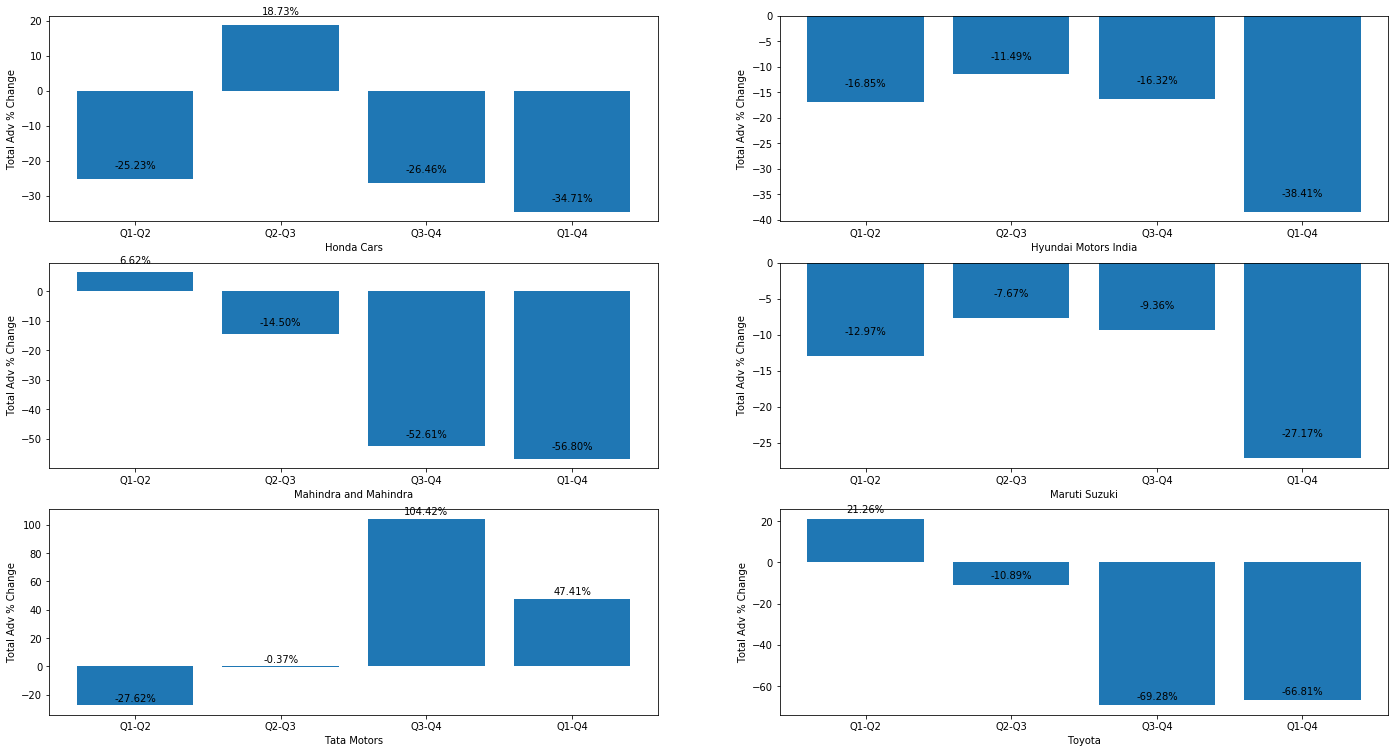

In [157]:
chng(cx,'Total Adv % Change')

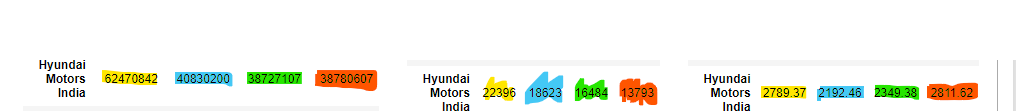

In [158]:
data.loc[(data['Spend ($)']==5500000)  ,['Brand','Product','Spend ($)','Pod Position','Quarters']]

Brand      Product  Spend ($)  Pod Position Quarters
93821  Hyundai Motors India  Hyundai I20    5500000             4       Q1

In [159]:
display_side_by_side(sx,cx,titles=['Total Spend % Change ','Total Adv % Change'])

Total Spend % Change 
 
 
 
 Q1-Q2 
 Q2-Q3 
 Q3-Q4 
 Q1-Q4 
 
 
 Brand 
 
 
 
 
 
 
 
 
 Honda Cars 
 -43.71 
 26.42 
 -19.89 
 -42.99 
 
 
 Hyundai Motors India 
 -34.64 
 -5.15 
 0.14 
 -37.92 
 
 
 Mahindra and Mahindra 
 -23.00 
 -4.33 
 -22.90 
 -43.20 
 
 
 Maruti Suzuki 
 -29.39 
 -3.40 
 -2.62 
 -33.58 
 
 
 Tata Motors 
 -36.39 
 -3.51 
 132.15 
 42.47 
 
 
 Toyota 
 -26.87 
 -3.68 
 -49.46 
 -64.40 
 
 
 Total Adv % Change 
 
 
 
 Q1-Q2 
 Q2-Q3 
 Q3-Q4 
 Q1-Q4 
 
 
 Brand 
 
 
 
 
 
 
 
 
 Honda Cars 
 -25.23 
 18.73 
 -26.46 
 -34.71 
 
 
 Hyundai Motors India 
 -16.85 
 -11.49 
 -16.32 
 -38.41 
 
 
 Mahindra and Mahindra 
 6.62 
 -14.50 
 -52.61 
 -56.80 
 
 
 Maruti Suzuki 
 -12.97 
 -7.67 
 -9.36 
 -27.17 
 
 
 Tata Motors 
 -27.62 
 -0.37 
 104.42 
 47.41 
 
 
 Toyota 
 21.26 
 -10.89 
 -69.28 
 -66.81

## Quarter wise `Share`

In [160]:
spt

Q1-Total  Q2-Total  Q3-Total  Q4-Total
Brand                                                        
Honda Cars                 3.71      2.94      3.83      3.28
Hyundai Motors India      13.65     12.56     12.29     13.17
Mahindra and Mahindra     28.22     30.61     30.21     24.92
Maruti Suzuki             39.98     39.76     39.62     41.27
Tata Motors                5.63      5.05      5.02     12.48
Toyota                     8.81      9.08      9.02      4.88

Share of Spend (%)


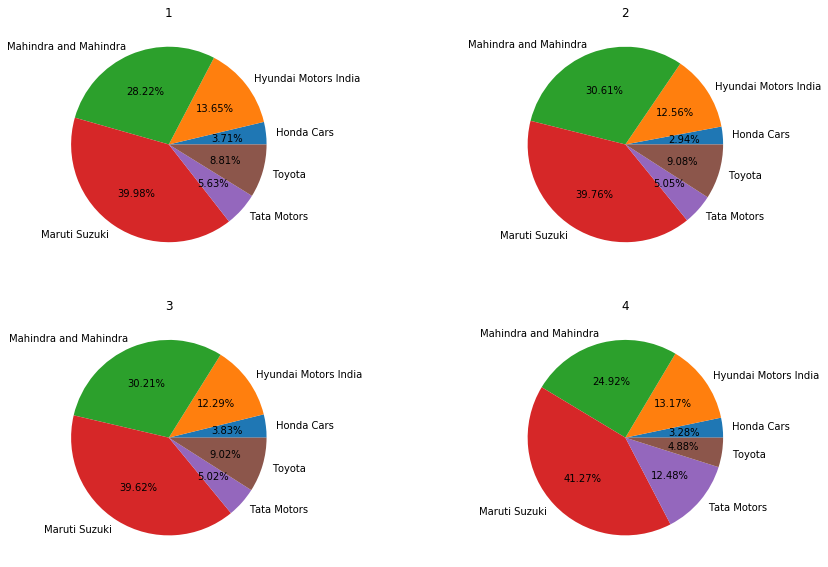

In [161]:
piec(spt,'Share of Spend (%)')

In [162]:
cpt

Q1-Total  Q2-Total  Q3-Total  Q4-Total
Brand                                                        
Honda Cars                12.18     10.05     12.80     11.60
Hyundai Motors India      10.52      9.65      9.17      9.45
Mahindra and Mahindra     20.37     23.96     21.99     12.84
Maruti Suzuki             38.68     37.15     36.81     41.10
Tata Motors                9.71      7.75      8.29     20.88
Toyota                     8.55     11.44     10.94      4.14

Share of Ads (%)


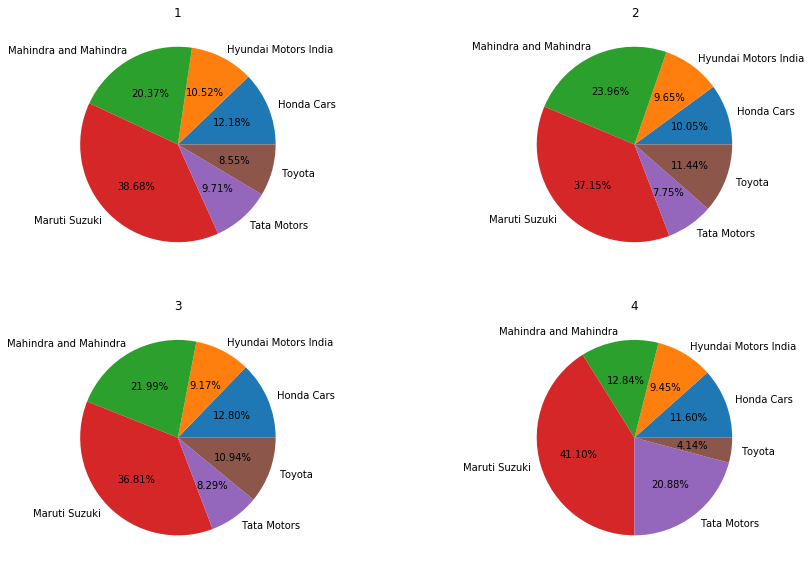

In [163]:
piec(cpt,'Share of Ads (%)')

In [164]:
display_side_by_side(spt,cpt,titles=['Share of Spend (%) ','Share of Ads (%)'])

Share of Spend (%) 
 
 
 
 Q1-Total 
 Q2-Total 
 Q3-Total 
 Q4-Total 
 
 
 Brand 
 
 
 
 
 
 
 
 
 Honda Cars 
 3.71 
 2.94 
 3.83 
 3.28 
 
 
 Hyundai Motors India 
 13.65 
 12.56 
 12.29 
 13.17 
 
 
 Mahindra and Mahindra 
 28.22 
 30.61 
 30.21 
 24.92 
 
 
 Maruti Suzuki 
 39.98 
 39.76 
 39.62 
 41.27 
 
 
 Tata Motors 
 5.63 
 5.05 
 5.02 
 12.48 
 
 
 Toyota 
 8.81 
 9.08 
 9.02 
 4.88 
 
 
 Share of Ads (%) 
 
 
 
 Q1-Total 
 Q2-Total 
 Q3-Total 
 Q4-Total 
 
 
 Brand 
 
 
 
 
 
 
 
 
 Honda Cars 
 12.18 
 10.05 
 12.80 
 11.60 
 
 
 Hyundai Motors India 
 10.52 
 9.65 
 9.17 
 9.45 
 
 
 Mahindra and Mahindra 
 20.37 
 23.96 
 21.99 
 12.84 
 
 
 Maruti Suzuki 
 38.68 
 37.15 
 36.81 
 41.10 
 
 
 Tata Motors 
 9.71 
 7.75 
 8.29 
 20.88 
 
 
 Toyota 
 8.55 
 11.44 
 10.94 
 4.14

# Q3. Conduct a competitive analysis for the brands and define advertisement strategy of different brands and how it differs across the brands. 

In [165]:
data.head()

Id                 Brand               Product  Network Network Type     Show  Pod Position       Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month        Day_Time Quarters
0  1000001            Honda Cars            Honda Jazz  N-10079        cable  S-16736             1     PRIME TIME        30       1.0        178               2         Sun           22  Northeast India 2021-01-10 22:19:08             Jan           Night       Q1
1  1000002         Maruti Suzuki  Maruti Suzuki Baleno  N-10096        cable  S-17450             3        WEEKEND        30       1.0        514               3         Sat           19  Northeast India 2021-01-16 19:28:13             Jan         Evening       Q1
2  1000003         Maruti Suzuki    Maruti Suzuki Ciaz  N-10044        cable  S-12299             2        DAYTIME        30       1.0       2313               2        Tues           13  Northeast India 2021-01-05 13:09:26             Jan       Afternoon       Q1
3  1000004         Maruti Suzuki    Maruti Suzuki Ciaz  N-10060        cable  S-14354             1  EARLY MORNING        30       1.0        308               2         Wed            8  Northeast India 2021-01-06 08:55:49             Jan  Early-morning        Q1
4  1000005  Hyundai Motors India           Hyundai I20  N-10123        cable  S-15146             2    LATE FRINGE        30       1.0       1885               1         Sat           23  Northeast India 2021-01-02 23:07:43             Jan           Night       Q1

In [166]:
ss = data.pivot_table(values ='Spend ($)',index=['Brand'],aggfunc='sum')
cc = data.pivot_table(values ='Spend ($)',index=['Brand'],aggfunc='count')
cc.rename(columns = {'Spend ($)':'Count'}, inplace = True)
aa=data.pivot_table(values ='Spend ($)',index=['Brand'],aggfunc='mean')
aa.rename(columns = {'Spend ($)':'Avg Spend ($)'}, inplace = True)
mx= data.pivot_table(values ='Spend ($)',index=['Brand'],aggfunc='max')
mx.rename(columns = {'Spend ($)':'Max Spend ($)'}, inplace = True)
mn=data.pivot_table(values ='Spend ($)',index=['Brand'],aggfunc='min')
mn.rename(columns = {'Spend ($)':'Min Spend ($)'}, inplace = True)

sca=pd.concat([ss,cc,round(aa,2),mx,mn],axis=1)

sca_per = sca.copy()
sca_per['Spend ($) %']= round(100*sca['Spend ($)']/sca['Spend ($)'].sum(),2)
sca_per['Count %'] = round(100*sca['Count']/sca['Count'].sum(),2)
sca_per=sca_per[['Spend ($) %','Count %']]

In [167]:
display_side_by_side(sca,sca_per,titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 Max Spend ($) 
 Min Spend ($) 
 
 
 Brand 
 
 
 
 
 
 
 
 
 
 Honda Cars 
 48258340 
 85265 
 565.98 
 72902 
 0 
 
 
 Hyundai Motors India 
 180808756 
 71296 
 2536.03 
 5500000 
 0 
 
 
 Mahindra and Mahindra 
 397305655 
 147890 
 2686.49 
 103048 
 0 
 
 
 Maruti Suzuki 
 558646472 
 280274 
 1993.22 
 91596 
 0 
 
 
 Tata Motors 
 94790227 
 81041 
 1169.66 
 83935 
 0 
 
 
 Toyota 
 112653112 
 66018 
 1706.40 
 92140 
 0 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Brand 
 
 
 
 
 
 
 Honda Cars 
 3.47 
 11.65 
 
 
 Hyundai Motors India 
 12.98 
 9.74 
 
 
 Mahindra and Mahindra 
 28.53 
 20.21 
 
 
 Maruti Suzuki 
 40.12 
 38.30 
 
 
 Tata Motors 
 6.81 
 11.07 
 
 
 Toyota 
 8.09 
 9.02

<BarContainer object of 6 artists>

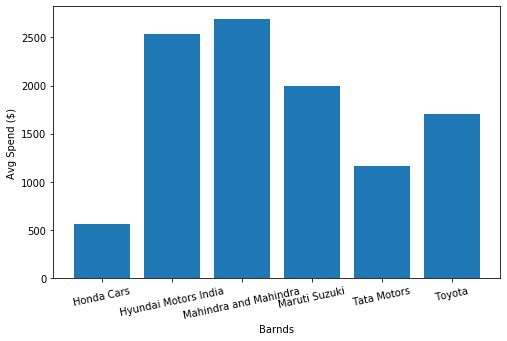

In [168]:
plt.figure(figsize=(8,5))
x=sca['Avg Spend ($)'].index
y=sca['Avg Spend ($)'].values
plt.xlabel('Barnds')
plt.xticks(rotation = 12)
plt.ylabel('Avg Spend ($)') 
plt.bar(x,y)

In [169]:
brands=data['Brand'].unique()
brands

array(['Honda Cars', 'Maruti Suzuki', 'Hyundai Motors India', 'Toyota',
       'Tata Motors', 'Mahindra and Mahindra'], dtype=object)

In [170]:
len(brands)

6

## Here, there are total 6 brands in this dataset, they are 'Honda Cars', 'Maruti Suzuki', 'Hyundai Motors India', 'Toyota', 'Tata Motors', 'Mahindra and Mahindra'

### Each, brand have several products

In [171]:
data.head(2)

Id          Brand               Product  Network Network Type     Show  Pod Position    Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month Day_Time Quarters
0  1000001     Honda Cars            Honda Jazz  N-10079        cable  S-16736             1  PRIME TIME        30       1.0        178               2         Sun           22  Northeast India 2021-01-10 22:19:08             Jan    Night       Q1
1  1000002  Maruti Suzuki  Maruti Suzuki Baleno  N-10096        cable  S-17450             3     WEEKEND        30       1.0        514               3         Sat           19  Northeast India 2021-01-16 19:28:13             Jan  Evening       Q1

In [172]:
def product_comapre(brand_name):
    df = data.loc[data['Brand']==brand_name,:]
    ss = df.pivot_table(values ='Spend ($)',index=['Product'],aggfunc='sum')
    cc = df.pivot_table(values ='Spend ($)',index=['Product'],aggfunc='count')
    cc.rename(columns = {'Spend ($)':'Count'}, inplace = True)
    aa=df.pivot_table(values ='Spend ($)',index=['Product'],aggfunc='mean')
    aa.rename(columns = {'Spend ($)':'Avg Spend ($)'}, inplace = True)
    aa['Avg Spend ($)']=round(aa['Avg Spend ($)'],2)
    xxx=pd.concat([ss,cc,aa], axis=1)
    yyy = xxx.copy()
    yyy['Spend ($) %'] = (100*yyy['Spend ($)'])/yyy['Spend ($)'].sum()
    yyy['Count %'] = (100*yyy['Count'])/yyy['Count'].sum()
    yyy = yyy[['Spend ($) %','Count %']]
    
    return xxx,yyy

In [173]:
def quarters_comapre(brand_name):
    df = data.loc[data['Brand']==brand_name,:]
    ss = df.pivot_table(values ='Spend ($)',index=['Quarters'],aggfunc='sum')
    cc = df.pivot_table(values ='Spend ($)',index=['Quarters'],aggfunc='count')
    cc.rename(columns = {'Spend ($)':'Count'}, inplace = True)
    aa=df.pivot_table(values ='Spend ($)',index=['Quarters'],aggfunc='mean')
    aa.rename(columns = {'Spend ($)':'Avg Spend ($)'}, inplace = True)
    aa['Avg Spend ($)']=round(aa['Avg Spend ($)'],2)
    ccc=pd.concat([ss,cc,aa], axis=1)
    ddd = ccc.copy()
    ddd['Spend ($) %'] = (100*ddd['Spend ($)'])/ddd['Spend ($)'].sum()
    ddd['Count %'] = (100*ddd['Count'])/ddd['Count'].sum()
    ddd = ddd[['Spend ($) %','Count %']]
    
    return ccc,ddd

In [174]:
def daypart_comapre(brand_name):
    df = data.loc[data['Brand']==brand_name,:]
    ss = df.pivot_table(values ='Spend ($)',index=['Dayparts'],aggfunc='sum')
    cc = df.pivot_table(values ='Spend ($)',index=['Dayparts'],aggfunc='count')
    cc.rename(columns = {'Spend ($)':'Count'}, inplace = True)
    aa=df.pivot_table(values ='Spend ($)',index=['Dayparts'],aggfunc='mean')
    aa.rename(columns = {'Spend ($)':'Avg Spend ($)'}, inplace = True)
    aa['Avg Spend ($)']=round(aa['Avg Spend ($)'],2)
    xxx=pd.concat([ss,cc,aa], axis=1)
    yyy = xxx.copy()
    yyy['Spend ($) %'] = (100*yyy['Spend ($)'])/yyy['Spend ($)'].sum()
    yyy['Count %'] = (100*yyy['Count'])/yyy['Count'].sum()
    yyy = yyy[['Spend ($) %','Count %']]
    
    return xxx,yyy

In [175]:
def timezone_comapre(brand_name):
    df = data.loc[data['Brand']==brand_name,:]
    ss = df.pivot_table(values ='Spend ($)',index=['TimeZone'],aggfunc='sum')
    cc = df.pivot_table(values ='Spend ($)',index=['TimeZone'],aggfunc='count')
    cc.rename(columns = {'Spend ($)':'Count'}, inplace = True)
    aa=df.pivot_table(values ='Spend ($)',index=['TimeZone'],aggfunc='mean')
    aa.rename(columns = {'Spend ($)':'Avg Spend ($)'}, inplace = True)
    aa['Avg Spend ($)']=round(aa['Avg Spend ($)'],2)
    xxx=pd.concat([ss,cc,aa], axis=1)
    yyy = xxx.copy()
    yyy['Spend ($) %'] = (100*yyy['Spend ($)'])/yyy['Spend ($)'].sum()
    yyy['Count %'] = (100*yyy['Count'])/yyy['Count'].sum()
    yyy = yyy[['Spend ($) %','Count %']]
    
    return xxx,yyy

In [176]:
def network_comapre(brand_name):
    df = data.loc[data['Brand']==brand_name,:]
    ss = df.pivot_table(values ='Spend ($)',index=['Network Type'],aggfunc='sum')
    cc = df.pivot_table(values ='Spend ($)',index=['Network Type'],aggfunc='count')
    cc.rename(columns = {'Spend ($)':'Count'}, inplace = True)
    aa=df.pivot_table(values ='Spend ($)',index=['Network Type'],aggfunc='mean')
    aa.rename(columns = {'Spend ($)':'Avg Spend ($)'}, inplace = True)
    aa['Avg Spend ($)']=round(aa['Avg Spend ($)'],2)
    xxx=pd.concat([ss,cc,aa], axis=1)
    yyy = xxx.copy()
    yyy['Spend ($) %'] = (100*yyy['Spend ($)'])/yyy['Spend ($)'].sum()
    yyy['Count %'] = (100*yyy['Count'])/yyy['Count'].sum()
    yyy = yyy[['Spend ($) %','Count %']]
    
    return xxx,yyy

In [177]:
def bar(df):
    x=df.index
    plt.figure(figsize=(22,120))
    for i in enumerate(df.columns):
        ax = plt.subplot(20,2, i[0]+1)
        y=df[i[1]]
        plt.xlabel(i[1])
        plt.xticks(rotation = 12) 
        plt.bar(x,y)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    height,
                    ha="center")

In [178]:
def pie(df):
    lab = df.index
    cols = df.columns
    plt.figure(figsize=(12,150))
    for i in enumerate(cols):
        val = df[i[1]].values
        ax = plt.subplot(15,2, i[0]+1)
        plt.pie(val, labels = lab,autopct='%1.2f%%')
        plt.title(i[1])
    plt.show()

## <u>`Honda Cars`

In [179]:
data.loc[data['Brand']=='Honda Cars',:]['Product'].unique()

array(['Honda Jazz', 'Honda Civiz', 'Honda City'], dtype=object)

In [180]:
len(data.loc[data['Brand']=='Honda Cars',:]['Product'].unique())

3

- #### Honda Cars has 3 products, they are 'Honda Jazz', 'Honda Civiz', 'Honda City'

In [181]:
data.loc[(data['Brand']=='Honda Cars') & (data['Pod Position']==1) & (data['Spend ($)']==0),:]

Id       Brand      Product  Network Network Type     Show  Pod Position       Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month        Day_Time Quarters
152716  1152717  Honda Cars  Honda Civiz  N-10130        cable  S-15994             1        DAYTIME        15       0.5          0              10         Fri           14  Northeast India 2021-03-05 14:16:03             Mar       Afternoon       Q1
177461  1177462  Honda Cars   Honda Jazz  N-10110        cable  S-12560             1  EARLY MORNING        30       1.0          0              12         Wed            6  Northeast India 2021-03-17 06:34:28             Mar  Early-morning        Q1

In [182]:
data.loc[(data['Brand']=='Honda Cars') & (data['Pod Position']==1) & (data['Spend ($)']==0),:].shape

(2, 19)

- #### ⬆️⬆️ Above 2 times Honda car's advertisements were at Pod position 1 without spending a singel penny.

In [183]:
sca

Spend ($)   Count  Avg Spend ($)  Max Spend ($)  Min Spend ($)
Brand                                                                                
Honda Cars              48258340   85265         565.98          72902              0
Hyundai Motors India   180808756   71296        2536.03        5500000              0
Mahindra and Mahindra  397305655  147890        2686.49         103048              0
Maruti Suzuki          558646472  280274        1993.22          91596              0
Tata Motors             94790227   81041        1169.66          83935              0
Toyota                 112653112   66018        1706.40          92140              0

In [184]:
data.loc[(data['Brand']=='Honda Cars') & (data['Spend ($)']==72902),:]

Id       Brand      Product  Network Network Type     Show  Pod Position   Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month   Day_Time Quarters
435901  1435902  Honda Cars  Honda Civiz  N-10002    broadcast  S-22388             1  OVERNIGHT        30       1.0      72902              29         Sun            3  Northeast India 2021-07-18 03:13:11             Jul  Mid-night       Q3

- #### ⬆️⬆️ Honda cars spend most for promoting `Honda Civiz`, on 18-07-2021 at Overnight show.

In [185]:
p=product_comapre('Honda Cars')
q=quarters_comapre('Honda Cars')
d=daypart_comapre('Honda Cars')
t=timezone_comapre('Honda Cars')
n=network_comapre('Honda Cars')

In [186]:
display_side_by_side(p[0],p[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Product 
 
 
 
 
 
 
 
 Honda City 
 59051 
 56 
 1054.48 
 
 
 Honda Civiz 
 34777159 
 58877 
 590.67 
 
 
 Honda Jazz 
 13422130 
 26332 
 509.73 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Product 
 
 
 
 
 
 
 Honda City 
 0.122364 
 0.065678 
 
 
 Honda Civiz 
 72.064557 
 69.051780 
 
 
 Honda Jazz 
 27.813079 
 30.882543

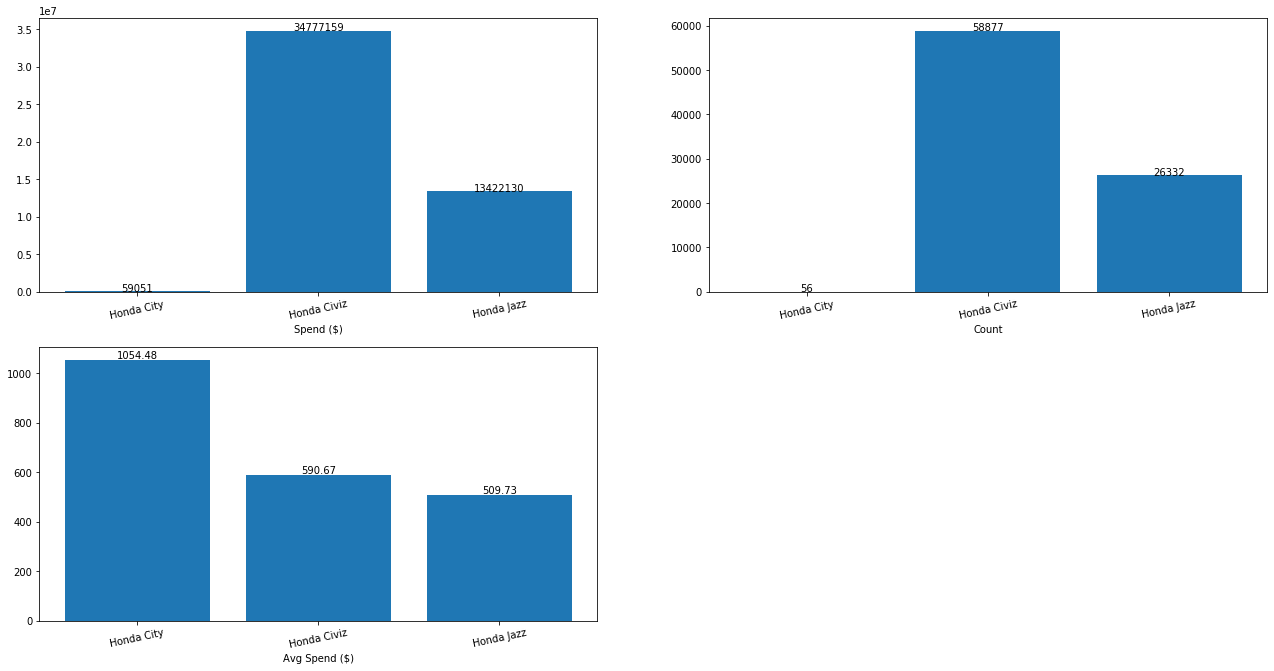

In [187]:
bar(p[0])

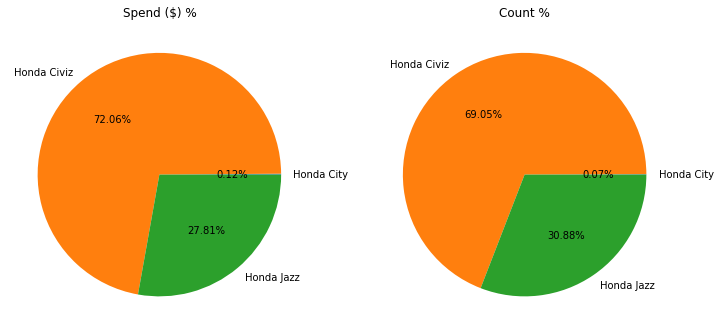

In [188]:
pie(p[1])

### `Products:`
- #### Out of total advertisements ran by Honda cars brand, nearly 70% of Advs were for the promotion of Honda Civiz, also out of total budget 72% was spend for this product.
- #### Though, the brand ran only 56 advs for the promotion of Honda City, but the average spend per adv is 1054, which is heighest among other products.

In [189]:
display_side_by_side(q[0],q[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Quarters 
 
 
 
 
 
 
 
 Q1 
 16963778 
 25929 
 654.24 
 
 
 Q2 
 9549604 
 19388 
 492.55 
 
 
 Q3 
 12073060 
 23020 
 524.46 
 
 
 Q4 
 9671898 
 16928 
 571.36 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Quarters 
 
 
 
 
 
 
 Q1 
 35.152013 
 30.409899 
 
 
 Q2 
 19.788505 
 22.738521 
 
 
 Q3 
 25.017562 
 26.998182 
 
 
 Q4 
 20.041920 
 19.853398

In [190]:
data.loc[(data['Spend ($)']==5500000)  ,['Brand','Product','Spend ($)','Pod Position','Quarters','Broadcast Month']]


Brand      Product  Spend ($)  Pod Position Quarters Broadcast Month
93821  Hyundai Motors India  Hyundai I20    5500000             4       Q1             Feb

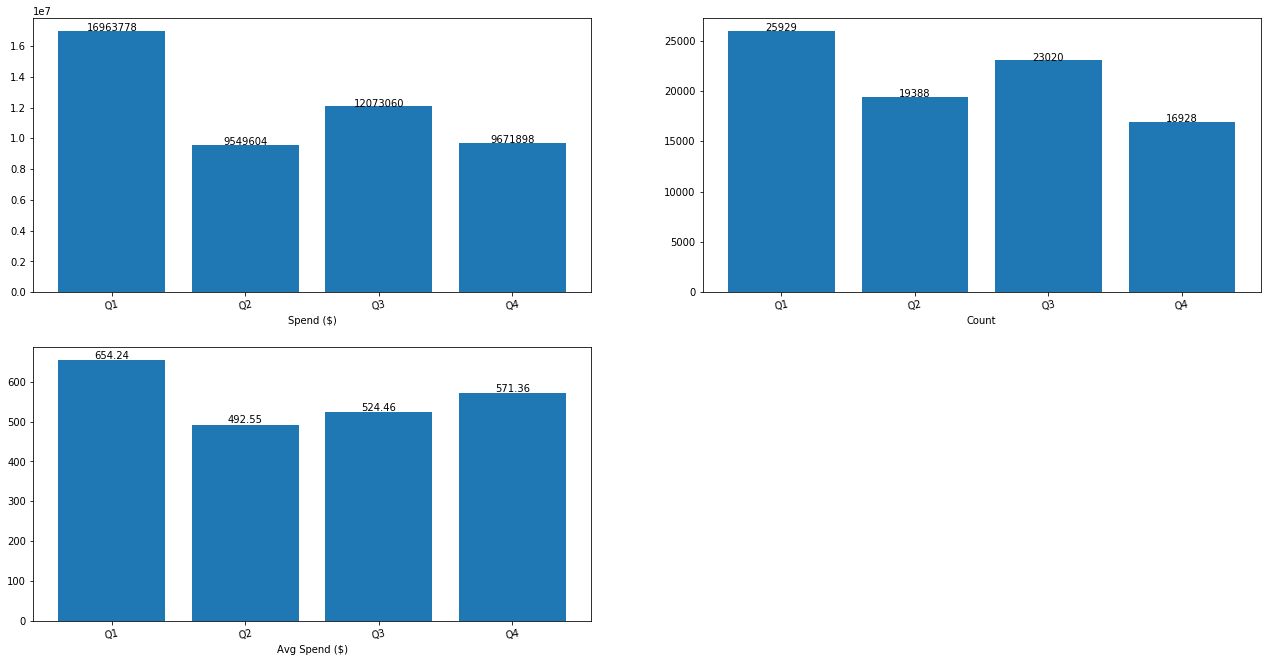

In [191]:
bar(q[0])


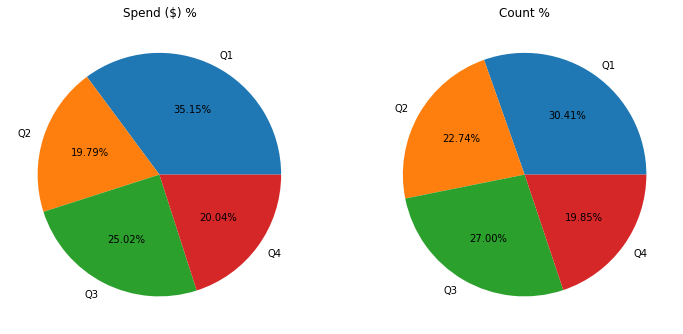

In [192]:
pie(q[1])



### `Quarters:`
- #### During the Q1, Honda Car ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.


In [193]:
display_side_by_side(d[0],d[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Dayparts 
 
 
 
 
 
 
 
 DAYTIME 
 15106799 
 28031 
 538.93 
 
 
 EARLY FRINGE 
 5763471 
 7056 
 816.82 
 
 
 EARLY MORNING 
 5190376 
 14877 
 348.89 
 
 
 EVENING NEWS 
 2105762 
 3067 
 686.59 
 
 
 LATE FRINGE 
 3421197 
 6168 
 554.67 
 
 
 OVERNIGHT 
 2820096 
 5714 
 493.54 
 
 
 PRIME ACCESS 
 1352961 
 1903 
 710.96 
 
 
 PRIME TIME 
 7002902 
 8391 
 834.57 
 
 
 WEEKEND 
 5494776 
 10058 
 546.31 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Dayparts 
 
 
 
 
 
 
 DAYTIME 
 31.304017 
 32.875154 
 
 
 EARLY FRINGE 
 11.942953 
 8.275377 
 
 
 EARLY MORNING 
 10.755397 
 17.447956 
 
 
 EVENING NEWS 
 4.363519 
 3.597021 
 
 
 LATE FRINGE 
 7.089338 
 7.233918 
 
 
 OVERNIGHT 
 5.843748 
 6.701460 
 
 
 PRIME ACCESS 
 2.803580 
 2.231865 
 
 
 PRIME TIME 
 14.511278 
 9.841084 
 
 
 WEEKEND 
 11.386169 
 11.796165

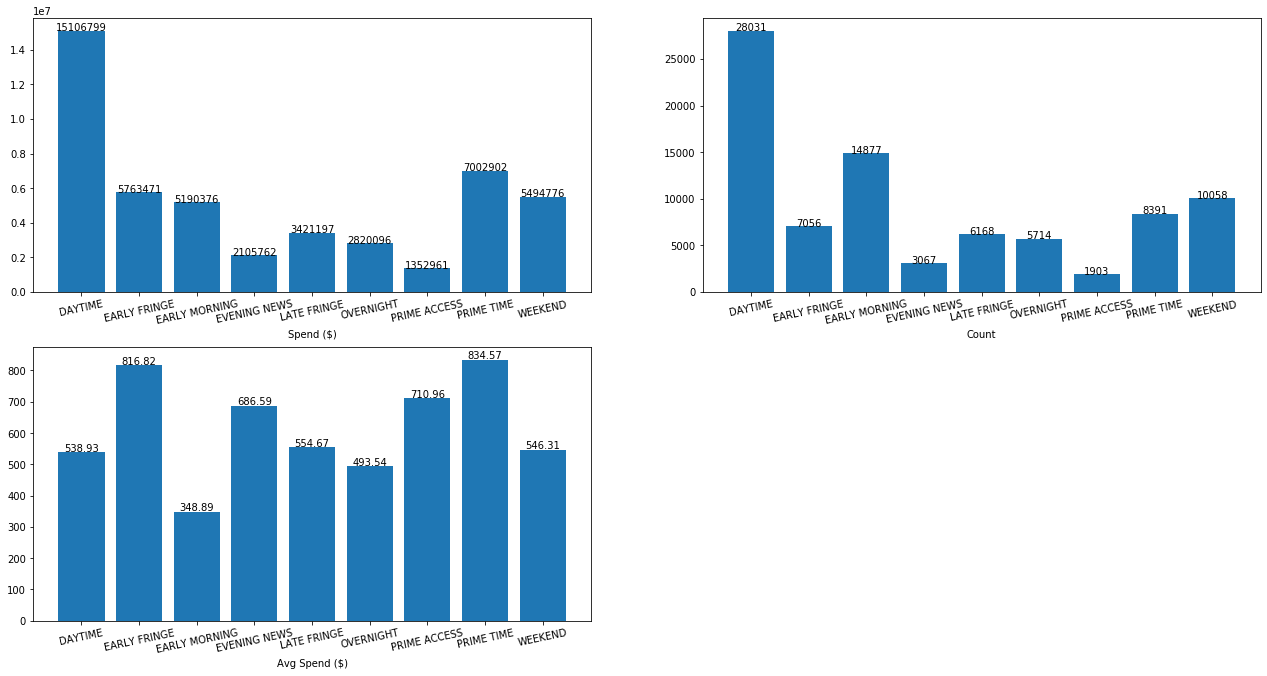

In [194]:
bar(d[0])


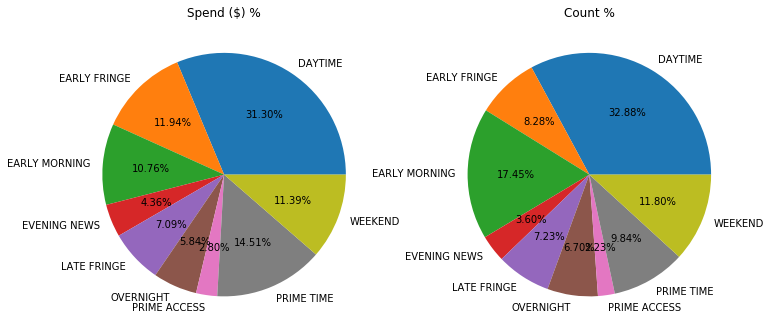

In [195]:
pie(d[1])


### `Dayparts:`
- #### Honda car prefer to run their advs during the Daytime, Weekend, Primetime and Early-morning shows.
- #### For the Daytime show, Honda car spend 31.30% of it's budget, and for the weekend show 11.39%, for the primetime show 14.51% & for the early-fringe show 11.94%.

In [196]:
display_side_by_side(t[0],t[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 TimeZone 
 
 
 
 
 
 
 
 Central India 
 56458 
 156 
 361.91 
 
 
 Northeast India 
 46729376 
 83236 
 561.41 
 
 
 Northern India 
 1045 
 5 
 209.00 
 
 
 Southern India 
 1471461 
 1868 
 787.72 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 TimeZone 
 
 
 
 
 
 
 Central India 
 0.116991 
 0.182959 
 
 
 Northeast India 
 96.831710 
 97.620360 
 
 
 Northern India 
 0.002165 
 0.005864 
 
 
 Southern India 
 3.049133 
 2.190817

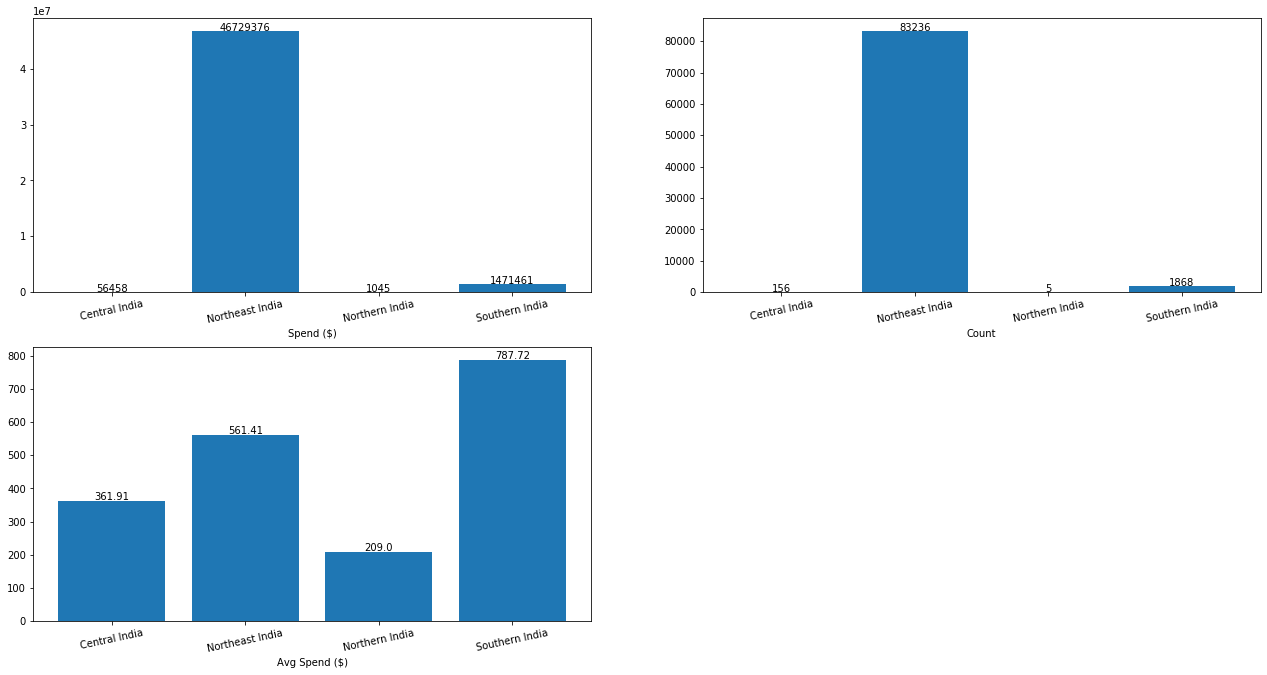

In [197]:
bar(t[0])

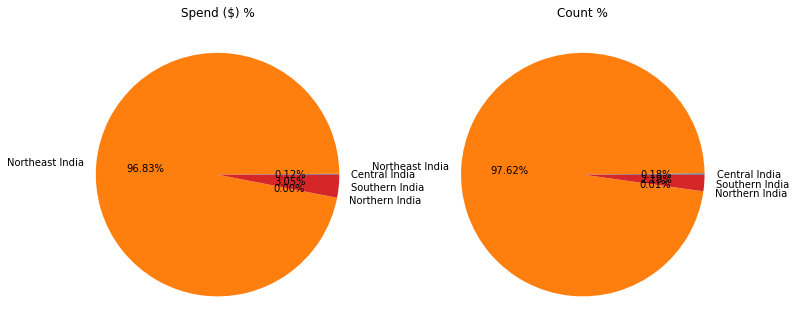

In [198]:
pie(t[1])


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 97% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Southern India timezone is higher than other timezones.


In [199]:
display_side_by_side(n[0],n[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Network Type 
 
 
 
 
 
 
 
 broadcast 
 14835303 
 10611 
 1398.11 
 
 
 cable 
 33423037 
 74654 
 447.71 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Network Type 
 
 
 
 
 
 
 broadcast 
 30.741428 
 12.444731 
 
 
 cable 
 69.258572 
 87.555269

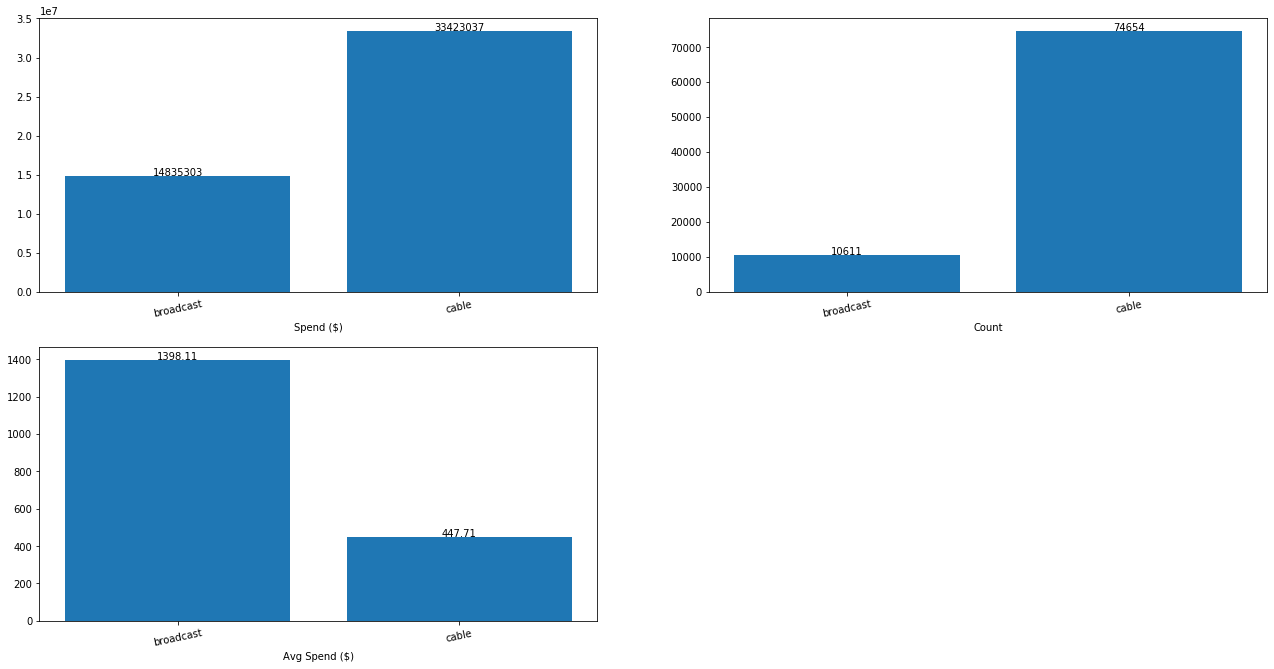

In [200]:
bar(n[0])

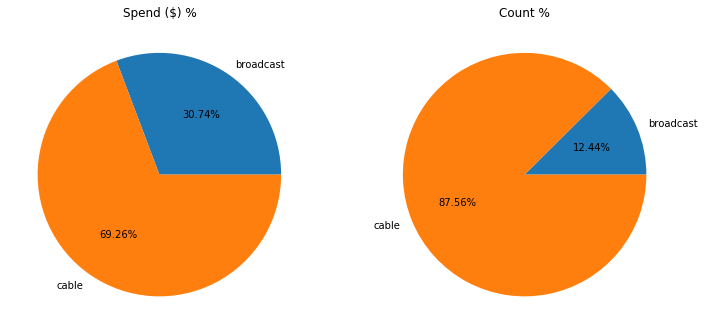

In [201]:
pie(n[1])

### `Network:`
- #### 88% of the Advs were ran on the Cable network, and 70% of the budget were allocated for this network.
- #### The average spendon the Broadcast network is higher than the cable network.

### `Products:`
- #### Honda Cars has 3 products, they are 'Honda Jazz', 'Honda Civiz', 'Honda City'
- ####  2 times Honda car's advertisements were at Pod position 1 without spending a singel penny.
- #### Honda cars spend most for promoting `Honda Civiz`, on 18-07-2021 at Overnight show.
- #### Out of total advertisements ran by Honda cars brand, nearly 70% of Advs were for the promotion of Honda Civiz, also out of total budget 72% was spend for this product.
- #### Though, the brand ran only 56 advs for the promotion of Honda City, but the average spend per adv is 1054, which is heighest among other products.


### `Quarters:`
- #### During the Q1, Honda Car ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.

### `Dayparts:`
- #### Honda car prefer to run their advs during the Daytime, Weekend, Primetime and Early-morning shows.
- #### For the Daytime show, Honda car spend 31.30% of it's budget, and for the weekend show 11.39%, for the primetime show 14.51% & for the early-fringe show 11.94%.

### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 97% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Southern India timezone is higher than other timezones.

### `Network:`
- #### 88% of the Advs were ran on the Cable network, and 70% of the budget were allocated for this network.
- #### The average spendon the Broadcast network is higher than the cable network.

## <u>`Maruti Suzuki`

In [202]:
data.loc[data['Brand']=='Maruti Suzuki',:]['Product'].unique()

array(['Maruti Suzuki Baleno', 'Maruti Suzuki Ciaz',
       'Maruti Suzuki WagonR', 'Maruti Suzuki Ertiga',
       'Maruti Suzuki Swift', 'Maruti Suzuki Ignis',
       'Maruti Suzuki Celerio'], dtype=object)

In [203]:
len(data.loc[data['Brand']=='Maruti Suzuki',:]['Product'].unique())

7

- #### Maruti Suzuki has 7 products, they are 'Maruti Suzuki Baleno', 'Maruti Suzuki Ciaz','Maruti Suzuki WagonR', 'Maruti Suzuki Ertiga','Maruti Suzuki Swift', 'Maruti Suzuki Ignis','Maruti Suzuki Celerio'

In [204]:
data.loc[(data['Brand']=='Maruti Suzuki') & (data['Pod Position']==1) & (data['Spend ($)']==0),:]

Id          Brand               Product  Network Network Type     Show  Pod Position       Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month        Day_Time Quarters
243669  1243670  Maruti Suzuki    Maruti Suzuki Ciaz  N-10028    broadcast  S-16527             1     PRIME TIME        30      1.00          0              17        Tues           21    Central India 2021-04-20 21:54:46             Apr           Night       Q2
246398  1246399  Maruti Suzuki    Maruti Suzuki Ciaz  N-10028    broadcast  S-16527             1  EARLY MORNING        30      1.00          0              16         Sun            8    Central India 2021-04-18 08:54:51             Apr  Early-morning        Q2
257927  1257928  Maruti Suzuki    Maruti Suzuki Ciaz  N-10090        cable  S-21506             1        DAYTIME        30      1.00          0              18         Fri           12   Southern India 2021-04-30 12:57:18             Apr       Afternoon       Q2
272153  1272154  Maruti Suzuki    Maruti Suzuki Ciaz  N-10090        cable  S-14276             1    LATE FRINGE        30      1.00          0              18         Sun           23   Southern India 2021-05-02 23:56:47             May           Night       Q2
311111  1311112  Maruti Suzuki  Maruti Suzuki Baleno  N-10028    broadcast  S-17768             1        WEEKEND        30      1.00          0              21         Sun           10    Central India 2021-05-23 10:21:07             May         Morning       Q2
313268  1313269  Maruti Suzuki  Maruti Suzuki Baleno  N-10028    broadcast  S-17625             1        WEEKEND        30      1.00          0              21         Sun           10    Central India 2021-05-23 10:54:09             May         Morning       Q2
329942  1329943  Maruti Suzuki  Maruti Suzuki Baleno  N-10028    broadcast  S-16527             1     PRIME TIME        30      1.00          0              24        Tues           21    Central India 2021-06-08 21:37:12             Jun           Night       Q2
352734  1352735  Maruti Suzuki  Maruti Suzuki Baleno  N-10090        cable  S-10956             1     PRIME TIME        30      1.00          0              23         Wed           22   Southern India 2021-06-02 22:31:49             Jun           Night       Q2
363771  1363772  Maruti Suzuki    Maruti Suzuki Ciaz  N-10090        cable  S-14276             1    LATE FRINGE        30      1.00          0              24         Sun           23   Southern India 2021-06-13 23:18:51             Jun           Night       Q2
367697  1367698  Maruti Suzuki    Maruti Suzuki Ciaz  N-10090        cable  S-14276             1    LATE FRINGE        30      1.00          0              24         Fri           23   Southern India 2021-06-11 23:38:06             Jun           Night       Q2
370349  1370350  Maruti Suzuki    Maruti Suzuki Ciaz  N-10090        cable  S-18354             1     PRIME TIME        30      1.00          0              26         Wed           20   Southern India 2021-06-23 20:35:53             Jun         Evening       Q2
389077  1389078  Maruti Suzuki    Maruti Suzuki Ciaz  N-10090        cable  S-19201             1        DAYTIME        30      1.00          0              25         Mon           12   Southern India 2021-06-14 12:57:02             Jun       Afternoon       Q2
395162  1395163  Maruti Suzuki    Maruti Suzuki Ciaz  N-10090        cable  S-14276             1        DAYTIME        30      1.00          0              27         Fri           15   Southern India 2021-07-02 15:23:49             Jul       Afternoon       Q3
399266  1399267  Maruti Suzuki    Maruti Suzuki Ciaz  N-10090        cable  S-14278             1        DAYTIME        30      1.00          0              28         Mon           14   Southern India 2021-07-05 14:16:01             Jul       Afternoon       Q3
403507  1403508  Maruti Suzuki    Maruti Suzuki Ciaz  N-10090       

In [205]:
data.loc[(data['Brand']=='Maruti Suzuki') & (data['Pod Position']==1) & (data['Spend ($)']==0),:].shape

(282, 19)

- #### ⬆️⬆️ Above 282 times Maruti Suzuki's advertisements were at Pod position 1 without spending a singel penny.

In [206]:
sca

Spend ($)   Count  Avg Spend ($)  Max Spend ($)  Min Spend ($)
Brand                                                                                
Honda Cars              48258340   85265         565.98          72902              0
Hyundai Motors India   180808756   71296        2536.03        5500000              0
Mahindra and Mahindra  397305655  147890        2686.49         103048              0
Maruti Suzuki          558646472  280274        1993.22          91596              0
Tata Motors             94790227   81041        1169.66          83935              0
Toyota                 112653112   66018        1706.40          92140              0

In [207]:
data.loc[(data['Brand']=='Maruti Suzuki') & (data['Spend ($)']==91596),:]

Id          Brand               Product  Network Network Type     Show  Pod Position    Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month Day_Time Quarters
691500  1691501  Maruti Suzuki  Maruti Suzuki Baleno  N-10002    broadcast  S-16062             2  PRIME TIME        30       1.0      91596              50        Tues           20  Northeast India 2021-12-07 20:42:48             Dec  Evening       Q4

- #### ⬆️⬆️ Maruti Suzuki spend most for promoting `Maruti Suzuki Baleno`, on 07-12-2021 at PRIME TIME show.

In [208]:
p=product_comapre('Maruti Suzuki')
q=quarters_comapre('Maruti Suzuki')
d=daypart_comapre('Maruti Suzuki')
t=timezone_comapre('Maruti Suzuki')
n=network_comapre('Maruti Suzuki')

In [209]:
display_side_by_side(p[0],p[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Product 
 
 
 
 
 
 
 
 Maruti Suzuki Baleno 
 332492531 
 161393 
 2060.14 
 
 
 Maruti Suzuki Celerio 
 104075 
 33 
 3153.79 
 
 
 Maruti Suzuki Ciaz 
 199405767 
 102799 
 1939.76 
 
 
 Maruti Suzuki Ertiga 
 4038393 
 2558 
 1578.73 
 
 
 Maruti Suzuki Ignis 
 35283 
 39 
 904.69 
 
 
 Maruti Suzuki Swift 
 15347 
 133 
 115.39 
 
 
 Maruti Suzuki WagonR 
 22555076 
 13319 
 1693.45 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Product 
 
 
 
 
 
 
 Maruti Suzuki Baleno 
 59.517521 
 57.584007 
 
 
 Maruti Suzuki Celerio 
 0.018630 
 0.011774 
 
 
 Maruti Suzuki Ciaz 
 35.694447 
 36.678036 
 
 
 Maruti Suzuki Ertiga 
 0.722889 
 0.912678 
 
 
 Maruti Suzuki Ignis 
 0.006316 
 0.013915 
 
 
 Maruti Suzuki Swift 
 0.002747 
 0.047454 
 
 
 Maruti Suzuki WagonR 
 4.037451 
 4.752135

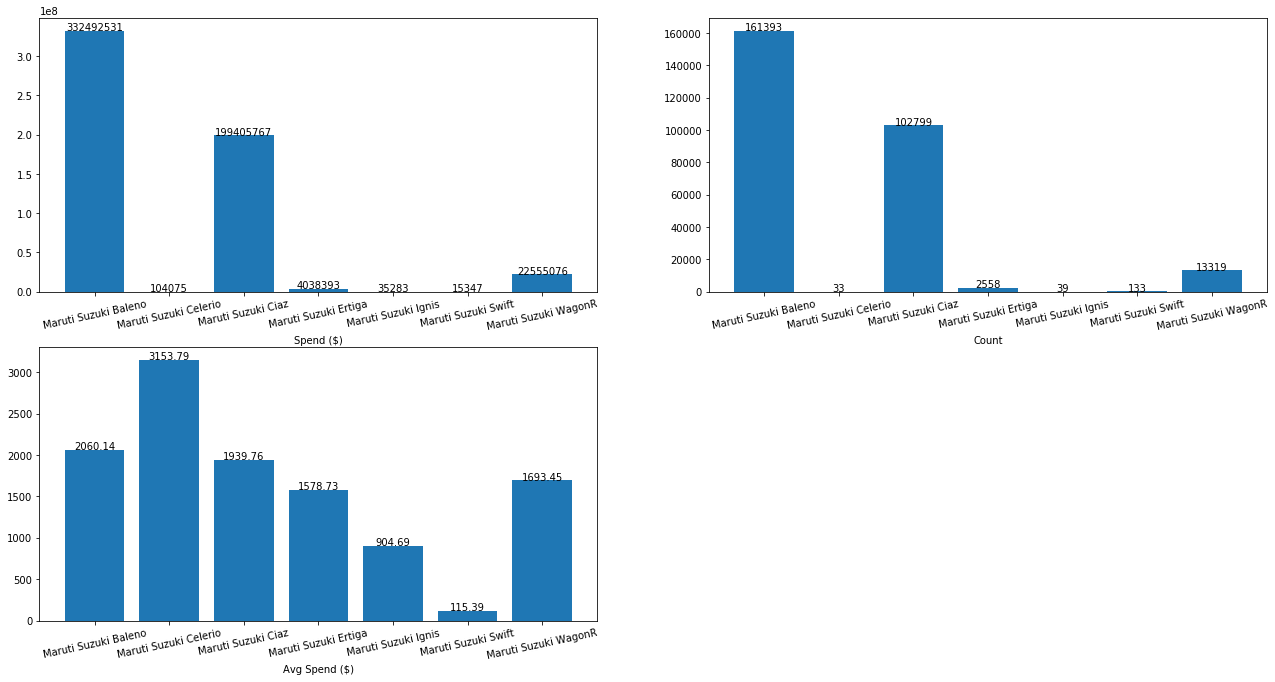

In [210]:
bar(p[0])

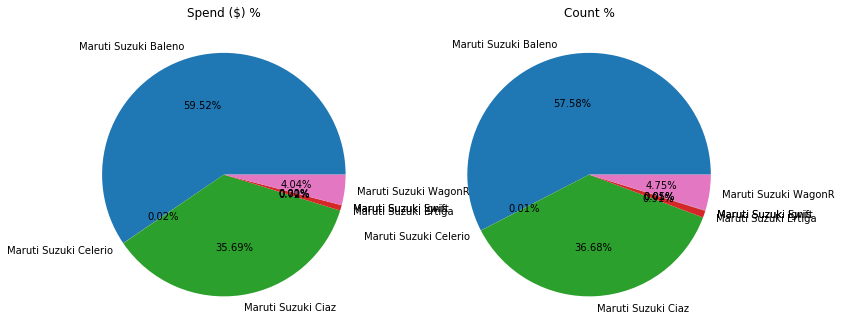

In [211]:
pie(p[1])

### `Products:`
- #### Out of total advertisements ran by Maruti Suzuki brand, nearly 58% of Advs were for the promotion of Baleno, and out of total budget 60 was spend for this product.
- #### Out of total advertisements ran by Maruti Suzuki brand, 37% of Advs were for the promotion of Ciaz, and out of total budget 36% was spend for this product.
- #### The brand ran only 33 advs for the promotion of celerio.

In [212]:
display_side_by_side(q[0],q[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Quarters 
 
 
 
 
 
 
 
 Q1 
 183019481 
 82381 
 2221.62 
 
 
 Q2 
 129229242 
 71695 
 1802.49 
 
 
 Q3 
 124833119 
 66196 
 1885.81 
 
 
 Q4 
 121564630 
 60002 
 2026.01 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Quarters 
 
 
 
 
 
 
 Q1 
 32.761235 
 29.393023 
 
 
 Q2 
 23.132562 
 25.580325 
 
 
 Q3 
 22.345638 
 23.618316 
 
 
 Q4 
 21.760565 
 21.408336

In [213]:
data.loc[(data['Spend ($)']==5500000)  ,['Brand','Product','Spend ($)','Pod Position','Quarters','Broadcast Month']]

Brand      Product  Spend ($)  Pod Position Quarters Broadcast Month
93821  Hyundai Motors India  Hyundai I20    5500000             4       Q1             Feb

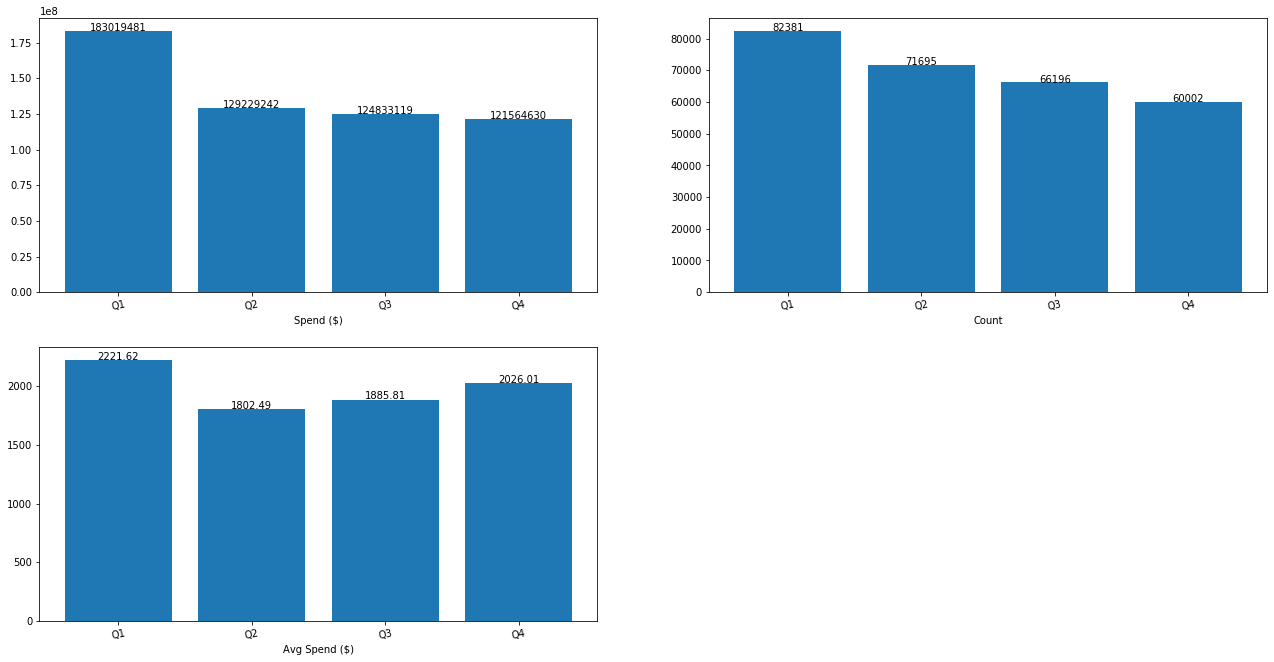

In [214]:
bar(q[0])

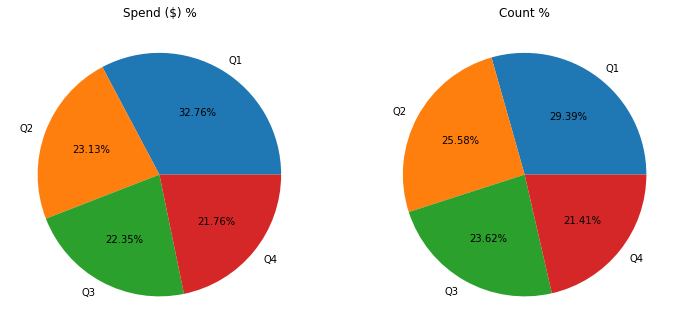

In [215]:
pie(q[1])


### `Quarters:`
- #### During the Q1, Maruti Suziki ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.
- #### During Q4, the average spend on Advs were bit increased.


In [216]:
display_side_by_side(d[0],d[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Dayparts 
 
 
 
 
 
 
 
 DAYTIME 
 48678486 
 49811 
 977.26 
 
 
 EARLY FRINGE 
 22745305 
 17124 
 1328.27 
 
 
 EARLY MORNING 
 28920899 
 35078 
 824.47 
 
 
 EVENING NEWS 
 20776891 
 9968 
 2084.36 
 
 
 LATE FRINGE 
 74069950 
 45224 
 1637.85 
 
 
 OVERNIGHT 
 23614157 
 27224 
 867.40 
 
 
 PRIME ACCESS 
 29021227 
 9473 
 3063.57 
 
 
 PRIME TIME 
 213609797 
 47738 
 4474.63 
 
 
 WEEKEND 
 97209760 
 38634 
 2516.17 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Dayparts 
 
 
 
 
 
 
 DAYTIME 
 8.713648 
 17.772251 
 
 
 EARLY FRINGE 
 4.071502 
 6.109735 
 
 
 EARLY MORNING 
 5.176959 
 12.515610 
 
 
 EVENING NEWS 
 3.719148 
 3.556520 
 
 
 LATE FRINGE 
 13.258824 
 16.135639 
 
 
 OVERNIGHT 
 4.227031 
 9.713352 
 
 
 PRIME ACCESS 
 5.194918 
 3.379907 
 
 
 PRIME TIME 
 38.237026 
 17.032618 
 
 
 WEEKEND 
 17.400944 
 13.784368

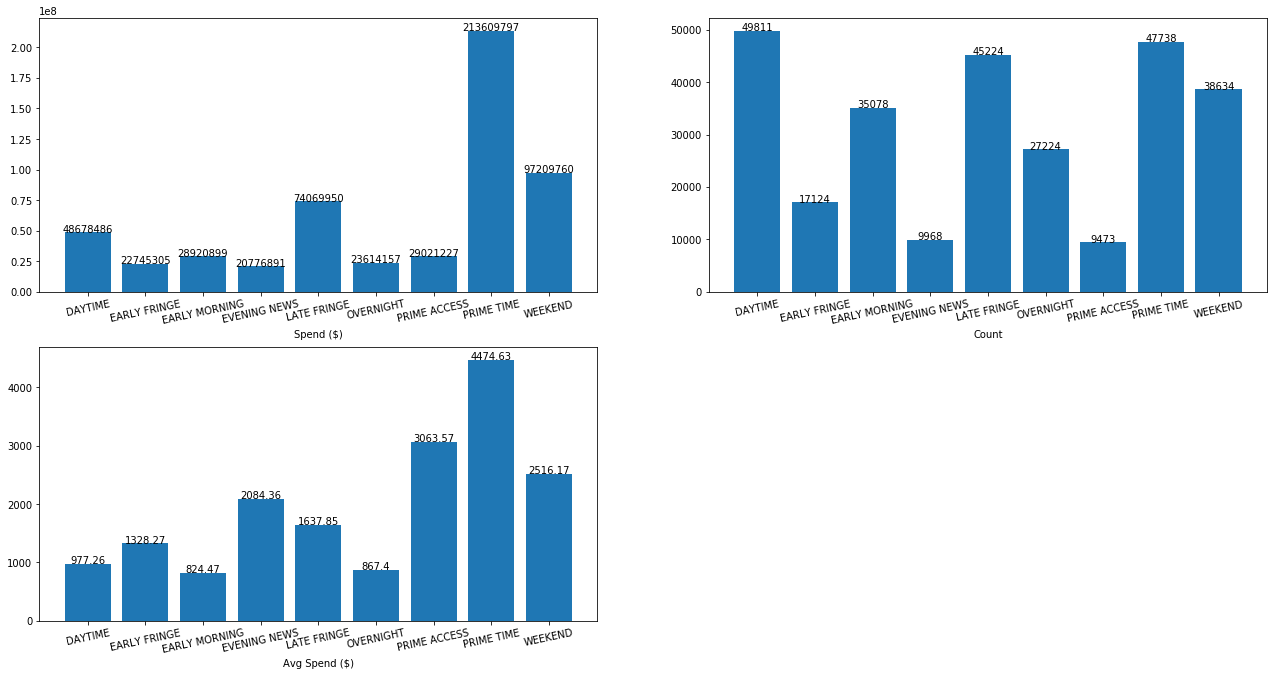

In [217]:
bar(d[0])

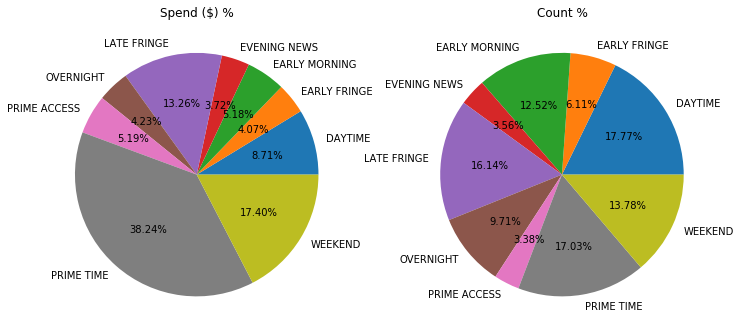

In [218]:
pie(d[1])

### `Dayparts:`
- #### Maruti Suzuki prefer to run their advs during the Daytime, Weekend, Primetime and Early-morning shows.
- #### For the primetime show, Honda car spend 38% of it's budget, and for the weekend show 17%.

In [219]:
display_side_by_side(t[0],t[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 TimeZone 
 
 
 
 
 
 
 
 Central India 
 1836696 
 1316 
 1395.67 
 
 
 Northeast India 
 509718664 
 269674 
 1890.13 
 
 
 Northern India 
 395195 
 41 
 9638.90 
 
 
 Southern India 
 46695917 
 9243 
 5052.03 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 TimeZone 
 
 
 
 
 
 
 Central India 
 0.328776 
 0.469541 
 
 
 Northeast India 
 91.241723 
 96.217987 
 
 
 Northern India 
 0.070742 
 0.014629 
 
 
 Southern India 
 8.358760 
 3.297844

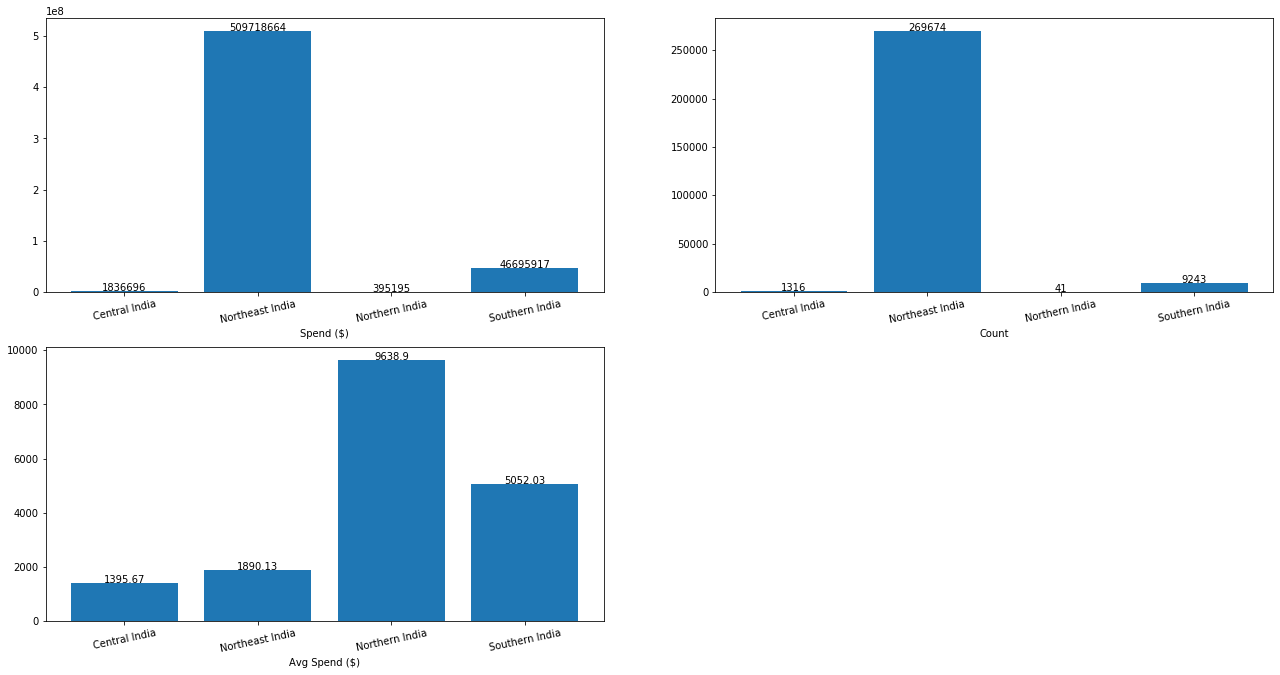

In [220]:
bar(t[0])

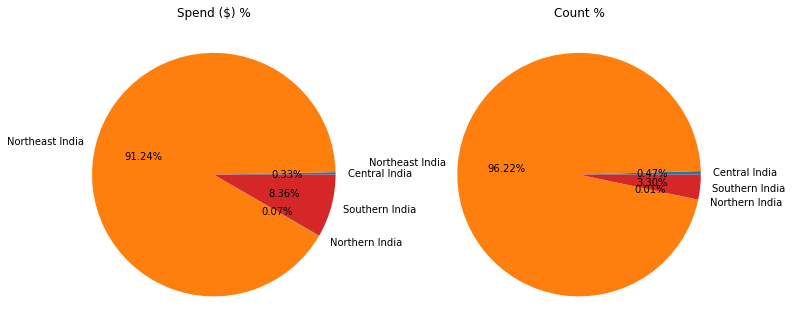

In [221]:
pie(t[1])


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 91% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern India timezone is higher than other timezones.


In [222]:
display_side_by_side(n[0],n[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Network Type 
 
 
 
 
 
 
 
 broadcast 
 239190273 
 23160 
 10327.73 
 
 
 cable 
 319456199 
 257114 
 1242.47 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Network Type 
 
 
 
 
 
 
 broadcast 
 42.816036 
 8.263342 
 
 
 cable 
 57.183964 
 91.736658

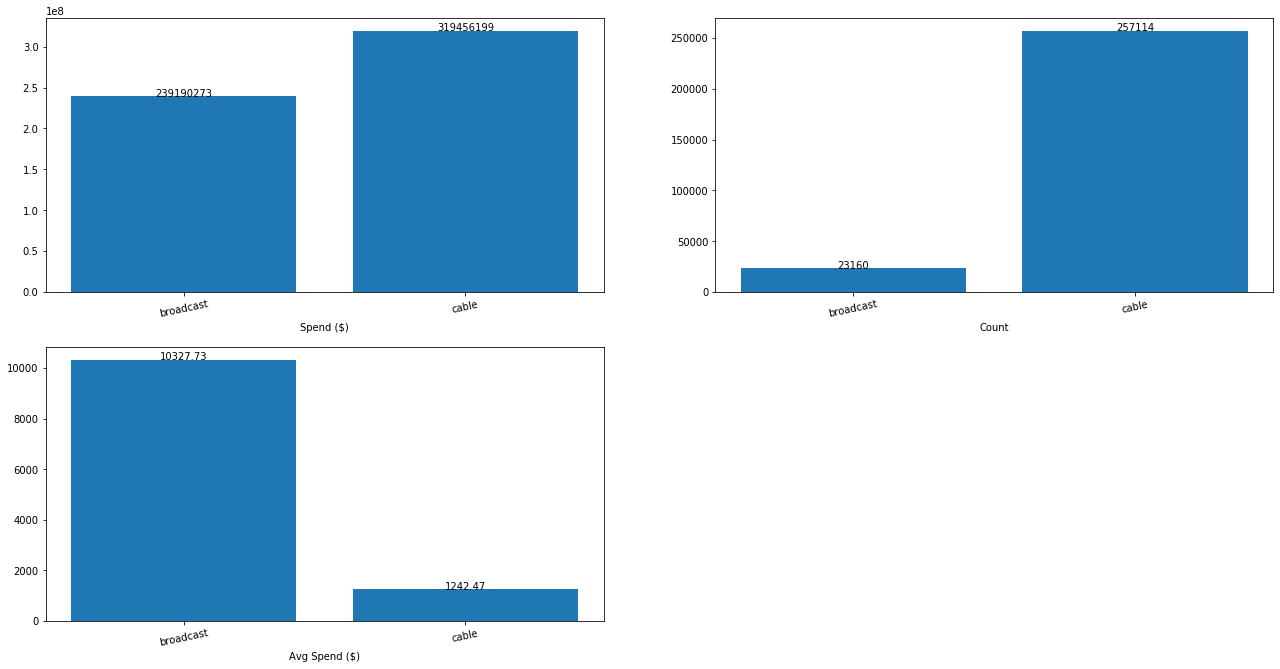

In [223]:
bar(n[0])

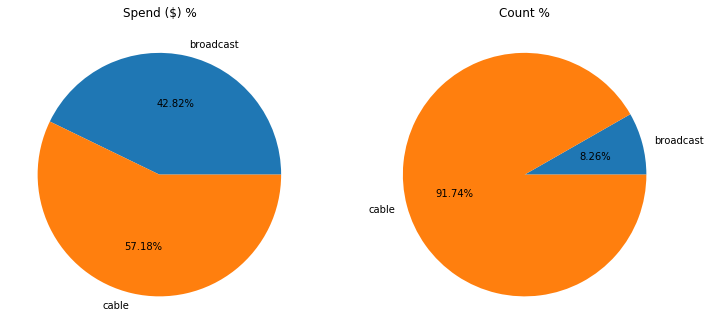

In [224]:
pie(n[1])

### `Network:`
- #### 92% of the Advs were ran on the Cable network, and 57% of the budget were allocated for this network.
- #### Though the spend on the cable network is bit higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

### `Products:`
- #### Maruti Suzuki has 7 products, they are 'Maruti Suzuki Baleno', 'Maruti Suzuki Ciaz','Maruti Suzuki WagonR', 'Maruti Suzuki Ertiga','Maruti Suzuki Swift', 'Maruti Suzuki Ignis','Maruti Suzuki Celerio'
- ####  282 times Maruti Suzuki's advertisements were at Pod position 1 without spending a singel penny.
- #### Maruti Suzuki spend most for promoting `Maruti Suzuki Baleno`, on 07-12-2021 at PRIME TIME show.
- #### Out of total advertisements ran by Maruti Suzuki brand, nearly 58% of Advs were for the promotion of Baleno, and out of total budget 60 was spend for this product.
- #### Out of total advertisements ran by Maruti Suzuki brand, 37% of Advs were for the promotion of Ciaz, and out of total budget 36% was spend for this product.
- #### The brand ran only 33 advs for the promotion of celerio.


### `Quarters:`
- #### During the Q1, Maruti Suziki ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.
- #### During Q4, the average spend on Advs were bit increased.


### `Dayparts:`
- #### Maruti Suzuki prefer to run their advs during the Daytime, Weekend, Primetime and Early-morning shows.
- #### For the primetime show, Honda car spend 38% of it's budget, and for the weekend show 17%.


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 91% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern India timezone is higher than other timezones.


### `Network:`
- #### 92% of the Advs were ran on the Cable network, and 57% of the budget were allocated for this network.
- #### Though the spend on the cable network is bit higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

## <u>`Hyundai Motors India`

In [225]:
data.loc[data['Brand']=='Hyundai Motors India',:]['Product'].unique()

array(['Hyundai I20'], dtype=object)

In [226]:
len(data.loc[data['Brand']=='Hyundai Motors India',:]['Product'].unique())

1

- #### Hyundai Motors India has 1 product, it is 'Hyundai I20'

In [227]:
data.loc[(data['Brand']=='Hyundai Motors India') & (data['Pod Position']==1) & (data['Spend ($)']==0),:]

Id                 Brand      Product  Network Network Type     Show  Pod Position      Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month   Day_Time Quarters
367601  1367602  Hyundai Motors India  Hyundai I20  N-10090        cable  S-14278             1  EVENING NEWS        30       1.0          0              25         Fri           18   Southern India 2021-06-18 18:39:29             Jun    Evening       Q2
409738  1409739  Hyundai Motors India  Hyundai I20  N-10102        cable  S-15356             1       WEEKEND        15       0.5          0              26         Sun           13  Northeast India 2021-06-27 13:14:12             Jun  Afternoon       Q2
456791  1456792  Hyundai Motors India  Hyundai I20  N-10090        cable  S-18491             1       WEEKEND        30       1.0          0              29         Sun           16   Southern India 2021-07-18 16:03:00             Jul  Afternoon       Q3
511019  1511020  Hyundai Motors India  Hyundai I20  N-10090        cable  S-14276             1     OVERNIGHT        30       1.0          0              35         Wed            4   Southern India 2021-08-25 04:57:47             Aug  Mid-night       Q3
641860  1641861  Hyundai Motors India  Hyundai I20  N-10050        cable  S-12560             1   LATE FRINGE        30       1.0          0              45         Sun            1  Northeast India 2021-11-07 01:46:27             Nov  Mid-night       Q4
649343  1649344  Hyundai Motors India  Hyundai I20  N-10014        cable  S-20263             1   LATE FRINGE        15       0.5          0              45         Sun            1  Northeast India 2021-11-07 01:20:45             Nov  Mid-night       Q4
656525  1656526  Hyundai Motors India  Hyundai I20  N-10014        cable  S-20263             1   LATE FRINGE        15       0.5          0              45         Sun            1  Northeast India 2021-11-07 01:45:01             Nov  Mid-night       Q4

In [228]:
data.loc[(data['Brand']=='Hyundai Motors India') & (data['Pod Position']==1) & (data['Spend ($)']==0),:].shape

(7, 19)

- #### ⬆️⬆️ Above 7 times Hyundai Motors India's advertisements were at Pod position 1 without spending a singel penny.

In [229]:
sca

Spend ($)   Count  Avg Spend ($)  Max Spend ($)  Min Spend ($)
Brand                                                                                
Honda Cars              48258340   85265         565.98          72902              0
Hyundai Motors India   180808756   71296        2536.03        5500000              0
Mahindra and Mahindra  397305655  147890        2686.49         103048              0
Maruti Suzuki          558646472  280274        1993.22          91596              0
Tata Motors             94790227   81041        1169.66          83935              0
Toyota                 112653112   66018        1706.40          92140              0

In [230]:
data.loc[(data['Brand']=='Hyundai Motors India') & (data['Spend ($)']==5500000),:]

Id                 Brand      Product  Network Network Type     Show  Pod Position    Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month Day_Time Quarters
93821  1093822  Hyundai Motors India  Hyundai I20  N-10020    broadcast  S-19607             4  PRIME TIME        30       1.0    5500000               6         Sun           19  Northeast India 2021-02-07 19:18:52             Feb  Evening       Q1

- #### ⬆️⬆️ Hyundai Motors India spend most for promoting `Hyundai I20`, on 07-02-2021 at PRIME TIME show.

In [231]:
p=product_comapre('Hyundai Motors India')
q=quarters_comapre('Hyundai Motors India')
d=daypart_comapre('Hyundai Motors India')
t=timezone_comapre('Hyundai Motors India')
n=network_comapre('Hyundai Motors India')

In [232]:
display_side_by_side(q[0],q[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Quarters 
 
 
 
 
 
 
 
 Q1 
 62470842 
 22396 
 2789.37 
 
 
 Q2 
 40830200 
 18623 
 2192.46 
 
 
 Q3 
 38727107 
 16484 
 2349.38 
 
 
 Q4 
 38780607 
 13793 
 2811.62 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Quarters 
 
 
 
 
 
 
 Q1 
 34.550784 
 31.412702 
 
 
 Q2 
 22.581982 
 26.120680 
 
 
 Q3 
 21.418823 
 23.120512 
 
 
 Q4 
 21.448412 
 19.346106

In [233]:
data.loc[(data['Spend ($)']==5500000)  ,['Brand','Product','Spend ($)','Pod Position','Quarters','Broadcast Month']]


Brand      Product  Spend ($)  Pod Position Quarters Broadcast Month
93821  Hyundai Motors India  Hyundai I20    5500000             4       Q1             Feb

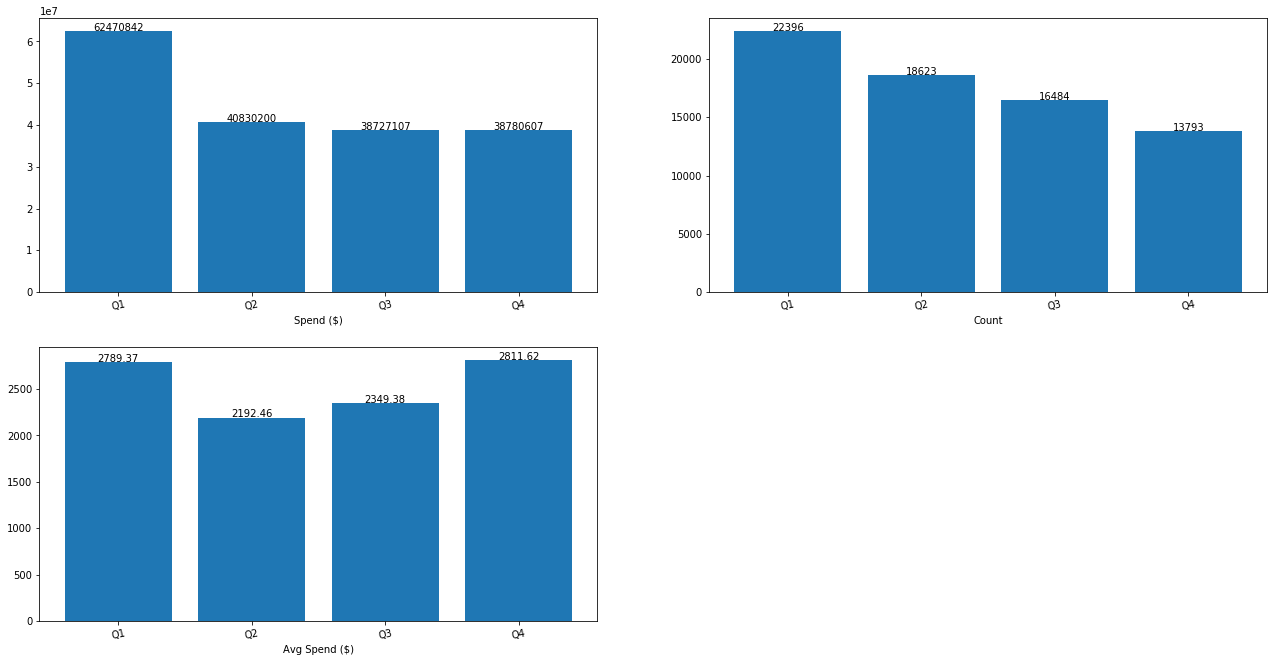

In [234]:
bar(q[0])


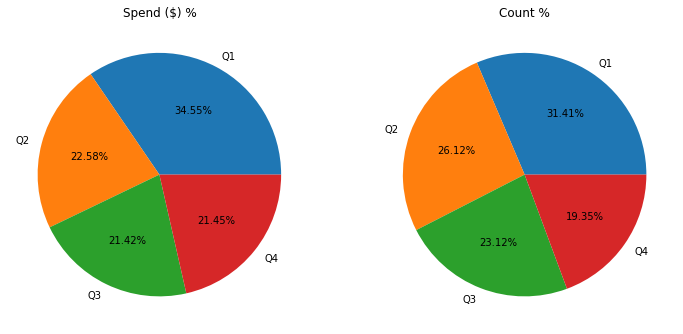

In [235]:
pie(q[1])



### `Quarters:`
- #### During the Q1, Hyundai Motors India ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.
- #### During the Q4, average spend per Adv is most.

In [236]:
display_side_by_side(d[0],d[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Dayparts 
 
 
 
 
 
 
 
 DAYTIME 
 12360920 
 12485 
 990.06 
 
 
 EARLY FRINGE 
 7156835 
 4367 
 1638.84 
 
 
 EARLY MORNING 
 8708318 
 8153 
 1068.11 
 
 
 EVENING NEWS 
 5364194 
 2411 
 2224.88 
 
 
 LATE FRINGE 
 13648569 
 10214 
 1336.26 
 
 
 OVERNIGHT 
 3181379 
 6621 
 480.50 
 
 
 PRIME ACCESS 
 7711727 
 2970 
 2596.54 
 
 
 PRIME TIME 
 86737738 
 13508 
 6421.21 
 
 
 WEEKEND 
 35939076 
 10567 
 3401.07 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Dayparts 
 
 
 
 
 
 
 DAYTIME 
 6.836461 
 17.511501 
 
 
 EARLY FRINGE 
 3.958235 
 6.125168 
 
 
 EARLY MORNING 
 4.816314 
 11.435424 
 
 
 EVENING NEWS 
 2.966778 
 3.381676 
 
 
 LATE FRINGE 
 7.548622 
 14.326189 
 
 
 OVERNIGHT 
 1.759527 
 9.286636 
 
 
 PRIME ACCESS 
 4.265129 
 4.165732 
 
 
 PRIME TIME 
 47.972089 
 18.946364 
 
 
 WEEKEND 
 19.876845 
 14.821308

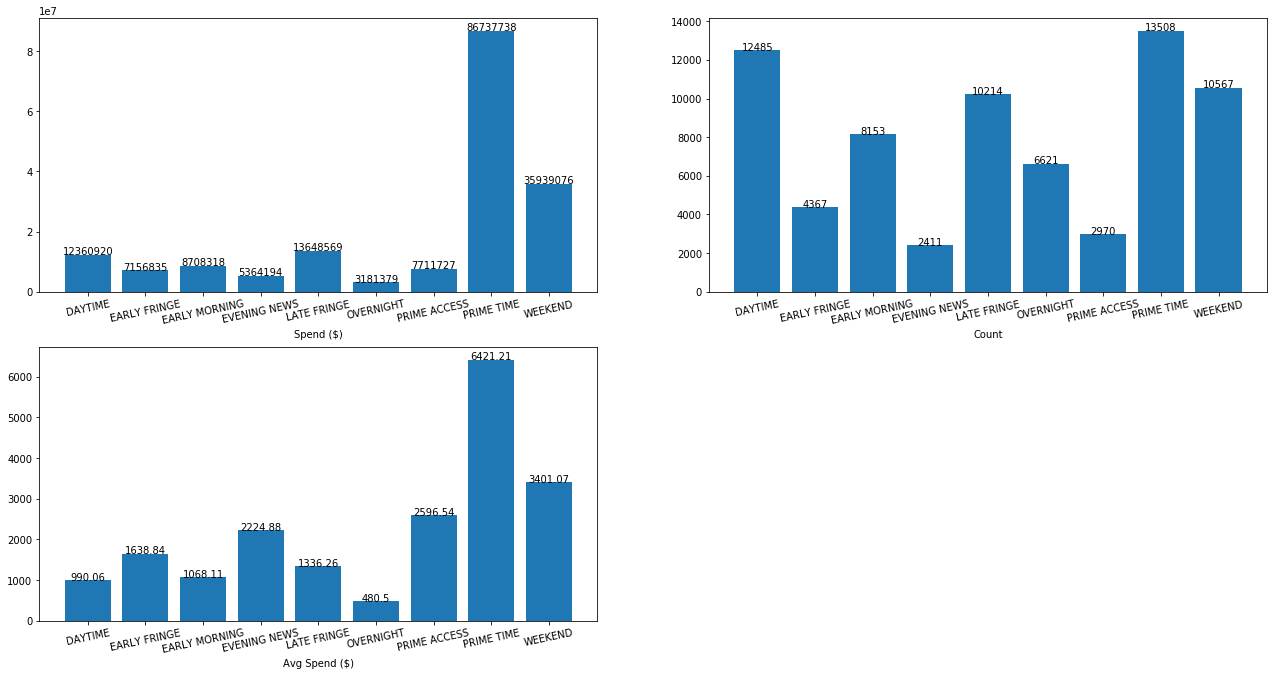

In [237]:
bar(d[0])

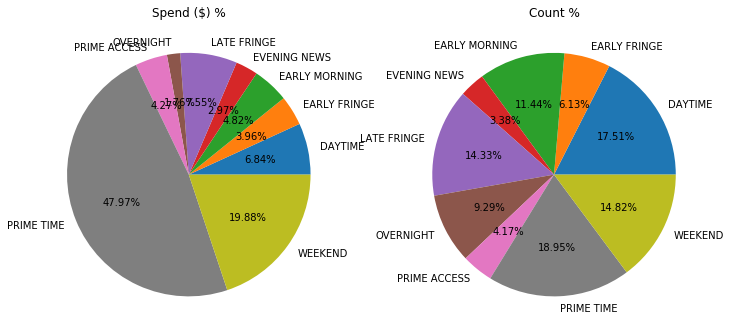

In [238]:
pie(d[1])

### `Dayparts:`
- #### Hyundai Motors India prefer to run their advs during the Daytime, Weekend, Primetime, Late fringe and Early-morning shows.
- #### For the Primetime show, Hyundai Motors India spend 48% of it's budget, and for the weekend show 20%.

In [239]:
display_side_by_side(t[0],t[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 TimeZone 
 
 
 
 
 
 
 
 Central India 
 888129 
 159 
 5585.72 
 
 
 Northeast India 
 162307451 
 69316 
 2341.56 
 
 
 Northern India 
 222498 
 13 
 17115.23 
 
 
 Southern India 
 17390678 
 1808 
 9618.74 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 TimeZone 
 
 
 
 
 
 
 Central India 
 0.491198 
 0.223014 
 
 
 Northeast India 
 89.767473 
 97.222846 
 
 
 Northern India 
 0.123057 
 0.018234 
 
 
 Southern India 
 9.618272 
 2.535907

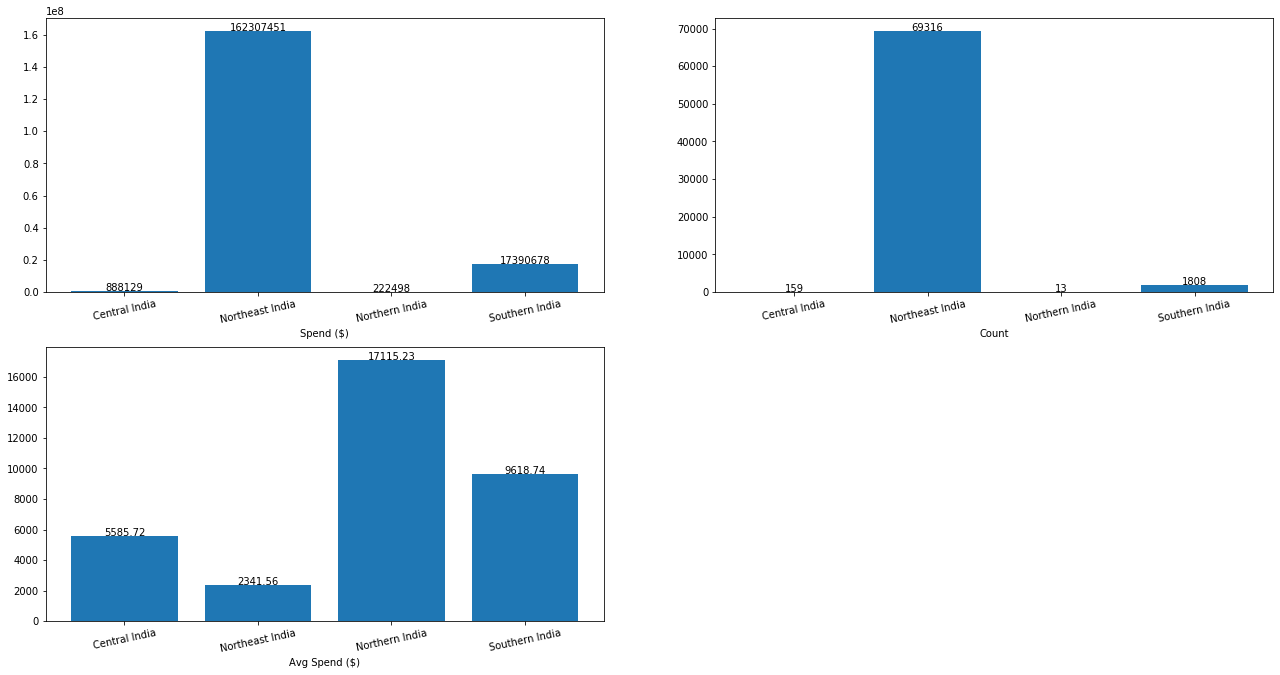

In [240]:
bar(t[0])

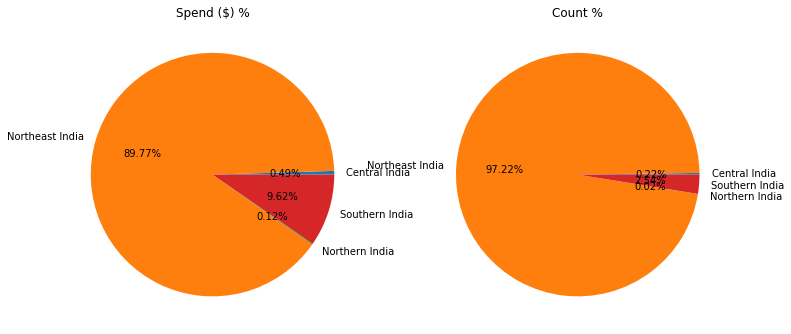

In [241]:
pie(t[1])


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 90% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern India, Southern India timezone is higher than other timezones.


In [242]:
display_side_by_side(n[0],n[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Network Type 
 
 
 
 
 
 
 
 broadcast 
 86701728 
 4796 
 18077.92 
 
 
 cable 
 94107028 
 66500 
 1415.14 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Network Type 
 
 
 
 
 
 
 broadcast 
 47.952173 
 6.726885 
 
 
 cable 
 52.047827 
 93.273115

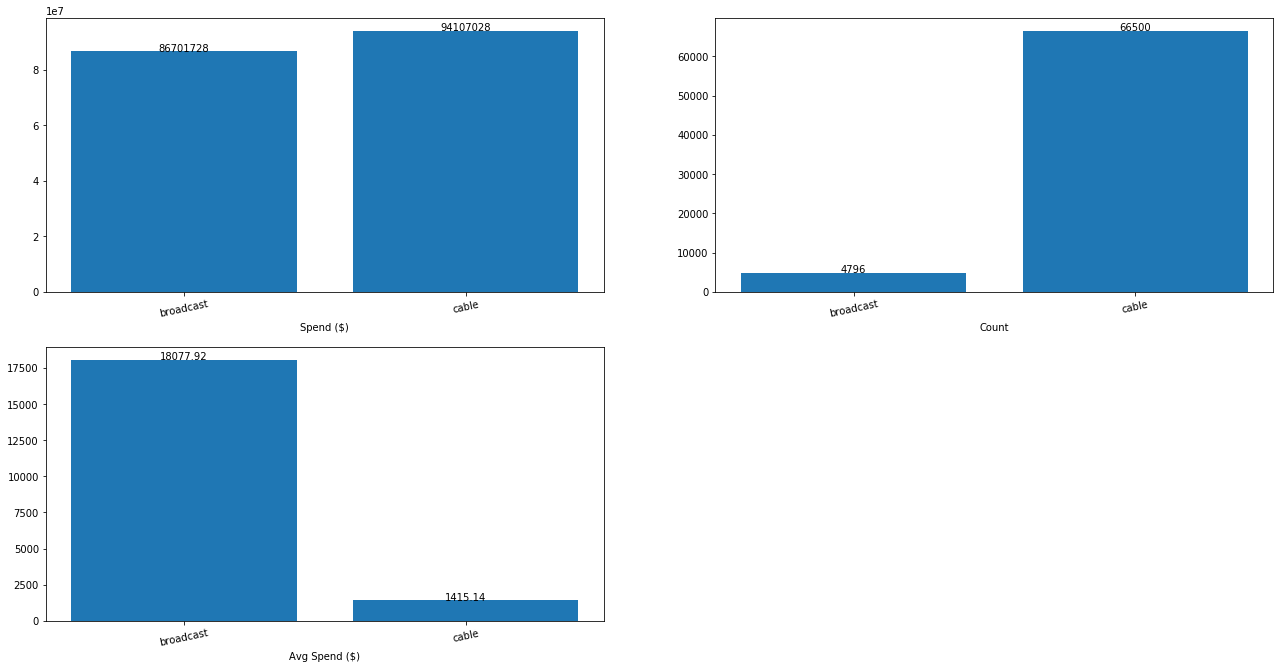

In [243]:
bar(n[0])

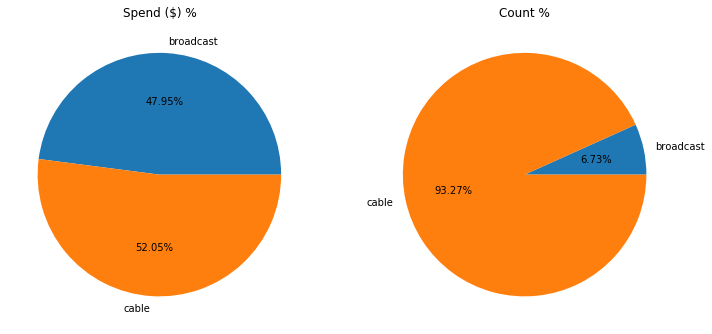

In [244]:
pie(n[1])

### `Network:`
- #### 93% of the Advs were ran on the Cable network, and 52% of the budget were allocated for this network.
- #### Though the spend on the cable network is bit higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

### `Products:`
- #### Hyundai Motors India has 1 product, it is 'Hyundai I20'
- #### 7 times Hyundai Motors India's advertisements were at Pod position 1 without spending a singel penny.
- ####  Hyundai Motors India spend most for promoting `Hyundai I20`, on 07-02-2021 at PRIME TIME show.


### `Quarters:`
- #### During the Q1, Hyundai Motors India ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.
- #### During the Q4, average spend per Adv is most.

### `Dayparts:`
- #### Hyundai Motors India prefer to run their advs during the Daytime, Weekend, Primetime, Late fringe and Early-morning shows.
- #### For the Primetime show, Hyundai Motors India spend 48% of it's budget, and for the weekend show 20%.


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 90% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern India, Southern India timezone is higher than other timezones.


### `Network:`
- #### 93% of the Advs were ran on the Cable network, and 52% of the budget were allocated for this network.
- #### Though the spend on the cable network is bit higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

## <u>`Toyota`

In [245]:
data.loc[data['Brand']=='Toyota',:]['Product'].unique()

array(['Toyota Innova', 'Toyota Etios', 'Toyota Fortuner'], dtype=object)

In [246]:
len(data.loc[data['Brand']=='Toyota',:]['Product'].unique())

3

- #### Toyota has 3 products, they are 'Toyota Innova', 'Toyota Etios', 'Toyota Fortuner'

In [247]:
data.loc[(data['Brand']=='Toyota') & (data['Pod Position']==1) & (data['Spend ($)']==0),:]

Id   Brand        Product  Network Network Type     Show  Pod Position       Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month        Day_Time Quarters
209672  1209673  Toyota   Toyota Etios  N-10048        cable  S-14023             1  EARLY MORNING        15       0.5          0              13         Wed            6  Northeast India 2021-03-24 06:46:11             Mar  Early-morning        Q1
257430  1257431  Toyota  Toyota Innova  N-10090        cable  S-14276             1     PRIME TIME        30       1.0          0              18         Wed           21   Southern India 2021-04-28 21:40:09             Apr           Night       Q2
257925  1257926  Toyota  Toyota Innova  N-10090        cable  S-10321             1  EARLY MORNING        30       1.0          0              19        Tues            6   Southern India 2021-05-04 06:39:00             May  Early-morning        Q2
285269  1285270  Toyota  Toyota Innova  N-10090        cable  S-10318             1      OVERNIGHT        30       1.0          0              18         Fri            2   Southern India 2021-04-30 02:23:28             Apr       Mid-night       Q2
336576  1336577  Toyota  Toyota Innova  N-10090        cable  S-22426             1        DAYTIME        30       1.0          0              24        Tues           14   Southern India 2021-06-08 14:36:18             Jun       Afternoon       Q2
346781  1346782  Toyota  Toyota Innova  N-10090        cable  S-18491             1  EARLY MORNING        30       1.0          0              23       Thurs            7   Southern India 2021-06-03 07:31:16             Jun  Early-morning        Q2
347084  1347085  Toyota  Toyota Innova  N-10090        cable  S-14276             1        DAYTIME        30       1.0          0              24         Wed           14   Southern India 2021-06-09 14:02:05             Jun       Afternoon       Q2
348646  1348647  Toyota  Toyota Innova  N-10090        cable  S-14276             1     PRIME TIME        30       1.0          0              23         Fri           21   Southern India 2021-06-04 21:54:18             Jun           Night       Q2
358405  1358406  Toyota  Toyota Innova  N-10090        cable  S-14276             1        DAYTIME        30       1.0          0              24         Wed           14   Southern India 2021-06-09 14:28:28             Jun       Afternoon       Q2
367637  1367638  Toyota  Toyota Innova  N-10090        cable  S-14276             1   EARLY FRINGE        30       1.0          0              26         Wed           16   Southern India 2021-06-23 16:23:57             Jun       Afternoon       Q2
377943  1377944  Toyota  Toyota Innova  N-10090        cable  S-14276             1      OVERNIGHT        30       1.0          0              24       Thurs            4   Southern India 2021-06-10 04:25:32             Jun       Mid-night       Q2
385352  1385353  Toyota  Toyota Innova  N-10090        cable  S-14276             1      OVERNIGHT        30       1.0          0              25         Fri            4   Southern India 2021-06-18 04:17:38             Jun       Mid-night       Q2
386646  1386647  Toyota  Toyota Innova  N-10090        cable  S-14276             1    LATE FRINGE        30       1.0          0              25         Wed           23   Southern India 2021-06-16 23:12:29             Jun           Night       Q2
393704  1393705  Toyota  Toyota Innova  N-10090        cable  S-21671             1   EARLY FRINGE        30       1.0          0              26         Wed           17   Southern India 2021-06-23 17:07:15             Jun         Evening       Q2
415704  1415705  Toyota   Toyota Etios  N-10090        cable  S-21671             1    LATE FRINGE        30       1.0          0              28         Fri            1   Southern India 2021-07-09 01:35:41             Jul       Mid-night       Q3
425474  1425475  Toyota   Toy

In [248]:
data.loc[(data['Brand']=='Toyota') & (data['Pod Position']==1) & (data['Spend ($)']==0),:].shape

(40, 19)

- #### ⬆️⬆️ Above 40 times Toyota's advertisements were at Pod position 1 without spending a singel penny. 

In [249]:
sca

Spend ($)   Count  Avg Spend ($)  Max Spend ($)  Min Spend ($)
Brand                                                                                
Honda Cars              48258340   85265         565.98          72902              0
Hyundai Motors India   180808756   71296        2536.03        5500000              0
Mahindra and Mahindra  397305655  147890        2686.49         103048              0
Maruti Suzuki          558646472  280274        1993.22          91596              0
Tata Motors             94790227   81041        1169.66          83935              0
Toyota                 112653112   66018        1706.40          92140              0

In [250]:
data.loc[(data['Brand']=='Toyota') & (data['Spend ($)']==92140),:]

Id   Brand        Product  Network Network Type     Show  Pod Position Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month Day_Time Quarters
24249  1024250  Toyota  Toyota Innova  N-10020    broadcast  S-20845             1  DAYTIME       120       4.0      92140               2        Tues           11  Northeast India 2021-01-05 11:41:03             Jan  Morning       Q1

- #### ⬆️⬆️ Toyota spend most for promoting `Toyota Innova`, on 05-01-2021 at DAYTIME show.

In [251]:
p=product_comapre('Toyota')
q=quarters_comapre('Toyota')
d=daypart_comapre('Toyota')
t=timezone_comapre('Toyota')
n=network_comapre('Toyota')

In [252]:
display_side_by_side(p[0],p[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Product 
 
 
 
 
 
 
 
 Toyota Etios 
 43551141 
 26865 
 1621.11 
 
 
 Toyota Fortuner 
 159554 
 5 
 31910.80 
 
 
 Toyota Innova 
 68942417 
 39148 
 1761.07 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Product 
 
 
 
 
 
 
 Toyota Etios 
 38.659510 
 40.693447 
 
 
 Toyota Fortuner 
 0.141633 
 0.007574 
 
 
 Toyota Innova 
 61.198857 
 59.298979

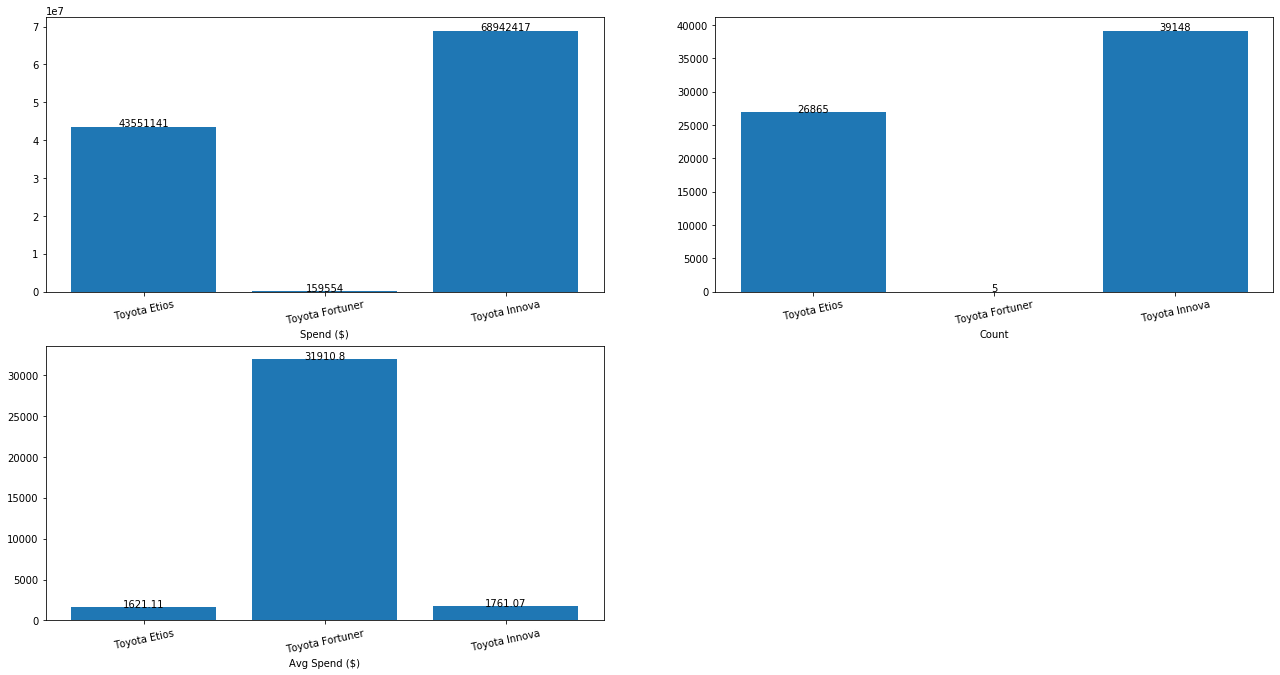

In [253]:
bar(p[0])

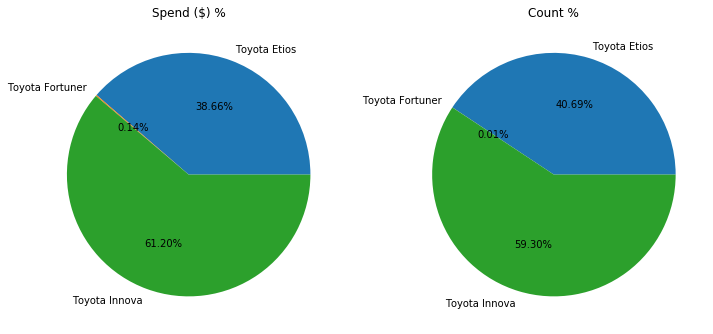

In [254]:
pie(p[1])

### `Products:`
- #### Out of total advertisements ran by Toyota brand, nearly 60% of Advs were for the promotion of Innova, also out of total budget 61% was spend for this product.
- #### Though, the brand ran only 5 advs for the promotion of Fortuner, but the average spend per adv is USD 31910, which is heighest among other products.

In [255]:
display_side_by_side(q[0],q[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Quarters 
 
 
 
 
 
 
 
 Q1 
 40351398 
 18212 
 2215.65 
 
 
 Q2 
 29509857 
 22083 
 1336.32 
 
 
 Q3 
 28424768 
 19678 
 1444.49 
 
 
 Q4 
 14367089 
 6045 
 2376.69 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Quarters 
 
 
 
 
 
 
 Q1 
 35.819160 
 27.586416 
 
 
 Q2 
 26.195332 
 33.449968 
 
 
 Q3 
 25.232120 
 29.807022 
 
 
 Q4 
 12.753388 
 9.156594

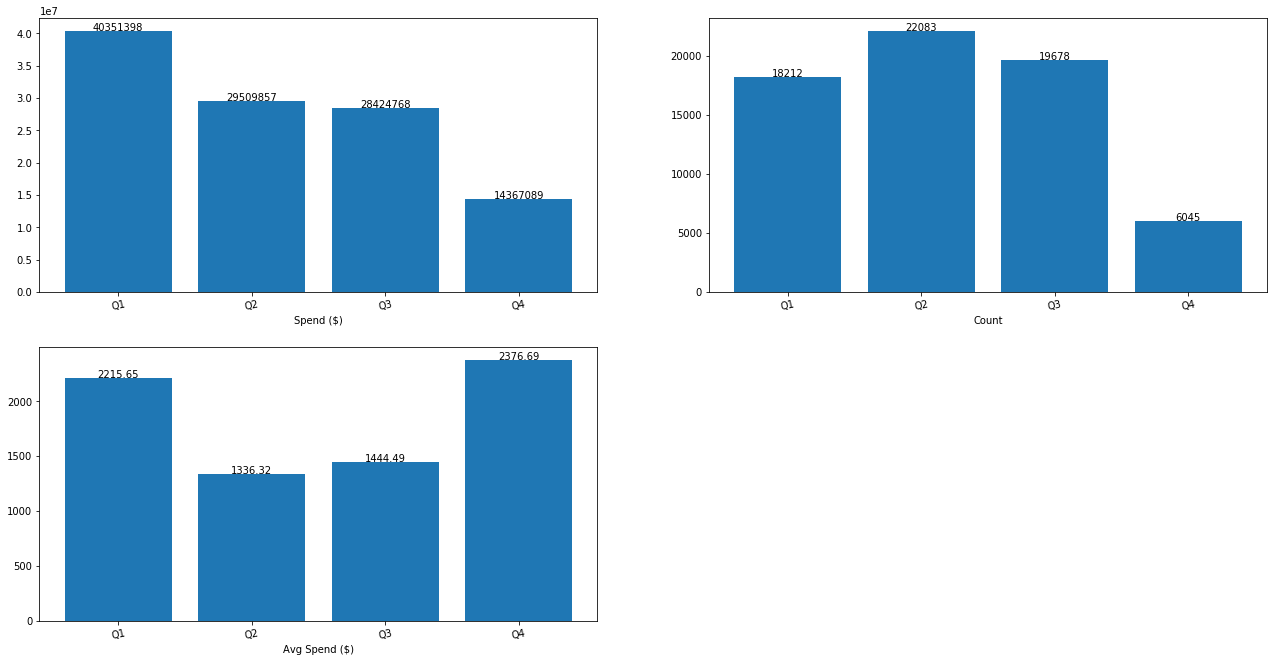

In [256]:
bar(q[0])


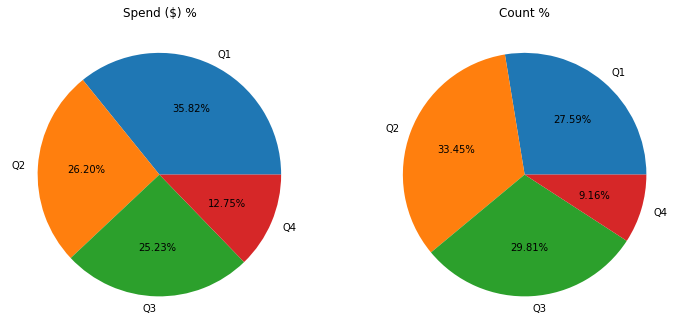

In [257]:
pie(q[1])



### `Quarters:`
- #### We can see a jump in numbers of Advs from Q1 to Q2, after that Advs were reduced.
- #### During the Q1, Toyota ran spend most on advs.
- #### After Q1, the budget for the Advs were reduced.


In [258]:
display_side_by_side(d[0],d[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Dayparts 
 
 
 
 
 
 
 
 DAYTIME 
 18560894 
 17393 
 1067.15 
 
 
 EARLY FRINGE 
 9744570 
 4611 
 2113.33 
 
 
 EARLY MORNING 
 8294798 
 8807 
 941.84 
 
 
 EVENING NEWS 
 5409054 
 2535 
 2133.75 
 
 
 LATE FRINGE 
 8863807 
 7716 
 1148.76 
 
 
 OVERNIGHT 
 1716154 
 3458 
 496.29 
 
 
 PRIME ACCESS 
 8979945 
 2353 
 3816.38 
 
 
 PRIME TIME 
 24146575 
 9204 
 2623.49 
 
 
 WEEKEND 
 26937315 
 9941 
 2709.72 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Dayparts 
 
 
 
 
 
 
 DAYTIME 
 16.476148 
 26.345845 
 
 
 EARLY FRINGE 
 8.650067 
 6.984459 
 
 
 EARLY MORNING 
 7.363133 
 13.340301 
 
 
 EVENING NEWS 
 4.801513 
 3.839862 
 
 
 LATE FRINGE 
 7.868231 
 11.687722 
 
 
 OVERNIGHT 
 1.523397 
 5.237965 
 
 
 PRIME ACCESS 
 7.971324 
 3.564179 
 
 
 PRIME TIME 
 21.434450 
 13.941652 
 
 
 WEEKEND 
 23.911736 
 15.058014

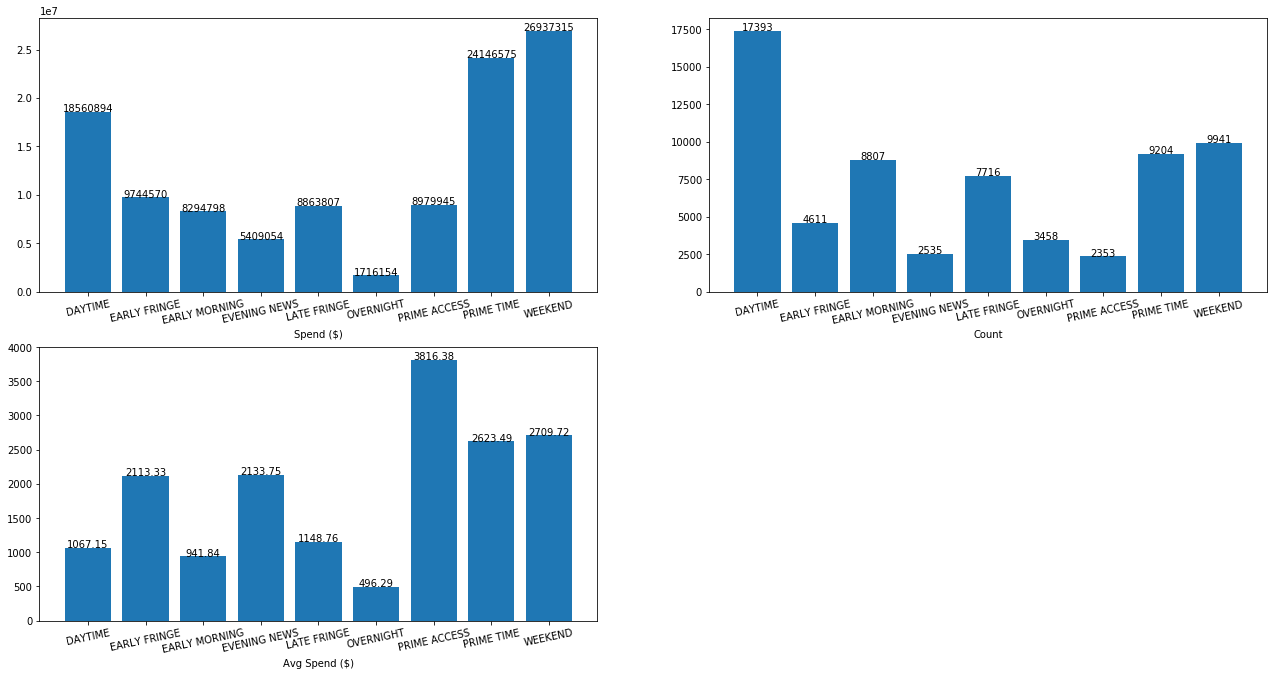

In [259]:
bar(d[0])


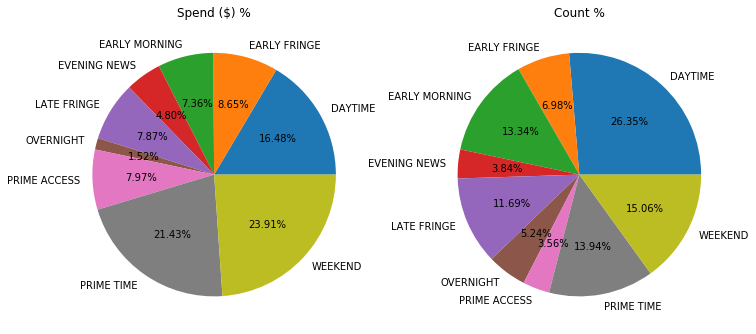

In [260]:
pie(d[1])


### `Dayparts:`
- #### Toyota prefer to run their advs during the Daytime, Weekend, Primetime and Early-morning shows.
- #### For the Weekend show, Toyota spend 24% of it's budget, and for the primetime show 21%, for the daytime show 16.5%.

In [261]:
display_side_by_side(t[0],t[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 TimeZone 
 
 
 
 
 
 
 
 Central India 
 1015383 
 999 
 1016.40 
 
 
 Northeast India 
 100164016 
 61848 
 1619.52 
 
 
 Northern India 
 197467 
 7 
 28209.57 
 
 
 Southern India 
 11276246 
 3164 
 3563.92 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 TimeZone 
 
 
 
 
 
 
 Central India 
 0.901336 
 1.513224 
 
 
 Northeast India 
 88.913670 
 93.683541 
 
 
 Northern India 
 0.175288 
 0.010603 
 
 
 Southern India 
 10.009707 
 4.792632

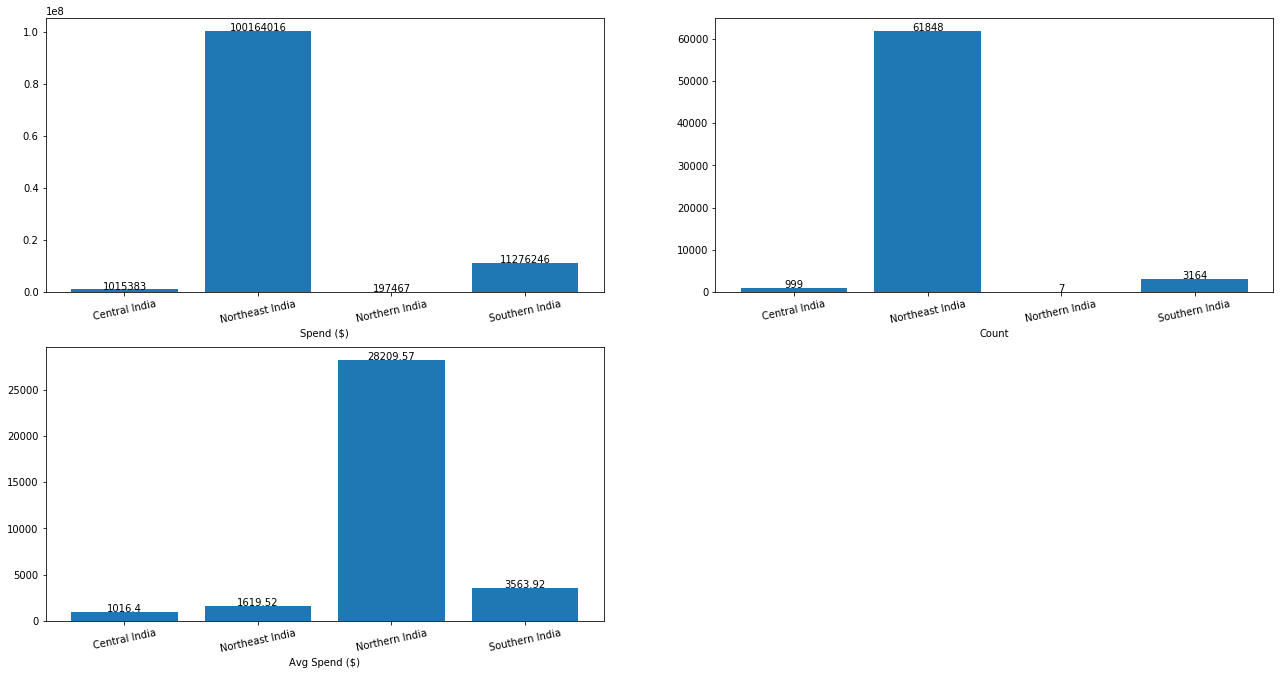

In [262]:
bar(t[0])

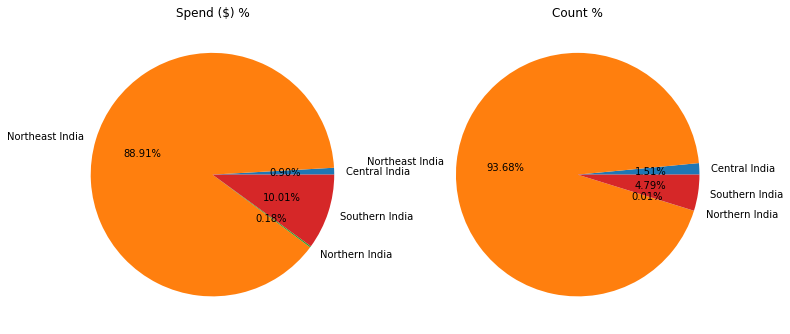

In [263]:
pie(t[1])


### `Timezone:`
- #### More than 94% of the Advs were ran on the Northeast India timezone, also 89% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern  India timezone is higher than other timezones.


In [264]:
display_side_by_side(n[0],n[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Network Type 
 
 
 
 
 
 
 
 broadcast 
 29330783 
 3205 
 9151.57 
 
 
 cable 
 83322329 
 62813 
 1326.51 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Network Type 
 
 
 
 
 
 
 broadcast 
 26.036372 
 4.854737 
 
 
 cable 
 73.963628 
 95.145263

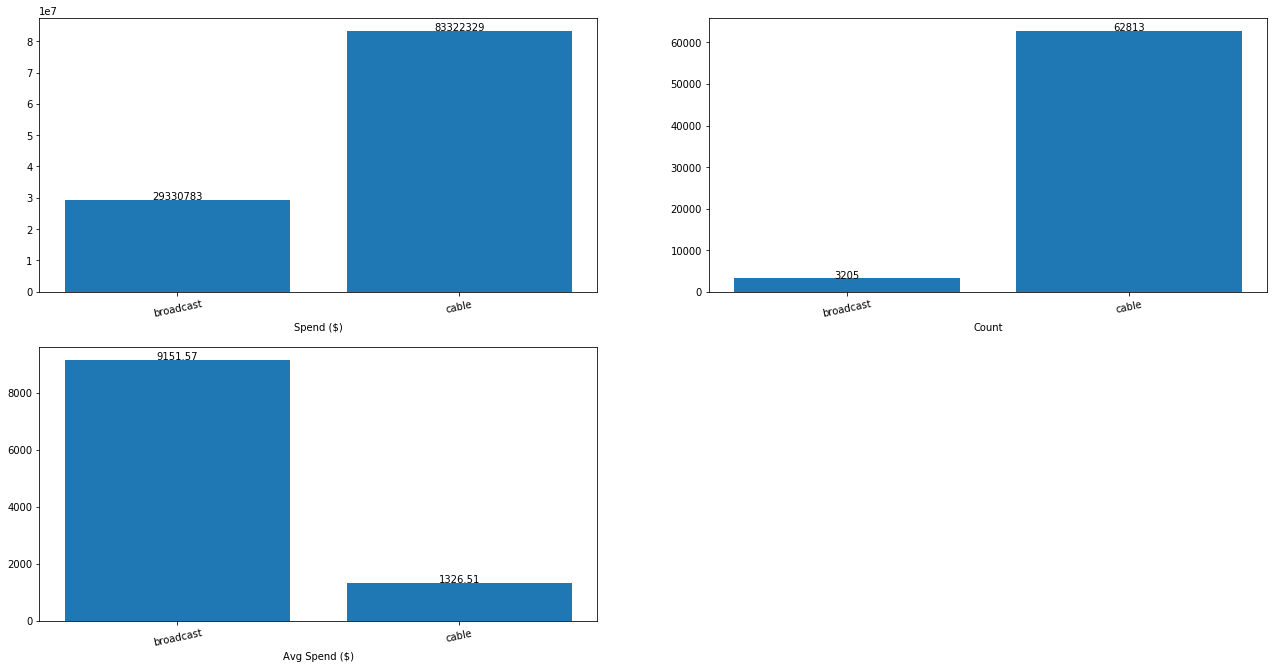

In [265]:
bar(n[0])

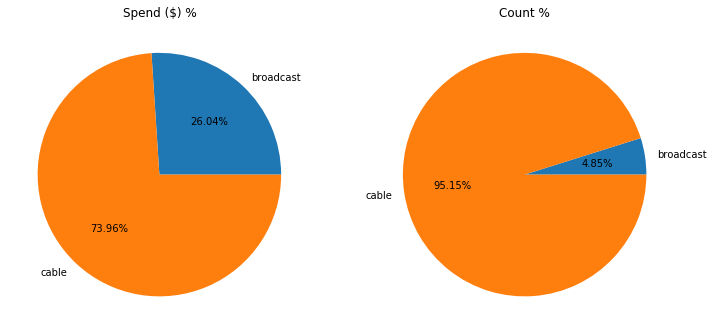

In [266]:
pie(n[1])

### `Network:`
- #### 95% of the Advs were ran on the Cable network, and 74% of the budget were allocated for this network.
- #### Though the spend on the cable network is higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

### `Products:`
- #### Toyota has 3 products, they are 'Toyota Innova', 'Toyota Etios', 'Toyota Fortuner'
- #### 40 times Toyota's advertisements were at Pod position 1 without spending a singel penny. 
- #### Toyota spend most for promotion of `Toyota Innova`, on 05-01-2021 at DAYTIME show.
- #### Out of total advertisements ran by Toyota brand, nearly 60% of Advs were for the promotion of Innova, also out of total budget 61% was spend for this product.
- #### Though, the brand ran only 5 advs for the promotion of Fortuner, but the average spend per adv is USD 31910, which is heighest among other products.


### `Quarters:`
- #### We can see a jump in numbers of Advs from Q1 to Q2, after that Advs were reduced.
- #### During the Q1, Toyota ran spend most on advs.
- #### After Q1, the budget for the Advs were reduced.


### `Dayparts:`
- #### Toyota prefer to run their advs during the Daytime, Weekend, Primetime and Early-morning shows.
- #### For the Weekend show, Toyota spend 24% of it's budget, and for the primetime show 21%, for the daytime show 16.5%.


### `Timezone:`
- #### More than 94% of the Advs were ran on the Northeast India timezone, also 89% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern  India timezone is higher than other timezones.


### `Network:`
- #### 95% of the Advs were ran on the Cable network, and 74% of the budget were allocated for this network.
- #### Though the spend on the cable network is higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

## <u>`Tata Motors`

In [267]:
data.loc[data['Brand']=='Tata Motors',:]['Product'].unique()

array(['Tata Tiago', 'Tata Safari', 'Tata Nexon'], dtype=object)

In [268]:
len(data.loc[data['Brand']=='Tata Motors',:]['Product'].unique())

3

- #### Tata Motors has 3 products, they are 'Tata Tiago', 'Tata Safari', 'Tata Nexon'

In [269]:
data.loc[(data['Brand']=='Tata Motors') & (data['Pod Position']==1) & (data['Spend ($)']==0),:]

Id        Brand      Product  Network Network Type     Show  Pod Position     Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month   Day_Time Quarters
222720  1222721  Tata Motors  Tata Safari  N-10062        cable  S-12129             1      DAYTIME        15      0.50          0              13        Tues           14  Northeast India 2021-03-23 14:02:24             Mar  Afternoon       Q1
445511  1445512  Tata Motors  Tata Safari  N-10052        cable  S-19790             1      WEEKEND         5      0.17          0              30         Sat           16  Northeast India 2021-07-24 16:29:14             Jul  Afternoon       Q3
571129  1571130  Tata Motors   Tata Nexon  N-10138        cable  S-14774             1      DAYTIME        15      0.50          0              39         Wed           14  Northeast India 2021-09-22 14:47:56             Sep  Afternoon       Q3
652486  1652487  Tata Motors   Tata Nexon  N-10051        cable  S-12560             1  LATE FRINGE        15      0.50          0              45         Sun            1  Northeast India 2021-11-07 01:21:10             Nov  Mid-night       Q4
652615  1652616  Tata Motors  Tata Safari  N-10033        cable  S-12007             1  LATE FRINGE         5      0.17          0              45         Sun            1  Northeast India 2021-11-07 01:44:49             Nov  Mid-night       Q4

In [270]:
data.loc[(data['Brand']=='Tata Motors') & (data['Pod Position']==1) & (data['Spend ($)']==0),:].shape

(5, 19)

- #### ⬆️⬆️ Above 5 times Tata Motors's advertisements were at Pod position 1 without spending a singel penny.

In [271]:
sca

Spend ($)   Count  Avg Spend ($)  Max Spend ($)  Min Spend ($)
Brand                                                                                
Honda Cars              48258340   85265         565.98          72902              0
Hyundai Motors India   180808756   71296        2536.03        5500000              0
Mahindra and Mahindra  397305655  147890        2686.49         103048              0
Maruti Suzuki          558646472  280274        1993.22          91596              0
Tata Motors             94790227   81041        1169.66          83935              0
Toyota                 112653112   66018        1706.40          92140              0

In [272]:
data.loc[(data['Brand']=='Tata Motors') & (data['Spend ($)']==83935),:]

Id        Brand     Product  Network Network Type     Show  Pod Position    Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month Day_Time Quarters
681144  1681145  Tata Motors  Tata Nexon  N-10002    broadcast  S-14870             7  PRIME TIME        30       1.0      83935              49         Wed           21  Northeast India 2021-12-01 21:57:26             Dec    Night       Q4

- #### ⬆️⬆️ Tata Motors spend most for promoting `Tata Nexon`, on 01-12-2021 at PRIME TIME show.

In [273]:
p=product_comapre('Tata Motors')
q=quarters_comapre('Tata Motors')
d=daypart_comapre('Tata Motors')
t=timezone_comapre('Tata Motors')
n=network_comapre('Tata Motors')

In [274]:
display_side_by_side(p[0],p[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Product 
 
 
 
 
 
 
 
 Tata Nexon 
 68498763 
 50101 
 1367.21 
 
 
 Tata Safari 
 24022082 
 28785 
 834.53 
 
 
 Tata Tiago 
 2269382 
 2155 
 1053.08 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Product 
 
 
 
 
 
 
 Tata Nexon 
 72.263529 
 61.821794 
 
 
 Tata Safari 
 25.342362 
 35.519058 
 
 
 Tata Tiago 
 2.394110 
 2.659148

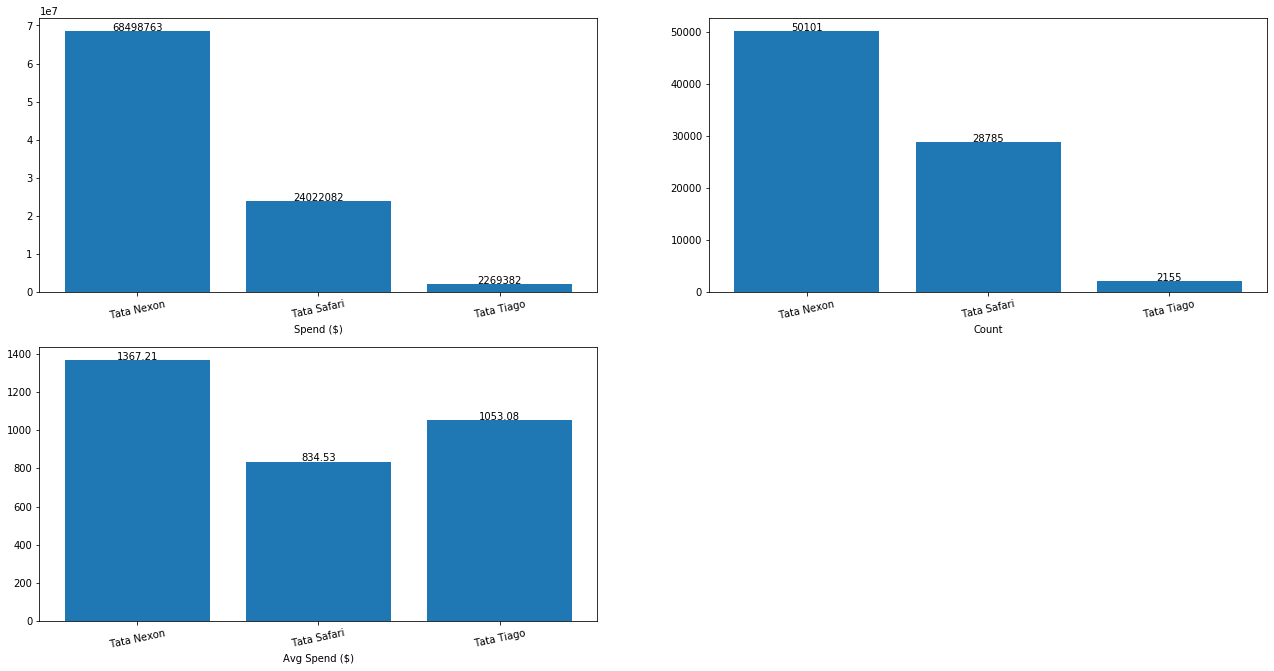

In [275]:
bar(p[0])

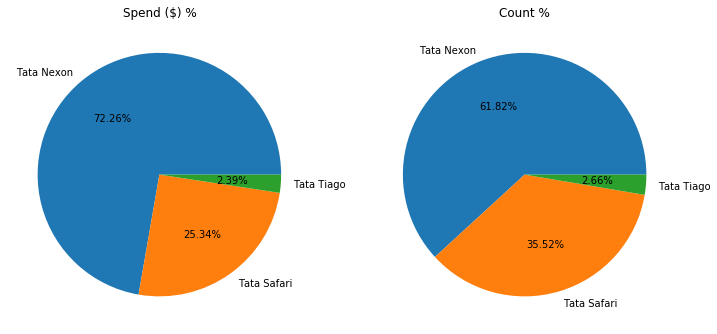

In [276]:
pie(p[1])

### `Products:`
- #### Out of total advertisements ran by Tata Motors brand, nearly 62% of Advs were for the promotion of Tata Nexon, also out of total budget 72% was spend for this product.


In [277]:
display_side_by_side(q[0],q[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Quarters 
 
 
 
 
 
 
 
 Q1 
 25796631 
 20679 
 1247.48 
 
 
 Q2 
 16408174 
 14967 
 1096.29 
 
 
 Q3 
 15831865 
 14912 
 1061.69 
 
 
 Q4 
 36753557 
 30483 
 1205.71 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Quarters 
 
 
 
 
 
 
 Q1 
 27.214442 
 25.516714 
 
 
 Q2 
 17.309985 
 18.468430 
 
 
 Q3 
 16.702001 
 18.400563 
 
 
 Q4 
 38.773572 
 37.614294

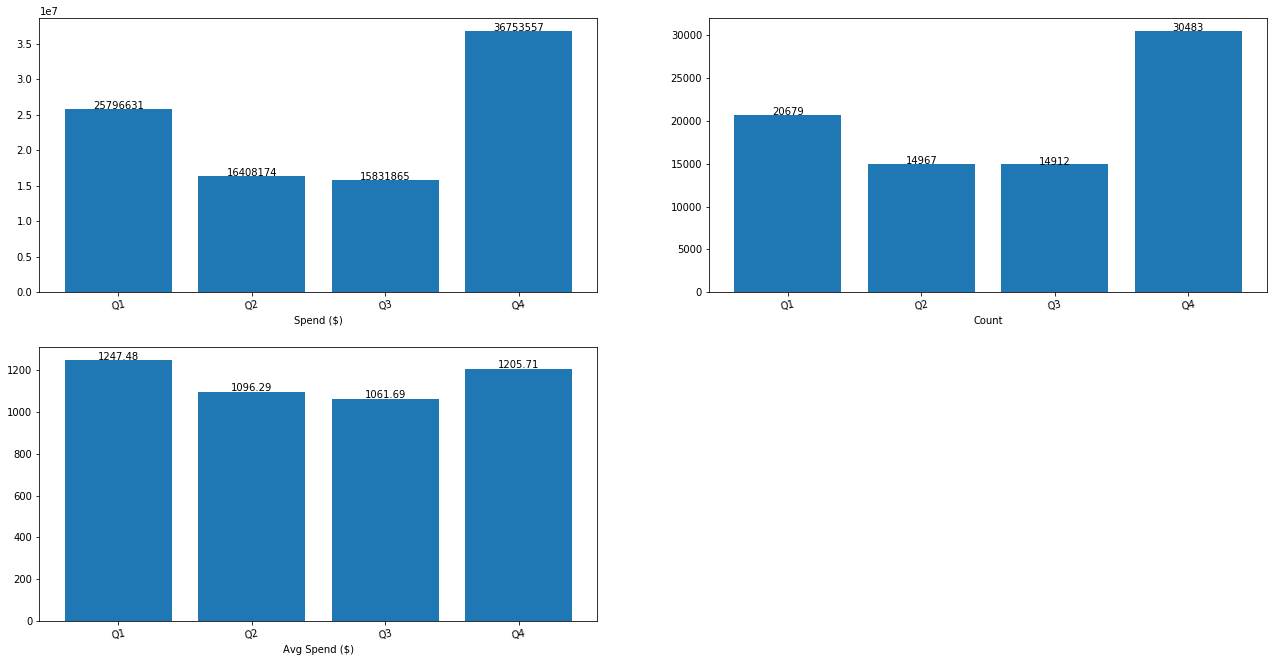

In [278]:
bar(q[0])


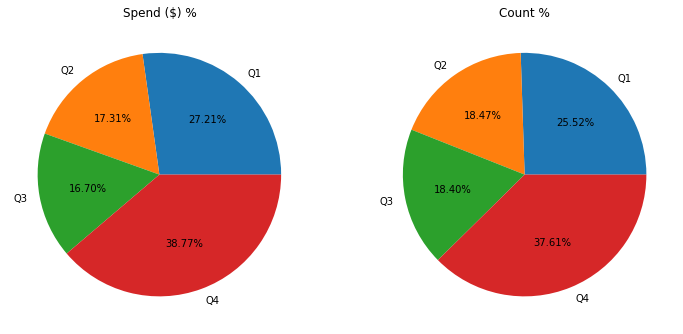

In [279]:
pie(q[1])



### `Quarters:`
- #### Tata gave most focus on the Q4, not like other brands who spent more on the Q1.
- #### Average spend in all quarters is quiet symmetric.

In [280]:
display_side_by_side(d[0],d[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Dayparts 
 
 
 
 
 
 
 
 DAYTIME 
 16513542 
 17745 
 930.60 
 
 
 EARLY FRINGE 
 6058611 
 5346 
 1133.30 
 
 
 EARLY MORNING 
 7110565 
 9226 
 770.71 
 
 
 EVENING NEWS 
 5829272 
 3007 
 1938.57 
 
 
 LATE FRINGE 
 11161135 
 11137 
 1002.17 
 
 
 OVERNIGHT 
 2552537 
 5819 
 438.66 
 
 
 PRIME ACCESS 
 5799904 
 3030 
 1914.16 
 
 
 PRIME TIME 
 25652452 
 13553 
 1892.75 
 
 
 WEEKEND 
 14112209 
 12178 
 1158.83 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Dayparts 
 
 
 
 
 
 
 DAYTIME 
 17.421144 
 21.896324 
 
 
 EARLY FRINGE 
 6.391599 
 6.596661 
 
 
 EARLY MORNING 
 7.501369 
 11.384361 
 
 
 EVENING NEWS 
 6.149655 
 3.710468 
 
 
 LATE FRINGE 
 11.774563 
 13.742427 
 
 
 OVERNIGHT 
 2.692827 
 7.180316 
 
 
 PRIME ACCESS 
 6.118673 
 3.738848 
 
 
 PRIME TIME 
 27.062338 
 16.723634 
 
 
 WEEKEND 
 14.887831 
 15.026962

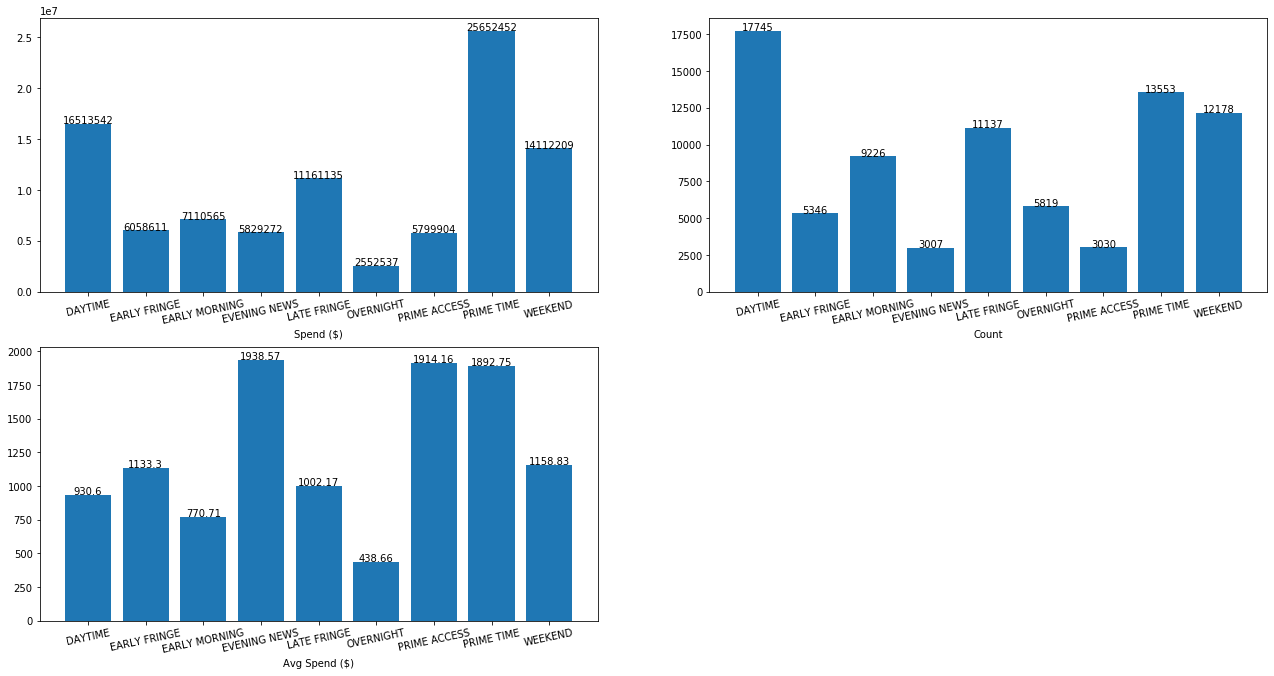

In [281]:
bar(d[0])


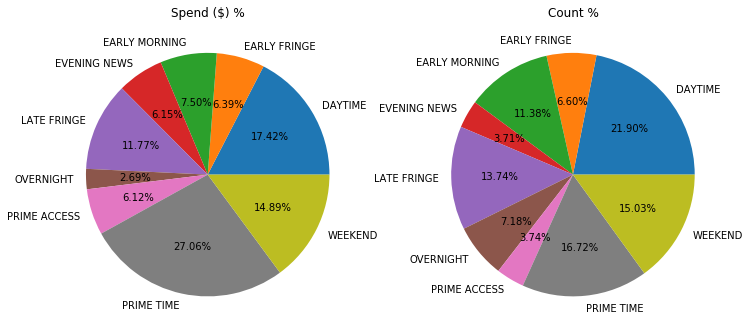

In [282]:
pie(d[1])


### `Dayparts:`
- #### Tata Motors prefer to run their advs during the Daytime, Weekend, Primetime, Late-fringe and Early-morning shows.
- #### For the primetime show, Tata Motors spend 27% of it's budget, and for the weekend show 15%, for the daytime show 17% & for the late-fringe show 12%. 

In [283]:
display_side_by_side(t[0],t[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 TimeZone 
 
 
 
 
 
 
 
 Central India 
 137828 
 309 
 446.05 
 
 
 Northeast India 
 87529847 
 78897 
 1109.42 
 
 
 Northern India 
 66497 
 17 
 3911.59 
 
 
 Southern India 
 7056055 
 1818 
 3881.22 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 TimeZone 
 
 
 
 
 
 
 Central India 
 0.145403 
 0.381288 
 
 
 Northeast India 
 92.340582 
 97.354426 
 
 
 Northern India 
 0.070152 
 0.020977 
 
 
 Southern India 
 7.443863 
 2.243309

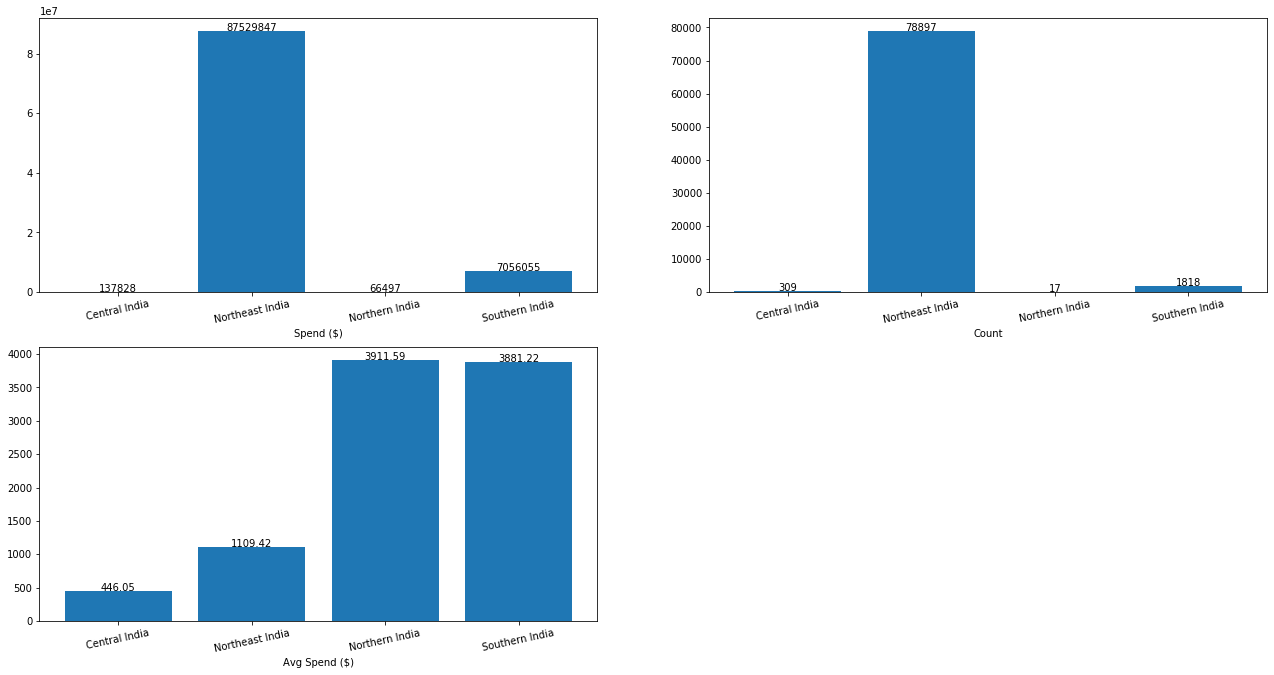

In [284]:
bar(t[0])

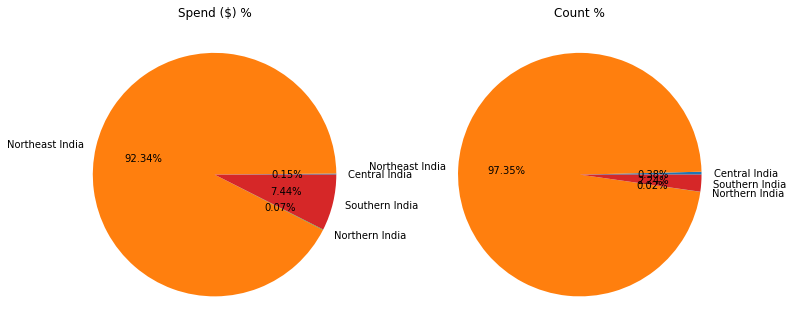

In [285]:
pie(t[1])


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 92% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern India, Southern India timezone is higher than other timezones.


In [286]:
display_side_by_side(n[0],n[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Network Type 
 
 
 
 
 
 
 
 broadcast 
 29303349 
 6127 
 4782.66 
 
 
 cable 
 65486878 
 74914 
 874.16 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Network Type 
 
 
 
 
 
 
 broadcast 
 30.913893 
 7.560371 
 
 
 cable 
 69.086107 
 92.439629

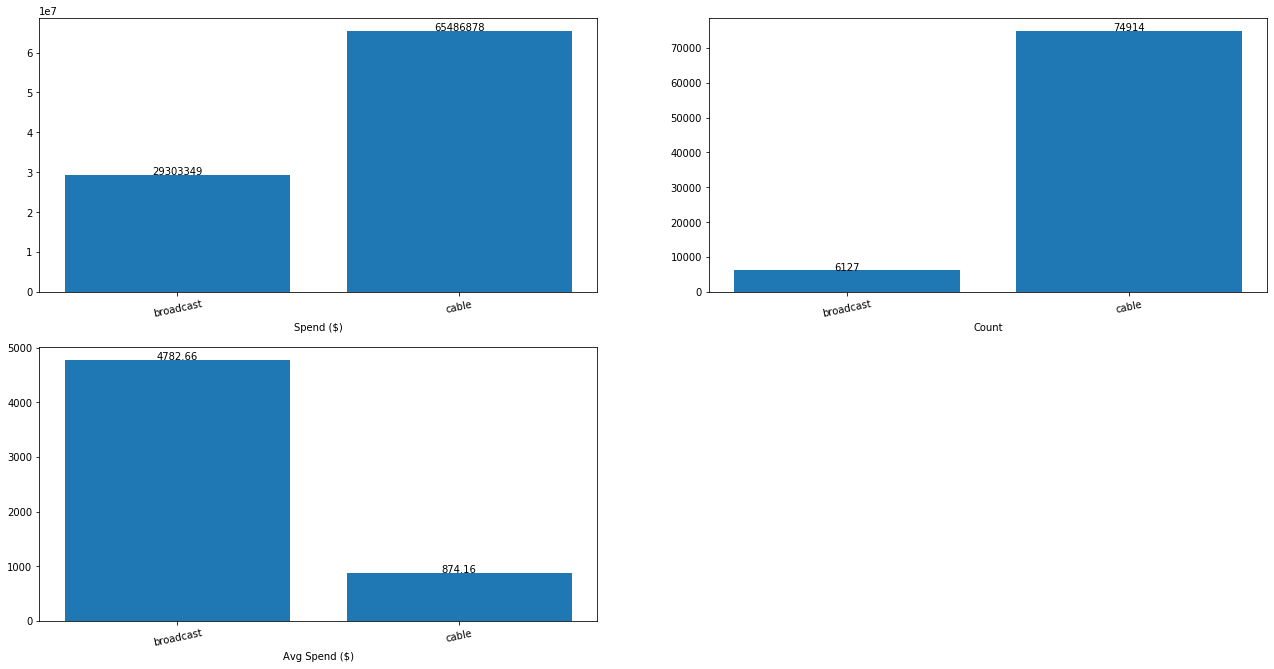

In [287]:
bar(n[0])

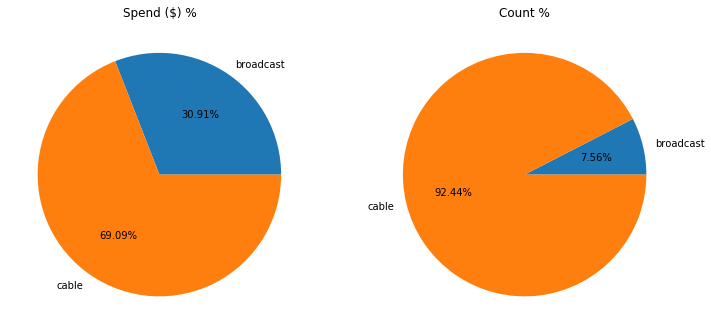

In [288]:
pie(n[1])

### `Network:`
- #### 92% of the Advs were ran on the Cable network, and 69% of the budget were allocated for this network.
- #### Though the spend on the cable network is higher than the boradcast network, but the average spend on the Broadcast network is way more higher than the cable network.

### `Products:`
- #### Tata Motors has 3 products, they are 'Tata Tiago', 'Tata Safari', 'Tata Nexon'.
- #### 5 times Tata Motors's advertisements were at Pod position 1 without spending a singel penny.
- ####  Tata Motors spend most for promoting `Tata Nexon`, on 01-12-2021 at PRIME TIME show.
- #### Out of total advertisements ran by Tata Motors brand, nearly 62% of Advs were for the promotion of Tata Nexon, also out of total budget 72% was spend for this product.



### `Quarters:`
- #### Tata gave most focus on the Q4, not like other brands who spent more on the Q1.
- #### Average spend in all quarters is quiet symmetric.

### `Dayparts:`
- #### Tata Motors prefer to run their advs during the Daytime, Weekend, Primetime, Late-fringe and Early-morning shows.
- #### For the primetime show, Tata Motors spend 27% of it's budget, and for the weekend show 15%, for the daytime show 17% & for the late-fringe show 12%. 


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 92% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern India, Southern India timezone is higher than other timezones.


### `Network:`
- #### 92% of the Advs were ran on the Cable network, and 69% of the budget were allocated for this network.
- #### Though the spend on the cable network is higher than the boradcast network, but the average spend on the Broadcast network is way more higher than the cable network.

## <u>`Mahindra and Mahindra`

In [289]:
data.loc[data['Brand']=='Mahindra and Mahindra',:]['Product'].unique()

array(['Mahindra XUV 700', 'Mahindra New Thar', 'Mahindra Scorpio'],
      dtype=object)

In [290]:
len(data.loc[data['Brand']=='Mahindra and Mahindra',:]['Product'].unique())

3

- #### Mahindra and Mahindra has 3 products, they are 'Mahindra XUV 700', 'Mahindra New Thar', 'Mahindra Scorpio'

In [291]:
data.loc[(data['Brand']=='Mahindra and Mahindra') & (data['Pod Position']==1) & (data['Spend ($)']==0),:]

Id                  Brand            Product  Network Network Type     Show  Pod Position       Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month        Day_Time Quarters
161031  1161032  Mahindra and Mahindra  Mahindra New Thar  N-10092        cable  S-10956             1        WEEKEND        30       1.0          0              11         Sun            9  Northeast India 2021-03-14 09:31:39             Mar  Early-morning        Q1
164085  1164086  Mahindra and Mahindra  Mahindra New Thar  N-10092        cable  S-10956             1        WEEKEND        30       1.0          0              11         Sun           10  Northeast India 2021-03-14 10:08:40             Mar         Morning       Q1
274347  1274348  Mahindra and Mahindra  Mahindra New Thar  N-10090        cable  S-14276             1      OVERNIGHT        30       1.0          0              18         Sun            2   Southern India 2021-05-02 02:21:59             May       Mid-night       Q2
289548  1289549  Mahindra and Mahindra  Mahindra New Thar  N-10090        cable  S-22140             1      OVERNIGHT        30       1.0          0              18         Sun            4   Southern India 2021-05-02 04:58:17             May       Mid-night       Q2
357011  1357012  Mahindra and Mahindra  Mahindra New Thar  N-10090        cable  S-14276             1     PRIME TIME        30       1.0          0              23         Fri           22   Southern India 2021-06-04 22:00:49             Jun           Night       Q2
380256  1380257  Mahindra and Mahindra  Mahindra New Thar  N-10090        cable  S-10956             1   EVENING NEWS        30       1.0          0              25       Thurs           18   Southern India 2021-06-17 18:25:43             Jun         Evening       Q2
409320  1409321  Mahindra and Mahindra  Mahindra New Thar  N-10090        cable  S-14276             1        WEEKEND        30       1.0          0              28         Sun           18   Southern India 2021-07-11 18:57:17             Jul         Evening       Q3
411263  1411264  Mahindra and Mahindra  Mahindra New Thar  N-10090        cable  S-22137             1        DAYTIME        30       1.0          0              27        Tues           12   Southern India 2021-06-29 12:22:49             Jun       Afternoon       Q2
427579  1427580  Mahindra and Mahindra  Mahindra New Thar  N-10090        cable  S-10956             1     PRIME TIME        30       1.0          0              27         Wed           22   Southern India 2021-06-30 22:43:22             Jun           Night       Q2
437493  1437494  Mahindra and Mahindra  Mahindra New Thar  N-10090        cable  S-14276             1     PRIME TIME        30       1.0          0              30         Mon           22   Southern India 2021-07-19 22:19:50             Jul           Night       Q3
470052  1470053  Mahindra and Mahindra  Mahindra New Thar  N-10090        cable  S-14276             1        DAYTIME        30       1.0          0              31         Fri           15   Southern India 2021-07-30 15:56:23             Jul       Afternoon       Q3
492841  1492842  Mahindra and Mahindra  Mahindra New Thar  N-10090        cable  S-14276             1     PRIME TIME        30       1.0          0              32         Mon           21   Southern India 2021-08-02 21:59:23             Aug           Night       Q3
496379  1496380  Mahindra and Mahindra  Mahindra New Thar  N-10090        cable  S-14276             1        DAYTIME        30       1.0          0              31         Wed           15   Southern India 2021-07-28 15:49:58             Jul       Afternoon       Q3
497827  1497828  Mahindra and Mahindra  Mahindra New Thar  N-10138        cable  S-17363             1  EARLY MORNING        30       1.0          0              35         Sat            7  Northeast India 2021-08-28 07:50:48             Aug  Early-morning    

In [292]:
data.loc[(data['Brand']=='Mahindra and Mahindra') & (data['Pod Position']==1) & (data['Spend ($)']==0),:].shape

(210, 19)

- #### ⬆️⬆️ Above 210 times Mahindra and Mahindra's advertisements were at Pod position 1 without spending a singel penny.

In [293]:
sca

Spend ($)   Count  Avg Spend ($)  Max Spend ($)  Min Spend ($)
Brand                                                                                
Honda Cars              48258340   85265         565.98          72902              0
Hyundai Motors India   180808756   71296        2536.03        5500000              0
Mahindra and Mahindra  397305655  147890        2686.49         103048              0
Maruti Suzuki          558646472  280274        1993.22          91596              0
Tata Motors             94790227   81041        1169.66          83935              0
Toyota                 112653112   66018        1706.40          92140              0

In [294]:
data.loc[(data['Brand']=='Mahindra and Mahindra') & (data['Spend ($)']==103048),:]

Id                  Brand            Product  Network Network Type     Show  Pod Position    Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month Day_Time Quarters
210620  1210621  Mahindra and Mahindra  Mahindra New Thar  N-10002    broadcast  S-10948             6  PRIME TIME        60       2.0     103048              14         Sun           20  Northeast India 2021-04-04 20:18:23             Apr  Evening       Q2

- #### ⬆️⬆️ Mahindra and Mahindra spend most for promoting `Mahindra New Thar`, on 04-04-2021 at PRIME TIME show.

In [295]:
p=product_comapre('Mahindra and Mahindra')
q=quarters_comapre('Mahindra and Mahindra')
d=daypart_comapre('Mahindra and Mahindra')
t=timezone_comapre('Mahindra and Mahindra')
n=network_comapre('Mahindra and Mahindra')

In [296]:
display_side_by_side(p[0],p[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Product 
 
 
 
 
 
 
 
 Mahindra New Thar 
 393217909 
 143449 
 2741.17 
 
 
 Mahindra Scorpio 
 2278229 
 1939 
 1174.95 
 
 
 Mahindra XUV 700 
 1809517 
 2502 
 723.23 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Product 
 
 
 
 
 
 
 Mahindra New Thar 
 98.971133 
 96.997092 
 
 
 Mahindra Scorpio 
 0.573420 
 1.311110 
 
 
 Mahindra XUV 700 
 0.455447 
 1.691798

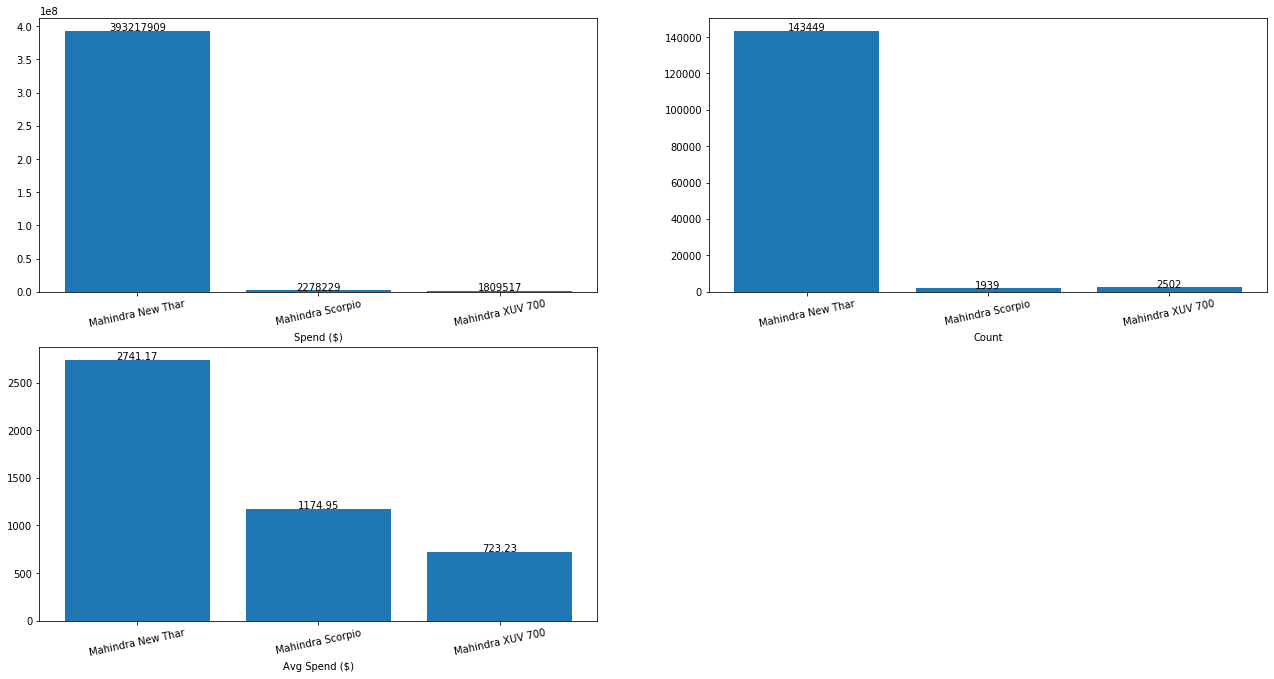

In [297]:
bar(p[0])

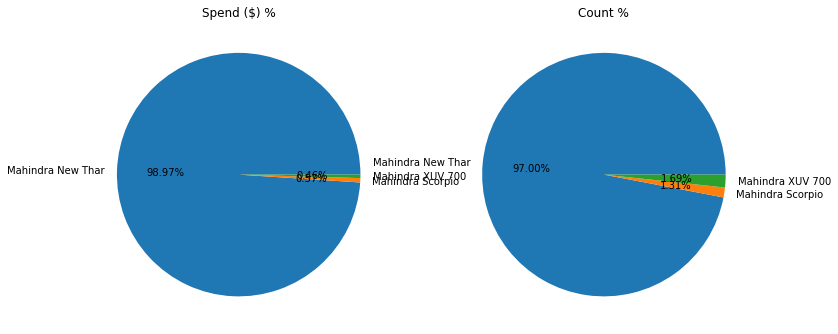

In [298]:
pie(p[1])

### `Products:`
- #### Out of total advertisements ran by Mahindra and Mahindra brand,  97% of Advs were for the promotion of Thar, also out of total budget 99% was spend for this product.


In [299]:
display_side_by_side(q[0],q[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Quarters 
 
 
 
 
 
 
 
 Q1 
 129215380 
 43371 
 2979.30 
 
 
 Q2 
 99500908 
 46244 
 2151.65 
 
 
 Q3 
 95196781 
 39537 
 2407.79 
 
 
 Q4 
 73392586 
 18738 
 3916.78 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Quarters 
 
 
 
 
 
 
 Q1 
 32.522915 
 29.326526 
 
 
 Q2 
 25.043919 
 31.269187 
 
 
 Q3 
 23.960590 
 26.734059 
 
 
 Q4 
 18.472575 
 12.670228

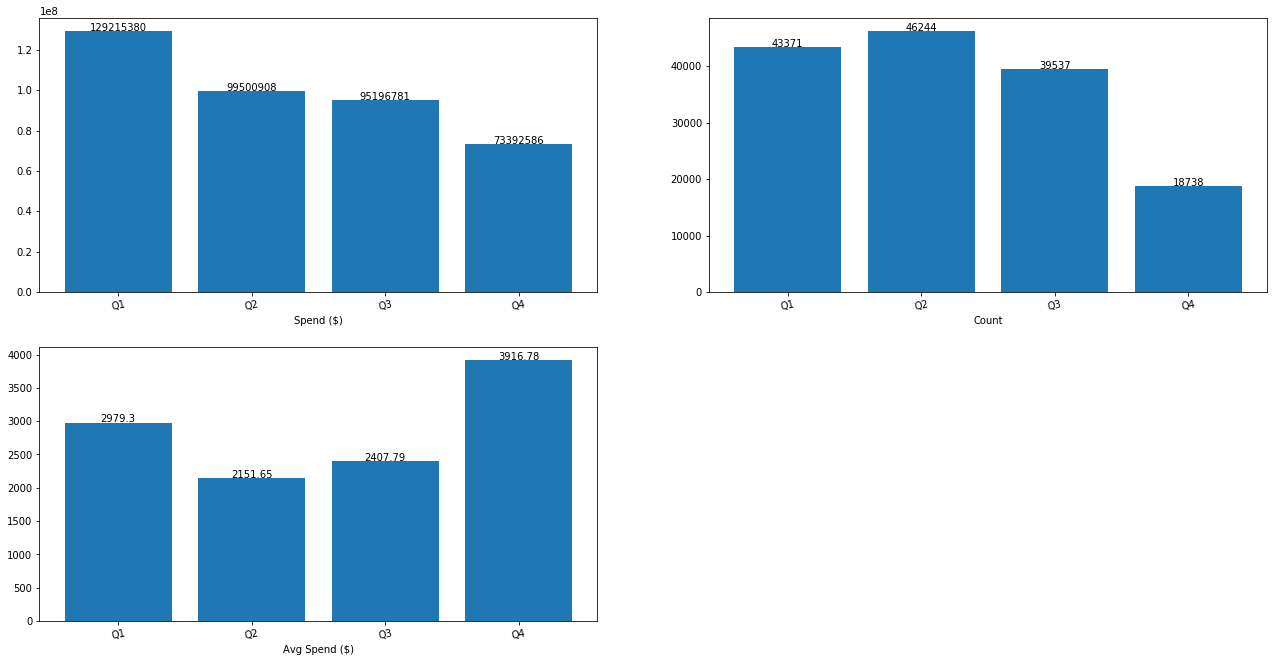

In [300]:
bar(q[0])


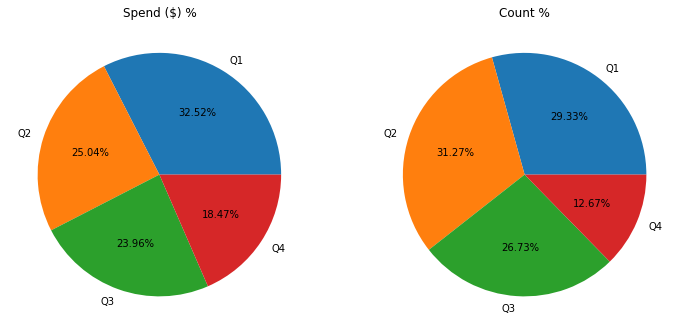

In [301]:
pie(q[1])



### `Quarters:`
- #### During the Q2, Mahindra and Mahindra ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.
- #### During Q4, Mahindra and Mahindra has heighest per Adv spend.


In [302]:
display_side_by_side(d[0],d[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Dayparts 
 
 
 
 
 
 
 
 DAYTIME 
 64154402 
 33552 
 1912.09 
 
 
 EARLY FRINGE 
 19204408 
 9335 
 2057.25 
 
 
 EARLY MORNING 
 12119383 
 13999 
 865.73 
 
 
 EVENING NEWS 
 16018235 
 4549 
 3521.27 
 
 
 LATE FRINGE 
 41781609 
 24468 
 1707.60 
 
 
 OVERNIGHT 
 8597788 
 6480 
 1326.82 
 
 
 PRIME ACCESS 
 10299276 
 4038 
 2550.59 
 
 
 PRIME TIME 
 152713257 
 28302 
 5395.85 
 
 
 WEEKEND 
 72417297 
 23167 
 3125.88 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Dayparts 
 
 
 
 
 
 
 DAYTIME 
 16.147367 
 22.687132 
 
 
 EARLY FRINGE 
 4.833661 
 6.312124 
 
 
 EARLY MORNING 
 3.050393 
 9.465819 
 
 
 EVENING NEWS 
 4.031716 
 3.075935 
 
 
 LATE FRINGE 
 10.516238 
 16.544729 
 
 
 OVERNIGHT 
 2.164024 
 4.381635 
 
 
 PRIME ACCESS 
 2.592280 
 2.730408 
 
 
 PRIME TIME 
 38.437222 
 19.137197 
 
 
 WEEKEND 
 18.227099 
 15.665021

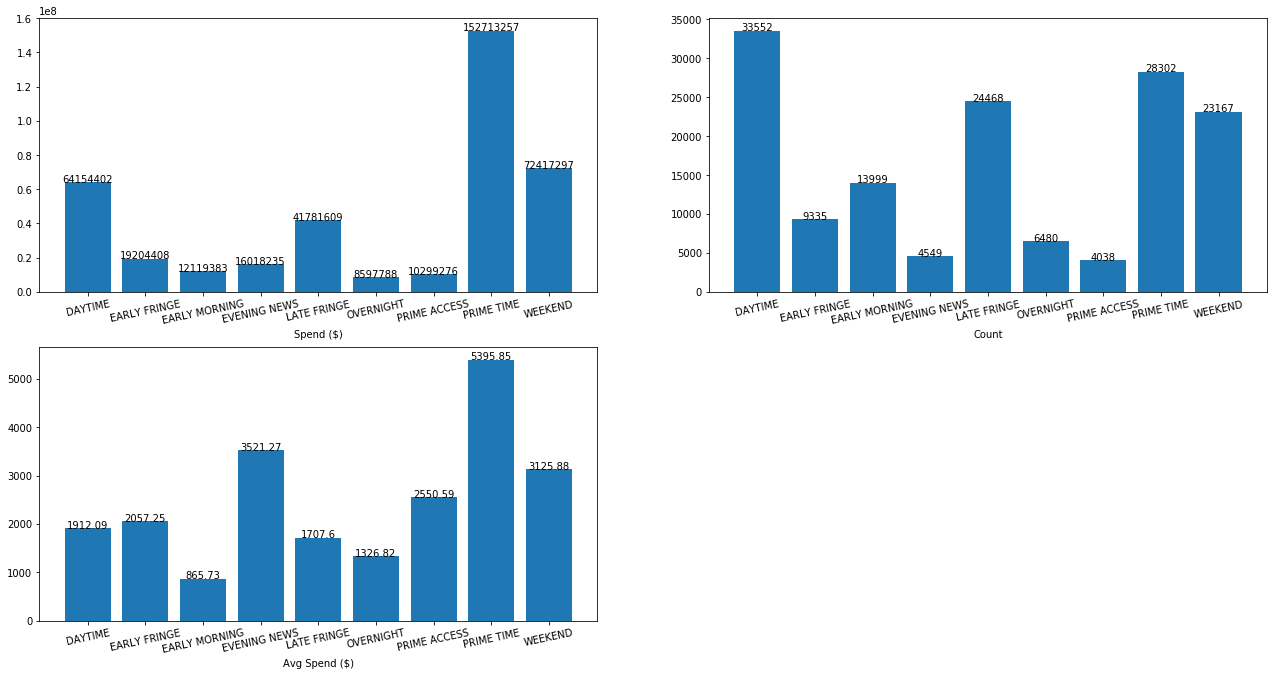

In [303]:
bar(d[0])


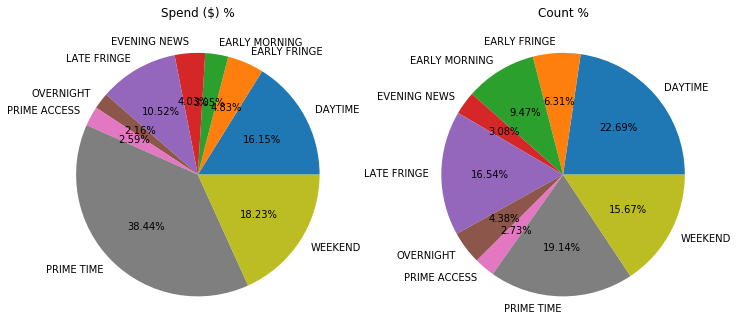

In [304]:
pie(d[1])


### `Dayparts:`
- #### Mahindra and Mahindra prefer to run their advs during the Daytime, Weekend, Primetime and late-fringe shows.
- #### For the primetime show, Mahindra and Mahindra spend 38% of it's budget, and for the weekend show 18%, for the daytime show 16%.

In [305]:
display_side_by_side(t[0],t[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 TimeZone 
 
 
 
 
 
 
 
 Central India 
 951460 
 205 
 4641.27 
 
 
 Northeast India 
 375103729 
 144949 
 2587.83 
 
 
 Northern India 
 191725 
 35 
 5477.86 
 
 
 Southern India 
 21058741 
 2701 
 7796.65 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 TimeZone 
 
 
 
 
 
 
 Central India 
 0.239478 
 0.138617 
 
 
 Northeast India 
 94.411878 
 98.011360 
 
 
 Northern India 
 0.048256 
 0.023666 
 
 
 Southern India 
 5.300388 
 1.826357

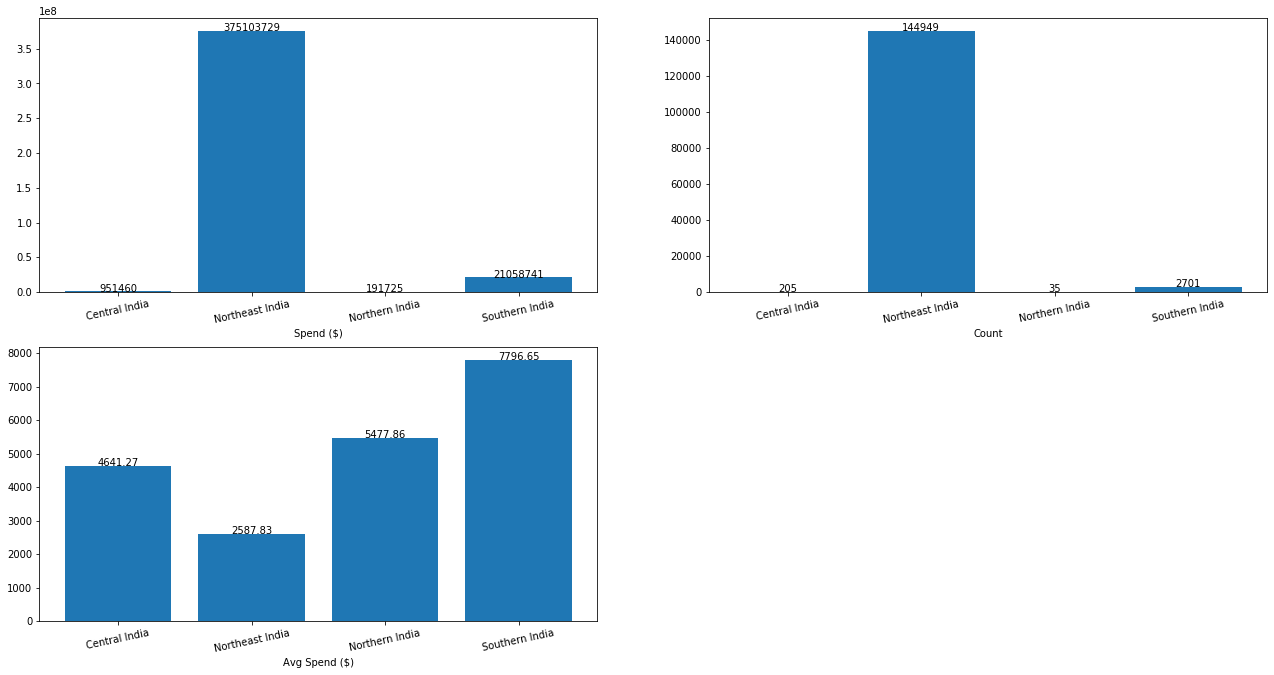

In [306]:
bar(t[0])

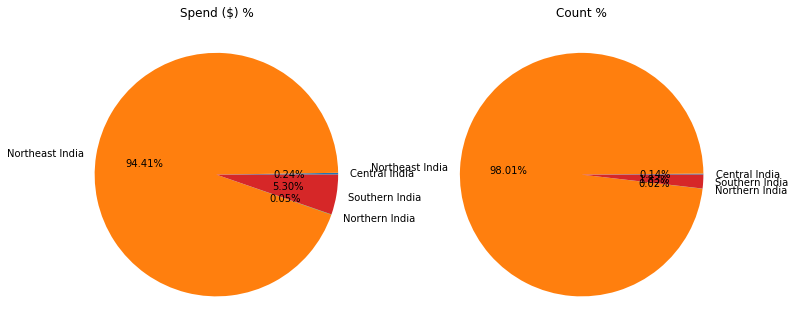

In [307]:
pie(t[1])


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 94% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Southern India & Northern India timezone is higher than other timezones.


In [308]:
display_side_by_side(n[0],n[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Network Type 
 
 
 
 
 
 
 
 broadcast 
 181166689 
 13814 
 13114.72 
 
 
 cable 
 216138966 
 134076 
 1612.06 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Network Type 
 
 
 
 
 
 
 broadcast 
 45.59882 
 9.340726 
 
 
 cable 
 54.40118 
 90.659274

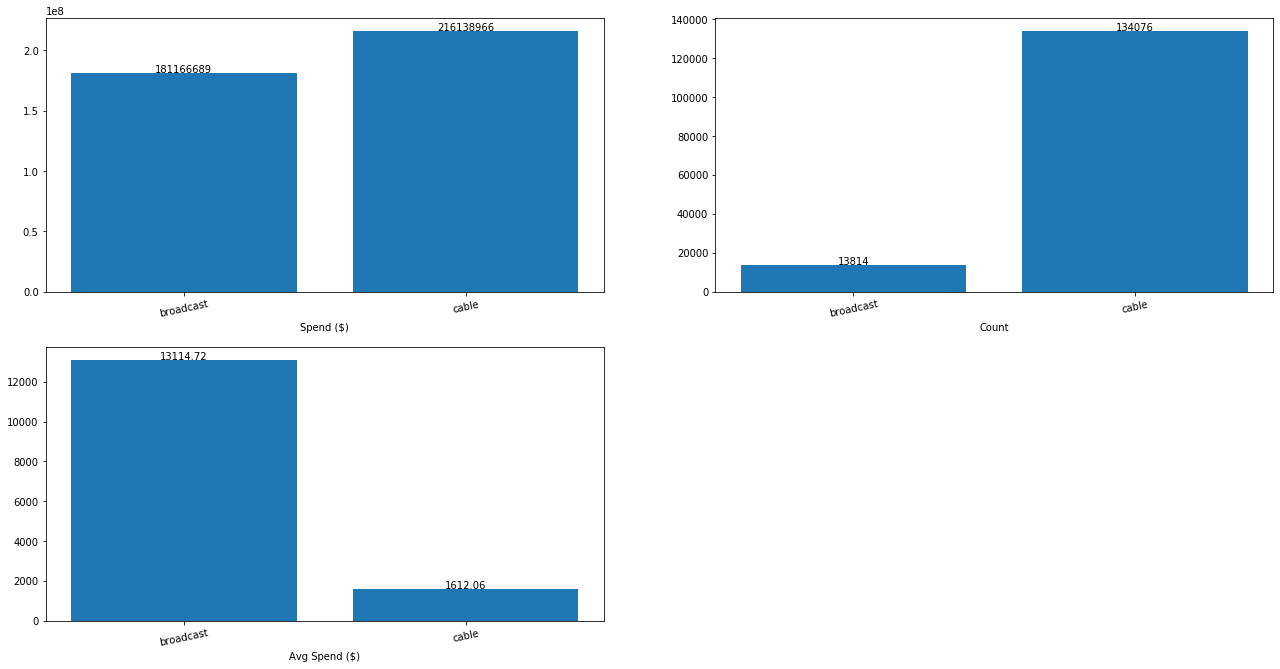

In [309]:
bar(n[0])

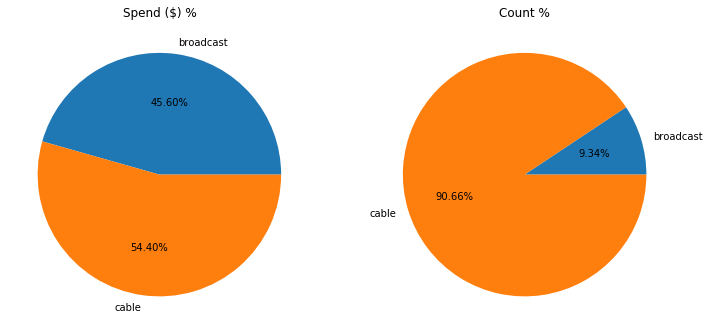

In [310]:
pie(n[1])

### `Network:`
- #### 90% of the Advs were ran on the Cable network, and 54% of the budget were allocated for this network.
- #### Though the spend on the cable network is bit higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

### `Products:`
- #### Mahindra and Mahindra has 3 products, they are 'Mahindra XUV 700', 'Mahindra New Thar', 'Mahindra Scorpio'
- #### 210 times Mahindra and Mahindra's advertisements were at Pod position 1 without spending a singel penny.
- #### Mahindra and Mahindra spend most for promoting `Mahindra New Thar`, on 04-04-2021 at PRIME TIME show.
- #### Out of total advertisements ran by Mahindra and Mahindra brand,  97% of Advs were for the promotion of Thar, also out of total budget 99% was spend for this product.



### `Quarters:`
- #### During the Q2, Mahindra and Mahindra ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.
- #### During Q4, Mahindra and Mahindra has heighest per Adv spend.


### `Dayparts:`
- #### Mahindra and Mahindra prefer to run their advs during the Daytime, Weekend, Primetime and late-fringe shows.
- #### For the primetime show, Mahindra and Mahindra spend 38% of it's budget, and for the weekend show 18%, for the daytime show 16%.


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 94% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Southern India & Northern India timezone is higher than other timezones.


### `Network:`
- #### 90% of the Advs were ran on the Cable network, and 54% of the budget were allocated for this network.
- #### Though the spend on the cable network is bit higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

# Competitive analysis

In [311]:
sca

Spend ($)   Count  Avg Spend ($)  Max Spend ($)  Min Spend ($)
Brand                                                                                
Honda Cars              48258340   85265         565.98          72902              0
Hyundai Motors India   180808756   71296        2536.03        5500000              0
Mahindra and Mahindra  397305655  147890        2686.49         103048              0
Maruti Suzuki          558646472  280274        1993.22          91596              0
Tata Motors             94790227   81041        1169.66          83935              0
Toyota                 112653112   66018        1706.40          92140              0

In [312]:
def competitive_analysis1(col_name):
    sca=data.pivot_table(values ='Spend ($)',index=['Brand'],aggfunc='sum')
    ps=data.pivot_table(values ='Spend ($)',index=[col_name,'Brand'],aggfunc='sum')
    total = []
    for i in range(len(ps)):
        total.append(sca.loc[sca.index == ps.index[i][1] ,:]['Spend ($)'].values[0])
    ps['Spend ($)'] = round(100*(ps['Spend ($)'] /total),2)
    ps.rename(columns = {'Spend ($)':'Spend ($) %'}, inplace = True)


    sca=data.pivot_table(values ='Spend ($)',index=['Brand'],aggfunc='count')
    pc=data.pivot_table(values ='Spend ($)',index=[col_name,'Brand'],aggfunc='count')
    count = []
    for i in range(len(pc)):
        count.append(sca.loc[sca.index == pc.index[i][1] ,:]['Spend ($)'].values[0])
    pc['Spend ($)'] = round(100*(pc['Spend ($)'] /count),2)
    pc.rename(columns = {'Spend ($)':'Count %'}, inplace = True)
    
    pa=data.pivot_table(values ='Spend ($)',index=[col_name,'Brand'],aggfunc='count')
    pa.rename(columns = {'Spend ($)':'Average Spend ($)'}, inplace = True)

    
    return display_side_by_side(pc,ps,pa,titles=['Count %','Spend %','Average Spend'])

In [313]:
def competitive_analysis2(col_name):
    sca=data.pivot_table(values ='Spend ($)',index=[col_name],aggfunc='sum')
    ps=data.pivot_table(values ='Spend ($)',index=[col_name,'Brand'],aggfunc='sum')
    total = []
    for i in range(len(ps)):
        total.append(sca.loc[sca.index == ps.index[i][0] ,:]['Spend ($)'].values[0])
    ps['Spend ($)'] = round(100*(ps['Spend ($)'] /total),2)
    ps.rename(columns = {'Spend ($)':'Spend ($) %'}, inplace = True)


    sca=data.pivot_table(values ='Spend ($)',index=[col_name],aggfunc='count')
    pc=data.pivot_table(values ='Spend ($)',index=[col_name,'Brand'],aggfunc='count')
    count = []
    for i in range(len(pc)):
        count.append(sca.loc[sca.index == pc.index[i][0] ,:]['Spend ($)'].values[0])
    pc['Spend ($)'] = round(100*(pc['Spend ($)'] /count),2)
    pc.rename(columns = {'Spend ($)':'Count %'}, inplace = True)
    
    #pa=data.pivot_table(values ='Spend ($)',index=[col_name,'Brand'],aggfunc='count')
    #pa.rename(columns = {'Spend ($)':'Average Spend ($)'}, inplace = True)

    
    return display_side_by_side(pc,ps,titles=['Count %','Spend %'])

In [314]:
def competitive_analysis3(col_name):
    ps=data.pivot_table(values ='Spend ($)',index=[col_name,'Brand'],aggfunc='sum')
    ps['Spend ($)'] = round((100*ps['Spend ($)'])/ps['Spend ($)'].sum(),2)
    ps.rename(columns = {'Spend ($)':'Spend ($) %'}, inplace = True)


    pc=data.pivot_table(values ='Spend ($)',index=[col_name,'Brand'],aggfunc='count')
    pc['Spend ($)'] = round((100*pc['Spend ($)'])/pc['Spend ($)'].sum(),2)
    pc.rename(columns = {'Spend ($)':'Count %'}, inplace = True)

    
    return display_side_by_side(pc,ps,titles=['Count %','Spend %'])

### <u>`Quarters:`

In [315]:
competitive_analysis1('Quarters')

Count % 
 
 
 
 
 Count % 
 
 
 Quarters 
 Brand 
 
 
 
 
 
 Q1 
 Honda Cars 
 30.41 
 
 
 Hyundai Motors India 
 31.41 
 
 
 Mahindra and Mahindra 
 29.33 
 
 
 Maruti Suzuki 
 29.39 
 
 
 Tata Motors 
 25.52 
 
 
 Toyota 
 27.59 
 
 
 Q2 
 Honda Cars 
 22.74 
 
 
 Hyundai Motors India 
 26.12 
 
 
 Mahindra and Mahindra 
 31.27 
 
 
 Maruti Suzuki 
 25.58 
 
 
 Tata Motors 
 18.47 
 
 
 Toyota 
 33.45 
 
 
 Q3 
 Honda Cars 
 27.00 
 
 
 Hyundai Motors India 
 23.12 
 
 
 Mahindra and Mahindra 
 26.73 
 
 
 Maruti Suzuki 
 23.62 
 
 
 Tata Motors 
 18.40 
 
 
 Toyota 
 29.81 
 
 
 Q4 
 Honda Cars 
 19.85 
 
 
 Hyundai Motors India 
 19.35 
 
 
 Mahindra and Mahindra 
 12.67 
 
 
 Maruti Suzuki 
 21.41 
 
 
 Tata Motors 
 37.61 
 
 
 Toyota 
 9.16 
 
 
 Spend % 
 
 
 
 
 Spend ($) % 
 
 
 Quarters 
 Brand 
 
 
 
 
 
 Q1 
 Honda Cars 
 35.15 
 
 
 Hyundai Motors India 
 34.55 
 
 
 Mahindra and Mahindra 
 32.52 
 
 
 Maruti Suzuki 
 32.76 
 
 
 Tata Motors 
 27.21 
 
 
 Toyota 
 35.82 
 
 
 Q2 
 Honda Cars 
 19.79 
 
 
 Hyundai Motors India 
 22.58 
 
 
 Mahindra and Mahindra 
 25.04 
 
 
 Maruti Suzuki 
 23.13 
 
 
 Tata Motors 
 17.31 
 
 
 Toyota 
 26.20 
 
 
 Q3 
 Honda Cars 
 25.02 
 
 
 Hyundai Motors India 
 21.42 
 
 
 Mahindra and Mahindra 
 23.96 
 
 
 Maruti Suzuki 
 22.35 
 
 
 Tata Motors 
 16.70 
 
 
 Toyota 
 25.23 
 
 
 Q4 
 Honda Cars 
 20.04 
 
 
 Hyundai Motors India 
 21.45 
 
 
 Mahindra and Mahindra 
 18.47 
 
 
 Maruti Suzuki 
 21.76 
 
 
 Tata Motors 
 38.77 
 
 
 Toyota 
 12.75 
 
 
 Average Spend 
 
 
 
 
 Average Spend ($) 
 
 
 Quarters 
 Brand 
 
 
 
 
 
 Q1 
 Honda Cars 
 25929 
 
 
 Hyundai Motors India 
 22396 
 
 
 Mahindra and Mahindra 
 43371 
 
 
 Maruti Suzuki 
 82381 
 
 
 Tata Motors 
 20679 
 
 
 Toyota 
 18212 
 
 
 Q2 
 Honda Cars 
 19388 
 
 
 Hyundai Motors India 
 18623 
 
 
 Mahindra and Mahindra 
 46244 
 
 
 Maruti Suzuki 
 71695 
 
 
 Tata Motors 
 14967 
 
 
 Toyota 
 22083 
 
 
 Q3 
 Honda Cars 
 23020 
 
 
 Hyundai Motors India 
 16484 
 
 
 Mahindra and Mahindra 
 39537 
 
 
 Maruti Suzuki 
 66196 
 
 
 Tata Motors 
 14912 
 
 
 Toyota 
 19678 
 
 
 Q4 
 Honda Cars 
 16928 
 
 
 Hyundai Motors India 
 13793 
 
 
 Mahindra and Mahindra 
 18738 
 
 
 Maruti Suzuki 
 60002 
 
 
 Tata Motors 
 30483 
 
 
 Toyota 
 6045

In [316]:
competitive_analysis2('Quarters')

Count % 
 
 
 
 
 Count % 
 
 
 Quarters 
 Brand 
 
 
 
 
 
 Q1 
 Honda Cars 
 12.18 
 
 
 Hyundai Motors India 
 10.52 
 
 
 Mahindra and Mahindra 
 20.37 
 
 
 Maruti Suzuki 
 38.68 
 
 
 Tata Motors 
 9.71 
 
 
 Toyota 
 8.55 
 
 
 Q2 
 Honda Cars 
 10.05 
 
 
 Hyundai Motors India 
 9.65 
 
 
 Mahindra and Mahindra 
 23.96 
 
 
 Maruti Suzuki 
 37.15 
 
 
 Tata Motors 
 7.75 
 
 
 Toyota 
 11.44 
 
 
 Q3 
 Honda Cars 
 12.80 
 
 
 Hyundai Motors India 
 9.17 
 
 
 Mahindra and Mahindra 
 21.99 
 
 
 Maruti Suzuki 
 36.81 
 
 
 Tata Motors 
 8.29 
 
 
 Toyota 
 10.94 
 
 
 Q4 
 Honda Cars 
 11.60 
 
 
 Hyundai Motors India 
 9.45 
 
 
 Mahindra and Mahindra 
 12.84 
 
 
 Maruti Suzuki 
 41.10 
 
 
 Tata Motors 
 20.88 
 
 
 Toyota 
 4.14 
 
 
 Spend % 
 
 
 
 
 Spend ($) % 
 
 
 Quarters 
 Brand 
 
 
 
 
 
 Q1 
 Honda Cars 
 3.71 
 
 
 Hyundai Motors India 
 13.65 
 
 
 Mahindra and Mahindra 
 28.22 
 
 
 Maruti Suzuki 
 39.98 
 
 
 Tata Motors 
 5.63 
 
 
 Toyota 
 8.81 
 
 
 Q2 
 Honda Cars 
 2.94 
 
 
 Hyundai Motors India 
 12.56 
 
 
 Mahindra and Mahindra 
 30.61 
 
 
 Maruti Suzuki 
 39.76 
 
 
 Tata Motors 
 5.05 
 
 
 Toyota 
 9.08 
 
 
 Q3 
 Honda Cars 
 3.83 
 
 
 Hyundai Motors India 
 12.29 
 
 
 Mahindra and Mahindra 
 30.21 
 
 
 Maruti Suzuki 
 39.62 
 
 
 Tata Motors 
 5.02 
 
 
 Toyota 
 9.02 
 
 
 Q4 
 Honda Cars 
 3.28 
 
 
 Hyundai Motors India 
 13.17 
 
 
 Mahindra and Mahindra 
 24.92 
 
 
 Maruti Suzuki 
 41.27 
 
 
 Tata Motors 
 12.48 
 
 
 Toyota 
 4.88

In [317]:
competitive_analysis3('Quarters')

Count % 
 
 
 
 
 Count % 
 
 
 Quarters 
 Brand 
 
 
 
 
 
 Q1 
 Honda Cars 
 3.54 
 
 
 Hyundai Motors India 
 3.06 
 
 
 Mahindra and Mahindra 
 5.93 
 
 
 Maruti Suzuki 
 11.26 
 
 
 Tata Motors 
 2.83 
 
 
 Toyota 
 2.49 
 
 
 Q2 
 Honda Cars 
 2.65 
 
 
 Hyundai Motors India 
 2.54 
 
 
 Mahindra and Mahindra 
 6.32 
 
 
 Maruti Suzuki 
 9.80 
 
 
 Tata Motors 
 2.05 
 
 
 Toyota 
 3.02 
 
 
 Q3 
 Honda Cars 
 3.15 
 
 
 Hyundai Motors India 
 2.25 
 
 
 Mahindra and Mahindra 
 5.40 
 
 
 Maruti Suzuki 
 9.05 
 
 
 Tata Motors 
 2.04 
 
 
 Toyota 
 2.69 
 
 
 Q4 
 Honda Cars 
 2.31 
 
 
 Hyundai Motors India 
 1.88 
 
 
 Mahindra and Mahindra 
 2.56 
 
 
 Maruti Suzuki 
 8.20 
 
 
 Tata Motors 
 4.17 
 
 
 Toyota 
 0.83 
 
 
 Spend % 
 
 
 
 
 Spend ($) % 
 
 
 Quarters 
 Brand 
 
 
 
 
 
 Q1 
 Honda Cars 
 1.22 
 
 
 Hyundai Motors India 
 4.49 
 
 
 Mahindra and Mahindra 
 9.28 
 
 
 Maruti Suzuki 
 13.14 
 
 
 Tata Motors 
 1.85 
 
 
 Toyota 
 2.90 
 
 
 Q2 
 Honda Cars 
 0.69 
 
 
 Hyundai Motors India 
 2.93 
 
 
 Mahindra and Mahindra 
 7.15 
 
 
 Maruti Suzuki 
 9.28 
 
 
 Tata Motors 
 1.18 
 
 
 Toyota 
 2.12 
 
 
 Q3 
 Honda Cars 
 0.87 
 
 
 Hyundai Motors India 
 2.78 
 
 
 Mahindra and Mahindra 
 6.84 
 
 
 Maruti Suzuki 
 8.96 
 
 
 Tata Motors 
 1.14 
 
 
 Toyota 
 2.04 
 
 
 Q4 
 Honda Cars 
 0.69 
 
 
 Hyundai Motors India 
 2.79 
 
 
 Mahindra and Mahindra 
 5.27 
 
 
 Maruti Suzuki 
 8.73 
 
 
 Tata Motors 
 2.64 
 
 
 Toyota 
 1.03

### <u>`Dayparts:`

In [318]:
competitive_analysis1('Dayparts')

Count % 
 
 
 
 
 Count % 
 
 
 Dayparts 
 Brand 
 
 
 
 
 
 DAYTIME 
 Honda Cars 
 32.88 
 
 
 Hyundai Motors India 
 17.51 
 
 
 Mahindra and Mahindra 
 22.69 
 
 
 Maruti Suzuki 
 17.77 
 
 
 Tata Motors 
 21.90 
 
 
 Toyota 
 26.35 
 
 
 EARLY FRINGE 
 Honda Cars 
 8.28 
 
 
 Hyundai Motors India 
 6.13 
 
 
 Mahindra and Mahindra 
 6.31 
 
 
 Maruti Suzuki 
 6.11 
 
 
 Tata Motors 
 6.60 
 
 
 Toyota 
 6.98 
 
 
 EARLY MORNING 
 Honda Cars 
 17.45 
 
 
 Hyundai Motors India 
 11.44 
 
 
 Mahindra and Mahindra 
 9.47 
 
 
 Maruti Suzuki 
 12.52 
 
 
 Tata Motors 
 11.38 
 
 
 Toyota 
 13.34 
 
 
 EVENING NEWS 
 Honda Cars 
 3.60 
 
 
 Hyundai Motors India 
 3.38 
 
 
 Mahindra and Mahindra 
 3.08 
 
 
 Maruti Suzuki 
 3.56 
 
 
 Tata Motors 
 3.71 
 
 
 Toyota 
 3.84 
 
 
 LATE FRINGE 
 Honda Cars 
 7.23 
 
 
 Hyundai Motors India 
 14.33 
 
 
 Mahindra and Mahindra 
 16.54 
 
 
 Maruti Suzuki 
 16.14 
 
 
 Tata Motors 
 13.74 
 
 
 Toyota 
 11.69 
 
 
 OVERNIGHT 
 Honda Cars 
 6.70 
 
 
 Hyundai Motors India 
 9.29 
 
 
 Mahindra and Mahindra 
 4.38 
 
 
 Maruti Suzuki 
 9.71 
 
 
 Tata Motors 
 7.18 
 
 
 Toyota 
 5.24 
 
 
 PRIME ACCESS 
 Honda Cars 
 2.23 
 
 
 Hyundai Motors India 
 4.17 
 
 
 Mahindra and Mahindra 
 2.73 
 
 
 Maruti Suzuki 
 3.38 
 
 
 Tata Motors 
 3.74 
 
 
 Toyota 
 3.56 
 
 
 PRIME TIME 
 Honda Cars 
 9.84 
 
 
 Hyundai Motors India 
 18.95 
 
 
 Mahindra and Mahindra 
 19.14 
 
 
 Maruti Suzuki 
 17.03 
 
 
 Tata Motors 
 16.72 
 
 
 Toyota 
 13.94 
 
 
 WEEKEND 
 Honda Cars 
 11.80 
 
 
 Hyundai Motors India 
 14.82 
 
 
 Mahindra and Mahindra 
 15.67 
 
 
 Maruti Suzuki 
 13.78 
 
 
 Tata Motors 
 15.03 
 
 
 Toyota 
 15.06 
 
 
 Spend % 
 
 
 
 
 Spend ($) % 
 
 
 Dayparts 
 Brand 
 
 
 
 
 
 DAYTIME 
 Honda Cars 
 31.30 
 
 
 Hyundai Motors India 
 6.84 
 
 
 Mahindra and Mahindra 
 16.15 
 
 
 Maruti Suzuki 
 8.71 
 
 
 Tata Motors 
 17.42 
 
 
 Toyota 
 16.48 
 
 
 EARLY FRINGE 
 Honda Cars 
 11.94 
 
 
 Hyundai Motors India 
 3.96 
 
 
 Mahindra and Mahindra 
 4.83 
 
 
 Maruti Suzuki 
 4.07 
 
 
 Tata Motors 
 6.39 
 
 
 Toyota 
 8.65 
 
 
 EARLY MORNING 
 Honda Cars 
 10.76 
 
 
 Hyundai Motors India 
 4.82 
 
 
 Mahindra and Mahindra 
 3.05 
 
 
 Maruti Suzuki 
 5.18 
 
 
 Tata Motors 
 7.50 
 
 
 Toyota 
 7.36 
 
 
 EVENING NEWS 
 Honda Cars 
 4.36 
 
 
 Hyundai Motors India 
 2.97 
 
 
 Mahindra and Mahindra 
 4.03 
 
 
 Maruti Suzuki 
 3.72 
 
 
 Tata Motors 
 6.15 
 
 
 Toyota 
 4.80 
 
 
 LATE FRINGE 
 Honda Cars 
 7.09 
 
 
 Hyundai Motors India 
 7.55 
 
 
 Mahindra and Mahindra 
 10.52 
 
 
 Maruti Suzuki 
 13.26 
 
 
 Tata Motors 
 11.77 
 
 
 Toyota 
 7.87 
 
 
 OVERNIGHT 
 Honda Cars 
 5.84 
 
 
 Hyundai Motors India 
 1.76 
 
 
 Mahindra and Mahindra 
 2.16 
 
 
 Maruti Suzuki 
 4.23 
 
 
 Tata Motors 
 2.69 
 
 
 Toyota 
 1.52 
 
 
 PRIME ACCESS 
 Honda Cars 
 2.80 
 
 
 Hyundai Motors India 
 4.27 
 
 
 Mahindra and Mahindra 
 2.59 
 
 
 Maruti Suzuki 
 5.19 
 
 
 Tata Motors 
 6.12 
 
 
 Toyota 
 7.97 
 
 
 PRIME TIME 
 Honda Cars 
 14.51 
 
 
 Hyundai Motors India 
 47.97 
 
 
 Mahindra and Mahindra 
 38.44 
 
 
 Maruti Suzuki 
 38.24 
 
 
 Tata Motors 
 27.06 
 
 
 Toyota 
 21.43 
 
 
 WEEKEND 
 Honda Cars 
 11.39 
 
 
 Hyundai Motors India 
 19.88 
 
 
 Mahindra and Mahindra 
 18.23 
 
 
 Maruti Suzuki 
 17.40 
 
 
 Tata Motors 
 14.89 
 
 
 Toyota 
 23.91 
 
 
 Average Spend 
 
 
 
 
 Average Spend ($) 
 
 
 Dayparts 
 Brand 
 
 
 
 
 
 DAYTIME 
 Honda Cars 
 28031 
 
 
 Hyundai Motors India 
 12485 
 
 
 Mahindra and Mahindra 
 33552 
 
 
 Maruti Suzuki 
 49811 
 
 
 Tata Motors 
 17745 
 
 
 Toyota 
 17393 
 
 
 EARLY FRINGE 
 Honda Cars 
 7056 
 
 
 Hyundai Motors India 
 4367 
 
 
 Mahindra and Mahindra 
 9335 
 
 
 Maruti Suzuki 
 17124 
 
 
 Tata Motors 
 5346 
 
 
 Toyota 
 4611 
 
 
 EARLY MORNING 
 Honda Cars 
 14877 
 
 
 Hyundai Motors India 
 8153 
 
 
 Mahindra and Mahindra 
 13999 
 
 
 Maruti Suzuki 
 35078 
 
 
 Tata Motors 
 9226 
 
 
 Toyota 
 8807

In [319]:
competitive_analysis2('Dayparts')

Count % 
 
 
 
 
 Count % 
 
 
 Dayparts 
 Brand 
 
 
 
 
 
 DAYTIME 
 Honda Cars 
 17.63 
 
 
 Hyundai Motors India 
 7.85 
 
 
 Mahindra and Mahindra 
 21.10 
 
 
 Maruti Suzuki 
 31.32 
 
 
 Tata Motors 
 11.16 
 
 
 Toyota 
 10.94 
 
 
 EARLY FRINGE 
 Honda Cars 
 14.75 
 
 
 Hyundai Motors India 
 9.13 
 
 
 Mahindra and Mahindra 
 19.51 
 
 
 Maruti Suzuki 
 35.80 
 
 
 Tata Motors 
 11.17 
 
 
 Toyota 
 9.64 
 
 
 EARLY MORNING 
 Honda Cars 
 16.50 
 
 
 Hyundai Motors India 
 9.04 
 
 
 Mahindra and Mahindra 
 15.53 
 
 
 Maruti Suzuki 
 38.92 
 
 
 Tata Motors 
 10.24 
 
 
 Toyota 
 9.77 
 
 
 EVENING NEWS 
 Honda Cars 
 12.01 
 
 
 Hyundai Motors India 
 9.44 
 
 
 Mahindra and Mahindra 
 17.81 
 
 
 Maruti Suzuki 
 39.03 
 
 
 Tata Motors 
 11.78 
 
 
 Toyota 
 9.93 
 
 
 LATE FRINGE 
 Honda Cars 
 5.88 
 
 
 Hyundai Motors India 
 9.73 
 
 
 Mahindra and Mahindra 
 23.32 
 
 
 Maruti Suzuki 
 43.10 
 
 
 Tata Motors 
 10.61 
 
 
 Toyota 
 7.35 
 
 
 OVERNIGHT 
 Honda Cars 
 10.33 
 
 
 Hyundai Motors India 
 11.97 
 
 
 Mahindra and Mahindra 
 11.71 
 
 
 Maruti Suzuki 
 49.22 
 
 
 Tata Motors 
 10.52 
 
 
 Toyota 
 6.25 
 
 
 PRIME ACCESS 
 Honda Cars 
 8.01 
 
 
 Hyundai Motors India 
 12.50 
 
 
 Mahindra and Mahindra 
 16.99 
 
 
 Maruti Suzuki 
 39.86 
 
 
 Tata Motors 
 12.75 
 
 
 Toyota 
 9.90 
 
 
 PRIME TIME 
 Honda Cars 
 6.95 
 
 
 Hyundai Motors India 
 11.19 
 
 
 Mahindra and Mahindra 
 23.45 
 
 
 Maruti Suzuki 
 39.55 
 
 
 Tata Motors 
 11.23 
 
 
 Toyota 
 7.63 
 
 
 WEEKEND 
 Honda Cars 
 9.62 
 
 
 Hyundai Motors India 
 10.11 
 
 
 Mahindra and Mahindra 
 22.16 
 
 
 Maruti Suzuki 
 36.95 
 
 
 Tata Motors 
 11.65 
 
 
 Toyota 
 9.51 
 
 
 Spend % 
 
 
 
 
 Spend ($) % 
 
 
 Dayparts 
 Brand 
 
 
 
 
 
 DAYTIME 
 Honda Cars 
 8.61 
 
 
 Hyundai Motors India 
 7.05 
 
 
 Mahindra and Mahindra 
 36.58 
 
 
 Maruti Suzuki 
 27.76 
 
 
 Tata Motors 
 9.42 
 
 
 Toyota 
 10.58 
 
 
 EARLY FRINGE 
 Honda Cars 
 8.16 
 
 
 Hyundai Motors India 
 10.13 
 
 
 Mahindra and Mahindra 
 27.17 
 
 
 Maruti Suzuki 
 32.18 
 
 
 Tata Motors 
 8.57 
 
 
 Toyota 
 13.79 
 
 
 EARLY MORNING 
 Honda Cars 
 7.38 
 
 
 Hyundai Motors India 
 12.38 
 
 
 Mahindra and Mahindra 
 17.23 
 
 
 Maruti Suzuki 
 41.11 
 
 
 Tata Motors 
 10.11 
 
 
 Toyota 
 11.79 
 
 
 EVENING NEWS 
 Honda Cars 
 3.79 
 
 
 Hyundai Motors India 
 9.66 
 
 
 Mahindra and Mahindra 
 28.86 
 
 
 Maruti Suzuki 
 37.43 
 
 
 Tata Motors 
 10.50 
 
 
 Toyota 
 9.75 
 
 
 LATE FRINGE 
 Honda Cars 
 2.24 
 
 
 Hyundai Motors India 
 8.92 
 
 
 Mahindra and Mahindra 
 27.32 
 
 
 Maruti Suzuki 
 48.43 
 
 
 Tata Motors 
 7.30 
 
 
 Toyota 
 5.80 
 
 
 OVERNIGHT 
 Honda Cars 
 6.64 
 
 
 Hyundai Motors India 
 7.49 
 
 
 Mahindra and Mahindra 
 20.24 
 
 
 Maruti Suzuki 
 55.59 
 
 
 Tata Motors 
 6.01 
 
 
 Toyota 
 4.04 
 
 
 PRIME ACCESS 
 Honda Cars 
 2.14 
 
 
 Hyundai Motors India 
 12.21 
 
 
 Mahindra and Mahindra 
 16.31 
 
 
 Maruti Suzuki 
 45.95 
 
 
 Tata Motors 
 9.18 
 
 
 Toyota 
 14.22 
 
 
 PRIME TIME 
 Honda Cars 
 1.37 
 
 
 Hyundai Motors India 
 17.01 
 
 
 Mahindra and Mahindra 
 29.95 
 
 
 Maruti Suzuki 
 41.90 
 
 
 Tata Motors 
 5.03 
 
 
 Toyota 
 4.74 
 
 
 WEEKEND 
 Honda Cars 
 2.18 
 
 
 Hyundai Motors India 
 14.26 
 
 
 Mahindra and Mahindra 
 28.72 
 
 
 Maruti Suzuki 
 38.56 
 
 
 Tata Motors 
 5.60 
 
 
 Toyota 
 10.68

In [320]:
competitive_analysis3('Dayparts')

Count % 
 
 
 
 
 Count % 
 
 
 Dayparts 
 Brand 
 
 
 
 
 
 DAYTIME 
 Honda Cars 
 3.83 
 
 
 Hyundai Motors India 
 1.71 
 
 
 Mahindra and Mahindra 
 4.58 
 
 
 Maruti Suzuki 
 6.81 
 
 
 Tata Motors 
 2.42 
 
 
 Toyota 
 2.38 
 
 
 EARLY FRINGE 
 Honda Cars 
 0.96 
 
 
 Hyundai Motors India 
 0.60 
 
 
 Mahindra and Mahindra 
 1.28 
 
 
 Maruti Suzuki 
 2.34 
 
 
 Tata Motors 
 0.73 
 
 
 Toyota 
 0.63 
 
 
 EARLY MORNING 
 Honda Cars 
 2.03 
 
 
 Hyundai Motors India 
 1.11 
 
 
 Mahindra and Mahindra 
 1.91 
 
 
 Maruti Suzuki 
 4.79 
 
 
 Tata Motors 
 1.26 
 
 
 Toyota 
 1.20 
 
 
 EVENING NEWS 
 Honda Cars 
 0.42 
 
 
 Hyundai Motors India 
 0.33 
 
 
 Mahindra and Mahindra 
 0.62 
 
 
 Maruti Suzuki 
 1.36 
 
 
 Tata Motors 
 0.41 
 
 
 Toyota 
 0.35 
 
 
 LATE FRINGE 
 Honda Cars 
 0.84 
 
 
 Hyundai Motors India 
 1.40 
 
 
 Mahindra and Mahindra 
 3.34 
 
 
 Maruti Suzuki 
 6.18 
 
 
 Tata Motors 
 1.52 
 
 
 Toyota 
 1.05 
 
 
 OVERNIGHT 
 Honda Cars 
 0.78 
 
 
 Hyundai Motors India 
 0.90 
 
 
 Mahindra and Mahindra 
 0.89 
 
 
 Maruti Suzuki 
 3.72 
 
 
 Tata Motors 
 0.80 
 
 
 Toyota 
 0.47 
 
 
 PRIME ACCESS 
 Honda Cars 
 0.26 
 
 
 Hyundai Motors India 
 0.41 
 
 
 Mahindra and Mahindra 
 0.55 
 
 
 Maruti Suzuki 
 1.29 
 
 
 Tata Motors 
 0.41 
 
 
 Toyota 
 0.32 
 
 
 PRIME TIME 
 Honda Cars 
 1.15 
 
 
 Hyundai Motors India 
 1.85 
 
 
 Mahindra and Mahindra 
 3.87 
 
 
 Maruti Suzuki 
 6.52 
 
 
 Tata Motors 
 1.85 
 
 
 Toyota 
 1.26 
 
 
 WEEKEND 
 Honda Cars 
 1.37 
 
 
 Hyundai Motors India 
 1.44 
 
 
 Mahindra and Mahindra 
 3.17 
 
 
 Maruti Suzuki 
 5.28 
 
 
 Tata Motors 
 1.66 
 
 
 Toyota 
 1.36 
 
 
 Spend % 
 
 
 
 
 Spend ($) % 
 
 
 Dayparts 
 Brand 
 
 
 
 
 
 DAYTIME 
 Honda Cars 
 1.08 
 
 
 Hyundai Motors India 
 0.89 
 
 
 Mahindra and Mahindra 
 4.61 
 
 
 Maruti Suzuki 
 3.50 
 
 
 Tata Motors 
 1.19 
 
 
 Toyota 
 1.33 
 
 
 EARLY FRINGE 
 Honda Cars 
 0.41 
 
 
 Hyundai Motors India 
 0.51 
 
 
 Mahindra and Mahindra 
 1.38 
 
 
 Maruti Suzuki 
 1.63 
 
 
 Tata Motors 
 0.44 
 
 
 Toyota 
 0.70 
 
 
 EARLY MORNING 
 Honda Cars 
 0.37 
 
 
 Hyundai Motors India 
 0.63 
 
 
 Mahindra and Mahindra 
 0.87 
 
 
 Maruti Suzuki 
 2.08 
 
 
 Tata Motors 
 0.51 
 
 
 Toyota 
 0.60 
 
 
 EVENING NEWS 
 Honda Cars 
 0.15 
 
 
 Hyundai Motors India 
 0.39 
 
 
 Mahindra and Mahindra 
 1.15 
 
 
 Maruti Suzuki 
 1.49 
 
 
 Tata Motors 
 0.42 
 
 
 Toyota 
 0.39 
 
 
 LATE FRINGE 
 Honda Cars 
 0.25 
 
 
 Hyundai Motors India 
 0.98 
 
 
 Mahindra and Mahindra 
 3.00 
 
 
 Maruti Suzuki 
 5.32 
 
 
 Tata Motors 
 0.80 
 
 
 Toyota 
 0.64 
 
 
 OVERNIGHT 
 Honda Cars 
 0.20 
 
 
 Hyundai Motors India 
 0.23 
 
 
 Mahindra and Mahindra 
 0.62 
 
 
 Maruti Suzuki 
 1.70 
 
 
 Tata Motors 
 0.18 
 
 
 Toyota 
 0.12 
 
 
 PRIME ACCESS 
 Honda Cars 
 0.10 
 
 
 Hyundai Motors India 
 0.55 
 
 
 Mahindra and Mahindra 
 0.74 
 
 
 Maruti Suzuki 
 2.08 
 
 
 Tata Motors 
 0.42 
 
 
 Toyota 
 0.64 
 
 
 PRIME TIME 
 Honda Cars 
 0.50 
 
 
 Hyundai Motors India 
 6.23 
 
 
 Mahindra and Mahindra 
 10.97 
 
 
 Maruti Suzuki 
 15.34 
 
 
 Tata Motors 
 1.84 
 
 
 Toyota 
 1.73 
 
 
 WEEKEND 
 Honda Cars 
 0.39 
 
 
 Hyundai Motors India 
 2.58 
 
 
 Mahindra and Mahindra 
 5.20 
 
 
 Maruti Suzuki 
 6.98 
 
 
 Tata Motors 
 1.01 
 
 
 Toyota 
 1.93

### <u>`TimeZone:`

In [321]:
competitive_analysis1('TimeZone')

Count % 
 
 
 
 
 Count % 
 
 
 TimeZone 
 Brand 
 
 
 
 
 
 Central India 
 Honda Cars 
 0.18 
 
 
 Hyundai Motors India 
 0.22 
 
 
 Mahindra and Mahindra 
 0.14 
 
 
 Maruti Suzuki 
 0.47 
 
 
 Tata Motors 
 0.38 
 
 
 Toyota 
 1.51 
 
 
 Northeast India 
 Honda Cars 
 97.62 
 
 
 Hyundai Motors India 
 97.22 
 
 
 Mahindra and Mahindra 
 98.01 
 
 
 Maruti Suzuki 
 96.22 
 
 
 Tata Motors 
 97.35 
 
 
 Toyota 
 93.68 
 
 
 Northern India 
 Honda Cars 
 0.01 
 
 
 Hyundai Motors India 
 0.02 
 
 
 Mahindra and Mahindra 
 0.02 
 
 
 Maruti Suzuki 
 0.01 
 
 
 Tata Motors 
 0.02 
 
 
 Toyota 
 0.01 
 
 
 Southern India 
 Honda Cars 
 2.19 
 
 
 Hyundai Motors India 
 2.54 
 
 
 Mahindra and Mahindra 
 1.83 
 
 
 Maruti Suzuki 
 3.30 
 
 
 Tata Motors 
 2.24 
 
 
 Toyota 
 4.79 
 
 
 Spend % 
 
 
 
 
 Spend ($) % 
 
 
 TimeZone 
 Brand 
 
 
 
 
 
 Central India 
 Honda Cars 
 0.12 
 
 
 Hyundai Motors India 
 0.49 
 
 
 Mahindra and Mahindra 
 0.24 
 
 
 Maruti Suzuki 
 0.33 
 
 
 Tata Motors 
 0.15 
 
 
 Toyota 
 0.90 
 
 
 Northeast India 
 Honda Cars 
 96.83 
 
 
 Hyundai Motors India 
 89.77 
 
 
 Mahindra and Mahindra 
 94.41 
 
 
 Maruti Suzuki 
 91.24 
 
 
 Tata Motors 
 92.34 
 
 
 Toyota 
 88.91 
 
 
 Northern India 
 Honda Cars 
 0.00 
 
 
 Hyundai Motors India 
 0.12 
 
 
 Mahindra and Mahindra 
 0.05 
 
 
 Maruti Suzuki 
 0.07 
 
 
 Tata Motors 
 0.07 
 
 
 Toyota 
 0.18 
 
 
 Southern India 
 Honda Cars 
 3.05 
 
 
 Hyundai Motors India 
 9.62 
 
 
 Mahindra and Mahindra 
 5.30 
 
 
 Maruti Suzuki 
 8.36 
 
 
 Tata Motors 
 7.44 
 
 
 Toyota 
 10.01 
 
 
 Average Spend 
 
 
 
 
 Average Spend ($) 
 
 
 TimeZone 
 Brand 
 
 
 
 
 
 Central India 
 Honda Cars 
 156 
 
 
 Hyundai Motors India 
 159 
 
 
 Mahindra and Mahindra 
 205 
 
 
 Maruti Suzuki 
 1316 
 
 
 Tata Motors 
 309 
 
 
 Toyota 
 999 
 
 
 Northeast India 
 Honda Cars 
 83236 
 
 
 Hyundai Motors India 
 69316 
 
 
 Mahindra and Mahindra 
 144949 
 
 
 Maruti Suzuki 
 269674 
 
 
 Tata Motors 
 78897 
 
 
 Toyota 
 61848 
 
 
 Northern India 
 Honda Cars 
 5 
 
 
 Hyundai Motors India 
 13 
 
 
 Mahindra and Mahindra 
 35 
 
 
 Maruti Suzuki 
 41 
 
 
 Tata Motors 
 17 
 
 
 Toyota 
 7 
 
 
 Southern India 
 Honda Cars 
 1868 
 
 
 Hyundai Motors India 
 1808 
 
 
 Mahindra and Mahindra 
 2701 
 
 
 Maruti Suzuki 
 9243 
 
 
 Tata Motors 
 1818 
 
 
 Toyota 
 3164

In [322]:
competitive_analysis2('TimeZone')

Count % 
 
 
 
 
 Count % 
 
 
 TimeZone 
 Brand 
 
 
 
 
 
 Central India 
 Honda Cars 
 4.96 
 
 
 Hyundai Motors India 
 5.06 
 
 
 Mahindra and Mahindra 
 6.52 
 
 
 Maruti Suzuki 
 41.86 
 
 
 Tata Motors 
 9.83 
 
 
 Toyota 
 31.77 
 
 
 Northeast India 
 Honda Cars 
 11.76 
 
 
 Hyundai Motors India 
 9.79 
 
 
 Mahindra and Mahindra 
 20.48 
 
 
 Maruti Suzuki 
 38.09 
 
 
 Tata Motors 
 11.14 
 
 
 Toyota 
 8.74 
 
 
 Northern India 
 Honda Cars 
 4.24 
 
 
 Hyundai Motors India 
 11.02 
 
 
 Mahindra and Mahindra 
 29.66 
 
 
 Maruti Suzuki 
 34.75 
 
 
 Tata Motors 
 14.41 
 
 
 Toyota 
 5.93 
 
 
 Southern India 
 Honda Cars 
 9.07 
 
 
 Hyundai Motors India 
 8.78 
 
 
 Mahindra and Mahindra 
 13.11 
 
 
 Maruti Suzuki 
 44.86 
 
 
 Tata Motors 
 8.82 
 
 
 Toyota 
 15.36 
 
 
 Spend % 
 
 
 
 
 Spend ($) % 
 
 
 TimeZone 
 Brand 
 
 
 
 
 
 Central India 
 Honda Cars 
 1.16 
 
 
 Hyundai Motors India 
 18.18 
 
 
 Mahindra and Mahindra 
 19.47 
 
 
 Maruti Suzuki 
 37.59 
 
 
 Tata Motors 
 2.82 
 
 
 Toyota 
 20.78 
 
 
 Northeast India 
 Honda Cars 
 3.65 
 
 
 Hyundai Motors India 
 12.66 
 
 
 Mahindra and Mahindra 
 29.27 
 
 
 Maruti Suzuki 
 39.77 
 
 
 Tata Motors 
 6.83 
 
 
 Toyota 
 7.82 
 
 
 Northern India 
 Honda Cars 
 0.10 
 
 
 Hyundai Motors India 
 20.71 
 
 
 Mahindra and Mahindra 
 17.84 
 
 
 Maruti Suzuki 
 36.78 
 
 
 Tata Motors 
 6.19 
 
 
 Toyota 
 18.38 
 
 
 Southern India 
 Honda Cars 
 1.40 
 
 
 Hyundai Motors India 
 16.57 
 
 
 Mahindra and Mahindra 
 20.07 
 
 
 Maruti Suzuki 
 44.49 
 
 
 Tata Motors 
 6.72 
 
 
 Toyota 
 10.74

In [323]:
competitive_analysis3('TimeZone')

Count % 
 
 
 
 
 Count % 
 
 
 TimeZone 
 Brand 
 
 
 
 
 
 Central India 
 Honda Cars 
 0.02 
 
 
 Hyundai Motors India 
 0.02 
 
 
 Mahindra and Mahindra 
 0.03 
 
 
 Maruti Suzuki 
 0.18 
 
 
 Tata Motors 
 0.04 
 
 
 Toyota 
 0.14 
 
 
 Northeast India 
 Honda Cars 
 11.37 
 
 
 Hyundai Motors India 
 9.47 
 
 
 Mahindra and Mahindra 
 19.81 
 
 
 Maruti Suzuki 
 36.85 
 
 
 Tata Motors 
 10.78 
 
 
 Toyota 
 8.45 
 
 
 Northern India 
 Honda Cars 
 0.00 
 
 
 Hyundai Motors India 
 0.00 
 
 
 Mahindra and Mahindra 
 0.00 
 
 
 Maruti Suzuki 
 0.01 
 
 
 Tata Motors 
 0.00 
 
 
 Toyota 
 0.00 
 
 
 Southern India 
 Honda Cars 
 0.26 
 
 
 Hyundai Motors India 
 0.25 
 
 
 Mahindra and Mahindra 
 0.37 
 
 
 Maruti Suzuki 
 1.26 
 
 
 Tata Motors 
 0.25 
 
 
 Toyota 
 0.43 
 
 
 Spend % 
 
 
 
 
 Spend ($) % 
 
 
 TimeZone 
 Brand 
 
 
 
 
 
 Central India 
 Honda Cars 
 0.00 
 
 
 Hyundai Motors India 
 0.06 
 
 
 Mahindra and Mahindra 
 0.07 
 
 
 Maruti Suzuki 
 0.13 
 
 
 Tata Motors 
 0.01 
 
 
 Toyota 
 0.07 
 
 
 Northeast India 
 Honda Cars 
 3.36 
 
 
 Hyundai Motors India 
 11.66 
 
 
 Mahindra and Mahindra 
 26.94 
 
 
 Maruti Suzuki 
 36.61 
 
 
 Tata Motors 
 6.29 
 
 
 Toyota 
 7.19 
 
 
 Northern India 
 Honda Cars 
 0.00 
 
 
 Hyundai Motors India 
 0.02 
 
 
 Mahindra and Mahindra 
 0.01 
 
 
 Maruti Suzuki 
 0.03 
 
 
 Tata Motors 
 0.00 
 
 
 Toyota 
 0.01 
 
 
 Southern India 
 Honda Cars 
 0.11 
 
 
 Hyundai Motors India 
 1.25 
 
 
 Mahindra and Mahindra 
 1.51 
 
 
 Maruti Suzuki 
 3.35 
 
 
 Tata Motors 
 0.51 
 
 
 Toyota 
 0.81

### <u>`Network Type:`

In [324]:
competitive_analysis1('Network Type')

Count % 
 
 
 
 
 Count % 
 
 
 Network Type 
 Brand 
 
 
 
 
 
 broadcast 
 Honda Cars 
 12.44 
 
 
 Hyundai Motors India 
 6.73 
 
 
 Mahindra and Mahindra 
 9.34 
 
 
 Maruti Suzuki 
 8.26 
 
 
 Tata Motors 
 7.56 
 
 
 Toyota 
 4.85 
 
 
 cable 
 Honda Cars 
 87.56 
 
 
 Hyundai Motors India 
 93.27 
 
 
 Mahindra and Mahindra 
 90.66 
 
 
 Maruti Suzuki 
 91.74 
 
 
 Tata Motors 
 92.44 
 
 
 Toyota 
 95.15 
 
 
 Spend % 
 
 
 
 
 Spend ($) % 
 
 
 Network Type 
 Brand 
 
 
 
 
 
 broadcast 
 Honda Cars 
 30.74 
 
 
 Hyundai Motors India 
 47.95 
 
 
 Mahindra and Mahindra 
 45.60 
 
 
 Maruti Suzuki 
 42.82 
 
 
 Tata Motors 
 30.91 
 
 
 Toyota 
 26.04 
 
 
 cable 
 Honda Cars 
 69.26 
 
 
 Hyundai Motors India 
 52.05 
 
 
 Mahindra and Mahindra 
 54.40 
 
 
 Maruti Suzuki 
 57.18 
 
 
 Tata Motors 
 69.09 
 
 
 Toyota 
 73.96 
 
 
 Average Spend 
 
 
 
 
 Average Spend ($) 
 
 
 Network Type 
 Brand 
 
 
 
 
 
 broadcast 
 Honda Cars 
 10611 
 
 
 Hyundai Motors India 
 4796 
 
 
 Mahindra and Mahindra 
 13814 
 
 
 Maruti Suzuki 
 23160 
 
 
 Tata Motors 
 6127 
 
 
 Toyota 
 3205 
 
 
 cable 
 Honda Cars 
 74654 
 
 
 Hyundai Motors India 
 66500 
 
 
 Mahindra and Mahindra 
 134076 
 
 
 Maruti Suzuki 
 257114 
 
 
 Tata Motors 
 74914 
 
 
 Toyota 
 62813

In [325]:
competitive_analysis2('Network Type')

Count % 
 
 
 
 
 Count % 
 
 
 Network Type 
 Brand 
 
 
 
 
 
 broadcast 
 Honda Cars 
 17.19 
 
 
 Hyundai Motors India 
 7.77 
 
 
 Mahindra and Mahindra 
 22.38 
 
 
 Maruti Suzuki 
 37.53 
 
 
 Tata Motors 
 9.93 
 
 
 Toyota 
 5.19 
 
 
 cable 
 Honda Cars 
 11.14 
 
 
 Hyundai Motors India 
 9.92 
 
 
 Mahindra and Mahindra 
 20.01 
 
 
 Maruti Suzuki 
 38.37 
 
 
 Tata Motors 
 11.18 
 
 
 Toyota 
 9.37 
 
 
 Spend % 
 
 
 
 
 Spend ($) % 
 
 
 Network Type 
 Brand 
 
 
 
 
 
 broadcast 
 Honda Cars 
 2.56 
 
 
 Hyundai Motors India 
 14.93 
 
 
 Mahindra and Mahindra 
 31.21 
 
 
 Maruti Suzuki 
 41.20 
 
 
 Tata Motors 
 5.05 
 
 
 Toyota 
 5.05 
 
 
 cable 
 Honda Cars 
 4.12 
 
 
 Hyundai Motors India 
 11.59 
 
 
 Mahindra and Mahindra 
 26.62 
 
 
 Maruti Suzuki 
 39.35 
 
 
 Tata Motors 
 8.07 
 
 
 Toyota 
 10.26

In [326]:
competitive_analysis3('Network Type')

Count % 
 
 
 
 
 Count % 
 
 
 Network Type 
 Brand 
 
 
 
 
 
 broadcast 
 Honda Cars 
 1.45 
 
 
 Hyundai Motors India 
 0.66 
 
 
 Mahindra and Mahindra 
 1.89 
 
 
 Maruti Suzuki 
 3.16 
 
 
 Tata Motors 
 0.84 
 
 
 Toyota 
 0.44 
 
 
 cable 
 Honda Cars 
 10.20 
 
 
 Hyundai Motors India 
 9.09 
 
 
 Mahindra and Mahindra 
 18.32 
 
 
 Maruti Suzuki 
 35.14 
 
 
 Tata Motors 
 10.24 
 
 
 Toyota 
 8.58 
 
 
 Spend % 
 
 
 
 
 Spend ($) % 
 
 
 Network Type 
 Brand 
 
 
 
 
 
 broadcast 
 Honda Cars 
 1.07 
 
 
 Hyundai Motors India 
 6.23 
 
 
 Mahindra and Mahindra 
 13.01 
 
 
 Maruti Suzuki 
 17.18 
 
 
 Tata Motors 
 2.10 
 
 
 Toyota 
 2.11 
 
 
 cable 
 Honda Cars 
 2.40 
 
 
 Hyundai Motors India 
 6.76 
 
 
 Mahindra and Mahindra 
 15.52 
 
 
 Maruti Suzuki 
 22.94 
 
 
 Tata Motors 
 4.70 
 
 
 Toyota 
 5.98

# Q4. Mahindra and Mahindra wants to run a digital ad campaign to complement its existing TV ads in Q1 of 2022. Based on the data from 2021, suggest a media plan to the CMO of Mahindra and Mahindra. Which audience should they target? *Assume XYZ Ads has the ad viewership data and TV viewership for the people in India. 

In [327]:
mm = data.loc[data['Brand']=='Mahindra and Mahindra',:]

In [328]:
mm.head()

Id                  Brand            Product  Network Network Type     Show  Pod Position       Dayparts  Duration  EQ Units  Spend ($)  Broadcast Week Day Of Week  Hour Of Day         TimeZone           Date_Time Broadcast Month        Day_Time Quarters
23  1000024  Mahindra and Mahindra   Mahindra XUV 700  N-10103        cable  S-22277             1   EARLY FRINGE        20      0.67        417               1         Fri           16  Northeast India 2021-01-01 16:28:54             Jan       Afternoon       Q1
24  1000025  Mahindra and Mahindra  Mahindra New Thar  N-10016        cable  S-16132             2        DAYTIME        30      1.00        116               3         Wed           12  Northeast India 2021-01-13 12:15:52             Jan       Afternoon       Q1
25  1000026  Mahindra and Mahindra   Mahindra XUV 700  N-10010        cable  S-22198             6  EARLY MORNING        20      0.67        151               1         Sat            6  Northeast India 2021-01-02 06:52:36             Jan  Early-morning        Q1
30  1000031  Mahindra and Mahindra  Mahindra New Thar  N-10058        cable  S-19523             4        WEEKEND        30      1.00        780               1         Sat           16  Northeast India 2021-01-02 16:53:16             Jan       Afternoon       Q1
39  1000040  Mahindra and Mahindra  Mahindra New Thar  N-10099        cable  S-17876             7        WEEKEND        30      1.00       1362               3         Sat           11  Northeast India 2021-01-16 11:21:57             Jan         Morning       Q1

In [329]:
bd = mm.loc[mm['Network Type']=='broadcast',:]
cb = mm.loc[mm['Network Type']=='cable',:]

In [330]:
bdp=bd.pivot_table(values='Spend ($)', index=['Dayparts'],aggfunc='sum')

In [331]:
cbp=cb.pivot_table(values='Spend ($)', index=['Dayparts'],aggfunc='sum')

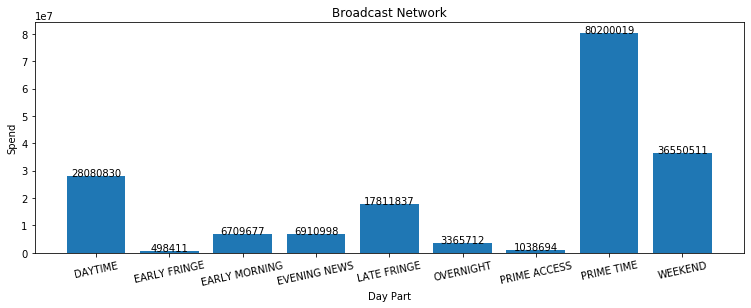

In [332]:
plt.figure(figsize=(150,50))
ax = plt.subplot(10,10,1)
plt.bar(bdp['Spend ($)'].index,bdp['Spend ($)'].values)
plt.xlabel('Day Part')
plt.ylabel('Spend') 
plt.title('Broadcast Network')
plt.xticks(rotation = 12) 
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    height,
                    ha="center")


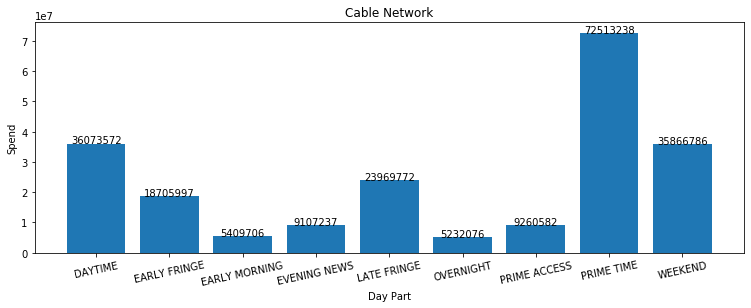

In [333]:
plt.figure(figsize=(150,50))           
ax = plt.subplot(10,10,1)
plt.bar(cbp['Spend ($)'].index,cbp['Spend ($)'].values)
plt.xticks(rotation = 12)
plt.xlabel('Day Part')
plt.ylabel('Spend') 
plt.title('Cable Network')
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    height,
                    ha="center")


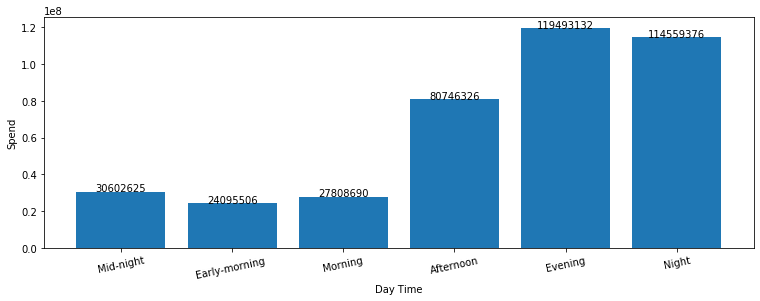

In [334]:
dt=mm.pivot_table(values='Spend ($)', index=['Day_Time'],aggfunc='sum')
plt.figure(figsize=(150,50))           
ax = plt.subplot(10,10,1)
plt.bar(dt['Spend ($)'].index,dt['Spend ($)'].values)
plt.xticks(rotation = 12)
plt.xlabel('Day Time')
plt.ylabel('Spend') 
#plt.title('Cable Network')
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    height,
                    ha="center")

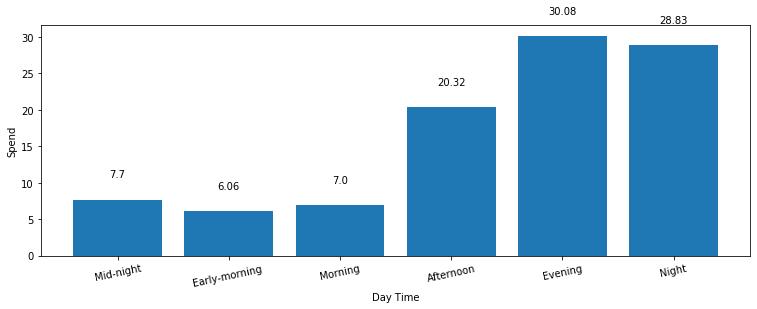

In [335]:
dt=mm.pivot_table(values='Spend ($)', index=['Day_Time'],aggfunc='sum')
plt.figure(figsize=(150,50))           
ax = plt.subplot(10,10,1)
plt.bar(dt['Spend ($)'].index,((100*dt['Spend ($)'].values)/dt['Spend ($)'].sum()).round(2))
plt.xticks(rotation = 12)
plt.xlabel('Day Time')
plt.ylabel('Spend') 
#plt.title('Cable Network')
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    height,
                    ha="center")

##### `Time of the day`
- Eary-Morning  5 am to 9 am
- Morning       9 am to 12 pm
- Afternoon     12 pm to 5 pm
- Evening       5 pm to 9 pm
- Night         9 pm to 12 am
- Mid-Night     12 am to 5 am

- #### During Early-Morning M&M should run more advs, as people tends to watch TV/Shows before going to the work.

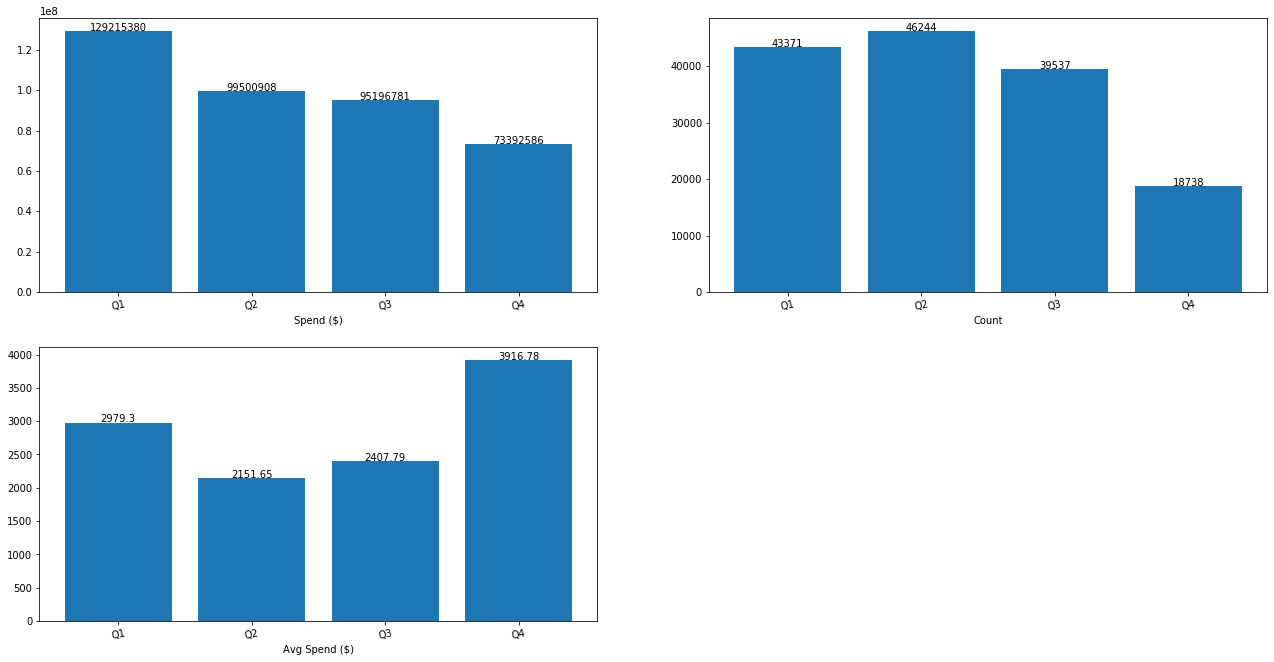

In [336]:
(73392586-95196781)/95196781

-0.2290434064151812

In [337]:
(18738-39537)/39537

-0.5260641930343729

- #### Perviously we see that M&M most advs were ran @Q2 and most spends were @Q1 and there is 52% downfall in ads count and 23% downfall in ads spend from Q3 to Q4 , but we found out that Spend v/s Pod position has maximum correaltion @Q4. So M&M should give more focus on the Q4. Because in India Q4 is a festival season (Durga Puja,Diwali,Bhaiphota...etc), at this time people get more free time to watch TV/Shows, also during festival time people love to spend.

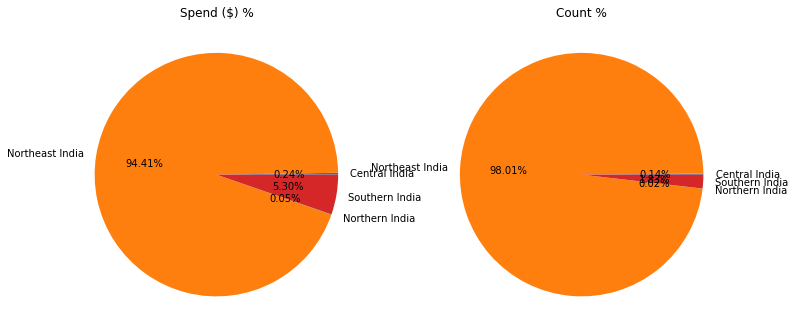

- #### M&M had ran their 98% of the advs and spends 94% of budgets in  the Northern India timezone only, M&M should run their ads in the other timezone also, it would help them to register it's presence in Pan India.